# Pacotes & Funções

In [1]:
import warnings
import ppscore as pps
import itertools
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import os
import pandas as pd
import pickle
import seaborn as sns
import shap
import sklearn
import statsmodels.api as sm
import xgboost as xgb
import yfinance as yf
import statsmodels.api as sm

from scipy.signal import periodogram
from scipy.stats import pearsonr, spearmanr
from scipy.stats import skew, kurtosis, shapiro
from prophet import Prophet
from scipy import stats
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.structural import UnobservedComponents
from statsmodels.stats.stattools import durbin_watson
from statsmodels.tsa.stattools import kpss, adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.formula.api import ols
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tools import add_constant

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
import mplfinance as mpf

from prophet import Prophet
from arch import arch_model
from arch.unitroot import *
from datetime import timedelta
from hurst import compute_Hc
from hyperopt import fmin, hp, space_eval, STATUS_OK, Trials, tpe
from itertools import product
from math import sqrt
from pandas.plotting import lag_plot
from pmdarima import auto_arima
from scipy.signal import periodogram
from scipy.stats import jarque_bera, kurtosis, pearsonr, shapiro, skew, spearmanr
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from skopt import forest_minimize
from statsmodels.graphics.gofplots import qqplot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.regression.linear_model import OLS
from statsmodels.stats.diagnostic import acorr_ljungbox, het_breuschpagan
from statsmodels.stats.stattools import durbin_watson
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.statespace.structural import UnobservedComponents
from xgboost import plot_importance, plot_tree

from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from hyperopt import STATUS_OK
from statsmodels.tsa.stattools import acf,pacf
import statsmodels.formula.api as smf

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.models import Sequential
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.stats.stattools import jarque_bera, durbin_watson

pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")

In [2]:
def missing_values_table(df):
    """
    Cria uma tabela resumindo a quantidade e a porcentagem de valores ausentes em cada coluna do DataFrame.

    Args:
    df (pd.DataFrame): DataFrame para análise de valores ausentes.

    Etapas:
    1. Calcular a quantidade total de valores ausentes por coluna.
    2. Calcular a porcentagem de valores ausentes em relação ao total de linhas.
    3. Concatenar as duas métricas em um novo DataFrame.
    4. Renomear as colunas do DataFrame resultante para maior clareza.
    5. Filtrar e ordenar o DataFrame para mostrar apenas colunas com valores ausentes, em ordem decrescente de porcentagem.
    6. Imprimir um resumo sobre a presença de valores ausentes no DataFrame.

    Returns:
    pd.DataFrame: Uma tabela com o número e a porcentagem de valores ausentes por coluna.
    """
    # Calculando o número total de valores ausentes por coluna.
    mis_val = df.isnull().sum()
    
    # Calculando a porcentagem de valores ausentes.
    mis_val_percent = 100 * mis_val / len(df)
    
    # Criando um DataFrame com o número e a porcentagem de valores ausentes.
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    
    # Renomeando as colunas do DataFrame para clareza.
    mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    
    # Filtrando o DataFrame para mostrar apenas colunas com valores ausentes e ordenando-as.
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)
    
    # Imprimindo um resumo das colunas com valores ausentes.
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")
    
    return mis_val_table_ren_columns

# Calculate RSI
def calculate_rsi(prices, period=14):
    delta = prices.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.ewm(com=period - 1, min_periods=period).mean()
    avg_loss = loss.ewm(com=period - 1, min_periods=period).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Criando a coluna 'halving_btc'
def categorize_date(date):
    for halving_date in halvings:
        pre_halving_start = halving_date - timedelta(days=180)
        pos_halving_end = halving_date + timedelta(days=180)
        if date == halving_date:
            return 'halving'
        elif pre_halving_start <= date < halving_date:
            return 'pre_halving'
        elif halving_date < date <= pos_halving_end:
            return 'pos_halving'
    return 'status_quo'


# Função para calcular as EMAs
def calculate_ema(data, periods=[15, 30, 200]):
    for period in periods:
        data[f'EMA_{period}'] = data['Close'].ewm(span=period, adjust=False).mean()
    return data

# Função para calcular o Commodity Channel Index (CCI)
def calculate_cci(data, period=20):
    TP = (data['High'] + data['Low'] + data['Close']) / 3
    MA = TP.rolling(window=period).mean()
    MD = TP.rolling(window=period).apply(lambda x: np.abs(x - x.mean()).mean())
    data['CCI'] = (TP - MA) / (0.015 * MD)
    return data

# Função para calcular o On-Balance Volume (OBV)
def calculate_obv(data):
    data['OBV'] = (np.where(data['Close'] > data['Close'].shift(1), data['Volume'],
                            np.where(data['Close'] < data['Close'].shift(1), -data['Volume'], 0))).cumsum()
    return data

## Dummies
def get_one_hot_enc(feature_col: pd.Series, enc: preprocessing.OneHotEncoder, column_name: str) -> pd.DataFrame:
    """
    Aplica codificação one-hot a uma coluna específica de um DataFrame.

    Args:
    feature_col (pd.Series): Coluna do DataFrame para ser codificada.
    enc (preprocessing.OneHotEncoder): Instância do OneHotEncoder treinada.
    column_name (str): Nome da coluna a ser codificada.

    Processo:
    1. Cria um DataFrame com a coluna especificada.
    2. Aplica a transformação one-hot usando o encoder fornecido.
    3. Retorna um DataFrame com as colunas codificadas.

    Returns:
    pd.DataFrame: DataFrame com as colunas resultantes da codificação one-hot.
    """
    unseen_df = pd.DataFrame(feature_col, columns=[column_name])
    encoded_vec = enc.transform(unseen_df).toarray()
    columns = enc.get_feature_names_out([column_name])
    encoded_df = pd.DataFrame(encoded_vec, columns=columns)
    return encoded_df

# Função para salvar um modelo em um arquivo pickle
def save_pickle(model, file_name: str):
    """
    Salva um objeto modelo em um arquivo pickle.

    Args:
    model (any): O modelo a ser salvo.
    file_name (str): Nome do arquivo pickle a ser criado.

    Processo:
    1. Abre o arquivo pickle em modo de escrita binária.
    2. Salva o objeto modelo no arquivo pickle.
    """
    with open(file_name, 'wb') as file:
        pickle.dump(model, file)

# Função para carregar um modelo de um arquivo pickle
def load_pickle(file_name: str) -> any:
    """
    Carrega um objeto a partir de um arquivo pickle.

    Args:
    file_name (str): Nome do arquivo pickle a ser carregado.

    Processo:
    1. Abre o arquivo pickle em modo de leitura binária.
    2. Carrega e retorna o objeto contido no arquivo pickle.

    Returns:
    any: Objeto carregado do arquivo pickle.
    """
    with open(file_name, 'rb') as file:
        return pickle.load(file)

def hipertuning(space):
    """
    Realiza o ajuste de hiperparâmetros de um modelo XGBoost usando validação cruzada para regressão.

    Args:
    space (dict): Dicionário contendo os hiperparâmetros para teste no modelo XGBoost.

    Processo:
    1. Configura o modelo XGBoost com os hiperparâmetros do espaço fornecido.
    2. Usa KFold para divisão do conjunto de dados.
    3. Calcula a média do MSE (Mean Squared Error) usando cross_val_score.
    
    Returns:
    dict: Dicionário contendo o 'loss' (negativo da média do MSE para minimização) e o 'status'.
    """
    # Configuração do modelo com os parâmetros do espaço
    model = xgb.XGBRegressor(
        max_depth=int(space['max_depth']),
        gamma=space['gamma'],
        reg_alpha=int(space['reg_alpha']),
        reg_lambda=space['reg_lambda'],
        min_child_weight=int(space['min_child_weight']),
        colsample_bytree=space['colsample_bytree'],
        random_state=int(space['seed'])
    )

    # KFold para divisão do conjunto de dados
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    # Avaliação usando cross_val_score
    mse_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
    mean_mse = -mse_scores.mean()
    print("Média MSE: ", mean_mse)

    # A função de perda é o negativo da média do MSE, pois estamos minimizando
    return {'loss': mean_mse, 'status': STATUS_OK}

space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha': hp.uniform('reg_alpha', 0, 10),
        'reg_lambda': hp.uniform('reg_lambda', 0, 10),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'seed': 0}


# Extração de dados

In [3]:
# Extraindo dataset
BTC_Ticker = yf.Ticker("BTC-USD")
BTC_Data = BTC_Ticker.history(period="max")
# Salvando dataset extraido
BTC_Data.to_csv('bitcoin.csv')

# Informações básicas do dataset

In [4]:
BTC_Data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3503 entries, 2014-09-17 00:00:00+00:00 to 2024-04-19 00:00:00+00:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          3503 non-null   float64
 1   High          3503 non-null   float64
 2   Low           3503 non-null   float64
 3   Close         3503 non-null   float64
 4   Volume        3503 non-null   int64  
 5   Dividends     3503 non-null   float64
 6   Stock Splits  3503 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 218.9 KB


# Tratamento e calculo de metricas

In [5]:
# Extraindo características temporais: mês, dia da semana, semana do ano e quarter do ano
BTC_Data['Month'] = BTC_Data.index.month
BTC_Data['Weekday'] = BTC_Data.index.weekday
BTC_Data['WeekOfYear'] =BTC_Data.index.isocalendar().week
BTC_Data['Quarter'] = BTC_Data.index.quarter
BTC_Data['MonthName'] = BTC_Data.index.month_name()
BTC_Data['WeekdayName'] = BTC_Data.index.day_name()

# Calculando a volatilidade diária
BTC_Data['Volatility'] = BTC_Data['High'] - BTC_Data['Low']

# Calculando a variação percentual diária dos preços
BTC_Data['PriceChangePercent'] = BTC_Data['Close'].pct_change() * 100

# Calculando a volatilidade com diferentes janelas de tempo
BTC_Data['Volatility_30'] = BTC_Data['PriceChangePercent'].rolling(window=30).std()
BTC_Data['Volatility_90'] = BTC_Data['PriceChangePercent'].rolling(window=90).std()

# Exemplo para Pearson em um lag específico (e.g., lag=1)
BTC_Data['Lag_1'] = BTC_Data['Close'].shift(1)
BTC_Data['Lag_7'] = BTC_Data['Close'].shift(7)
BTC_Data['Lag_30'] = BTC_Data['Close'].shift(30)
BTC_Data['Lag_60'] = BTC_Data['Close'].shift(60)
BTC_Data['Lag_90'] = BTC_Data['Close'].shift(90)
BTC_Data['Lag_365'] = BTC_Data['Close'].shift(365)

# Drop colunas não utilizadas
BTC_Data = BTC_Data.drop(columns =['Dividends','Stock Splits'])

# Criação de Lag_1 para Open,High, Low, Volume
BTC_Data['Lag_1_Open'] = BTC_Data['Open'].shift(1)
BTC_Data['Lag_1_High'] = BTC_Data['High'].shift(1)
BTC_Data['Lag_1_Low'] = BTC_Data['Low'].shift(1)
BTC_Data['Lag_1_Volume'] = BTC_Data['Volume'].shift(1)
BTC_Data['Lag_1_Volatility'] = BTC_Data['Volatility'].shift(1)

# Aplicando a primeira diferenciação 
# Abaixo foi realizado o teste para verificar se era uma série estocástica, a serie foi reprovada no teste por isso do calculo da diferenciação
BTC_Data['Close_diff'] = BTC_Data['Close'].diff()

# Calcular as médias móveis de 50 e 200 dias
BTC_Data['MA50'] = BTC_Data['Close'].rolling(window=50).mean()
BTC_Data['MA200'] = BTC_Data['Close'].rolling(window=200).mean()

# Aplicando a transformação logarítmica na série de preço de fechamento
BTC_Data['Close_log_1'] = np.log(BTC_Data['Close'])
BTC_Data['Close_log_2'] = np.log(BTC_Data['Close_log_1'])

#
BTC_Data = BTC_Data.reset_index()

# Convertendo a coluna 'Date' para datetime e removendo informações de fuso horário
BTC_Data['Date'] = pd.to_datetime(BTC_Data['Date']).dt.tz_localize(None)

# Supondo que bitcoin_trat_df é o seu DataFrame e 'Date' já está convertida para datetime
BTC_Data['Year'] = BTC_Data['Date'].dt.year
BTC_Data['DayOfYear'] = BTC_Data['Date'].dt.dayofyear

# Definindo as datas de halving
halvings = {
    '2012-11-28': 'Primeiro Halving',
    '2016-07-09': 'Segundo Halving',
    '2020-05-11': 'Terceiro Halving'
}

# Convertendo strings para datetime
halvings = {pd.to_datetime(date): event for date, event in halvings.items()}

BTC_Data['halving_btc'] = BTC_Data['Date'].apply(categorize_date)

# Aplicando a função para calcular o RSI no preço de fechamento
# RSI do inglês Relative Strength Index
BTC_Data['RSI'] = calculate_rsi(BTC_Data['Close'])

BTC_Data = calculate_ema(BTC_Data, periods=[15, 30, 200])
BTC_Data = calculate_cci(BTC_Data, period=20)
BTC_Data = calculate_obv(BTC_Data)

## Salvando os dados tratados

In [6]:
BTC_Data.to_csv('bitcoin_trat.csv', index=False)

# Análise exploratória

## Carregando dataset tratado

- Date: Data da observação. <br>
- Open, High, Low, Close: Preço de abertura, máxima, mínima e de fechamento do Bitcoin na data especificada. <br>
- Volume: Volume de negociações na data. <br>
- Dividends, Stock Splits: Colunas com valores constantes, não parecem relevantes. <br>
- Month, Weekday, WeekOfYear, Quarter, MonthName, WeekdayName: Informações de data detalhadas. <br>
- Volatility: Volatilidade do preço na data. <br>
- PriceChangePercent, Volatility_30, Volatility_90: Percentual de mudança de preço e volatilidade calculada em diferentes períodos. <br>
- Close_log: Logaritmo do preço de fechamento. <br>
- Lag_1, Lag_7, Lag_30, Lag_60, Lag_90, Lag_365: Preço de fechamento defasado em 1, 7, 30, 60, 90 e 365 dias. <br>
- Close_diff: Diferença do preço de fechamento em relação ao dia anterior. <br>
- MA50, MA200: Médias móveis de 50 e 200 dias. <br>
- Lag_1_Open, Lag_1_High, Lag_1_Low, Lag_1_Volume: Representam os valores de abertura, máxima, mínima e volume do dia anterior. <br>
- Close_diff: Refere-se à diferença entre o preço de fechamento do dia atual e o do dia anterior. Este é um indicador direto de como o preço mudou de um dia para o outro.<br>
- MA50, MA200: Médias móveis calculadas sobre 50 e 200 dias, respectivamente. Estas são importantes para analisar tendências de médio e longo prazo no preço do Bitcoin, ajudando a suavizar flutuações de curto prazo para uma melhor percepção da direção do mercado.<br>
- Close_log_1, Close_log_2: São variantes do logaritmo do preço de fechamento. O logaritmo do preço é frequentemente utilizado para normalizar a distribuição de dados com grande amplitude e para simplificar a modelagem de crescimentos exponenciais.<br>
- Year, DayOfYear: Indicam o ano e o número do dia no ano da observação, respectivamente.<br>
- halving_btc: Indica se a data observada ocorre em um ano de halving do Bitcoin, que é um evento que reduz pela metade a recompensa por bloco minerado, ocorrendo aproximadamente a cada quatro anos. Isso é significativo, pois os halvings tendem a ter um impacto significativo sobre o preço e a economia do Bitcoin devido à redução da oferta.<br>

In [7]:
# Carregando dataset tratado
bitcoin_trat_df = pd.read_csv('bitcoin_trat.csv')

# Tratamento da coluna data
bitcoin_trat_df['Date'] = pd.to_datetime(bitcoin_trat_df['Date'])

# Setando data como index
bitcoin_trat_df.set_index('Date', inplace=True)

# Configurando o estilo do gráfico
dic = {
    'font.sans-serif': ['Arial'],  # Fonte
    'font.family': ['Arial']}
sns.set_style(rc=dic)
plt.style.use('ggplot')
# Plotando a tendência dos preços de Abertura e Fechamento ao longo do tempo
#plt.figure(figsize=(14, 7))

## Describe dos dados

In [8]:
bitcoin_trat_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3503 entries, 2014-09-17 to 2024-04-19
Data columns (total 40 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Open                3503 non-null   float64
 1   High                3503 non-null   float64
 2   Low                 3503 non-null   float64
 3   Close               3503 non-null   float64
 4   Volume              3503 non-null   int64  
 5   Month               3503 non-null   int64  
 6   Weekday             3503 non-null   int64  
 7   WeekOfYear          3503 non-null   int64  
 8   Quarter             3503 non-null   int64  
 9   MonthName           3503 non-null   object 
 10  WeekdayName         3503 non-null   object 
 11  Volatility          3503 non-null   float64
 12  PriceChangePercent  3502 non-null   float64
 13  Volatility_30       3473 non-null   float64
 14  Volatility_90       3413 non-null   float64
 15  Lag_1               3502 non-null   f

In [9]:
bitcoin_trat_df.describe()

Open          High           Low         Close        Volume  \
count   3503.000000   3503.000000   3503.000000   3503.000000  3.503000e+03   
mean   15862.640057  16234.357660  15465.095446  15879.603004  1.712377e+10   
std    17585.866372  18010.016780  17116.274052  17600.481409  1.929237e+10   
min      176.897003    211.731003    171.509995    178.102997  5.914570e+06   
25%     1006.930023   1037.169983    983.025513   1009.639984  2.086470e+08   
50%     8667.577148   8836.841797   8395.107422   8668.120117  1.275271e+10   
75%    26751.385742  27129.300781  26347.219727  26759.723633  2.766343e+10   
max    73079.375000  73750.070312  71334.093750  73083.500000  3.509679e+11   

             Month      Weekday   WeekOfYear      Quarter    Volatility  \
count  3503.000000  3503.000000  3503.000000  3503.000000   3503.000000   
mean      6.519555     3.000000    26.584356     2.507850    769.262214   
std       3.509326     1.999572    15.337483     1.136279   1184.748100   
min       1.000000     0.000000     1.000000     1.000000      1.028000   
25%       3.000000     1.000000    13.000000     1.000000     38.463943   
50%       7.000000     3.000000    27.000000     3.000000    297.970215   
75%      10.000000     5.000000    40.000000     4.000000    965.219727   
max      12.000000     6.000000    53.000000     4.000000  12864.621094   

       PriceChangePercent  Volatility_30  Volatility_90         Lag_1  \
count         3502.000000    3473.000000    3413.000000   3502.000000   
mean             0.209717       3.347596       3.482200  15865.784144   
std              3.682937       1.508132       1.177739  17583.978537   
min            -37.169539       0.709489       1.219138    178.102997   
25%             -1.246161       2.294168       2.698166   1008.559982   
50%              0.142533       3.129540       3.307876   8664.410156   
75%              1.720983       4.165034       4.079258  26756.169434   
max             25.247169       9.133050       7.473960  73083.500000   

              Lag_7        Lag_30        Lag_60        Lag_90       Lag_365  \
count   3496.000000   3473.000000   3443.000000   3413.000000   3138.000000   
mean   15783.863946  15434.625190  15019.601121  14753.934163  13252.725939   
std    17487.314231  17007.511330  16474.122605  16294.844970  16045.478749   
min      178.102997    178.102997    178.102997    178.102997    178.102997   
25%     1004.524994    989.023010    965.233978    921.590027    730.101273   
50%     8658.098145   8574.501953   8393.041992   8277.009766   7403.709717   
75%    26622.657715  26327.462891  25899.088867  24375.960938  19156.641602   
max    73083.500000  73083.500000  67566.828125  67566.828125  67566.828125   

         Lag_1_Open    Lag_1_High     Lag_1_Low  Lag_1_Volume  \
count   3502.000000   3502.000000   3502.000000  3.502000e+03   
mean   15849.034366  16220.308380  15452.464546  1.711474e+10   
std    17569.928547  17993.380028  17102.382622  1.928772e+10   
min      176.897003    211.731003    171.509995  5.914570e+06   
25%     1006.570023   1035.519989    982.927765  2.083145e+08   
50%     8664.668945   8836.516113   8394.783691  1.275175e+10   
75%    26746.813965  27119.638672  26342.790527  2.762574e+10   
max    73079.375000  73750.070312  71334.093750  3.509679e+11   

       Lag_1_Volatility   Close_diff          MA50         MA200  Close_log_1  \
count       3502.000000  3502.000000   3454.000000   3304.000000  3503.000000   
mean         767.843834    18.222706  15624.845456  15188.300521     8.648864   
std         1181.938926   839.419641  16944.586052  15580.129689     1.777442   
min            1.028000 -7554.039062    232.261620    245.701329     5.182362   
25%           38.431923   -89.880920   1100.904217   1486.307934     6.917347   
50%          297.920105     1.610001   8575.613599   8710.631057     9.067407   
75%          964.838379   120.872681  26929.367236  26940.344634    10.194653   
max        12864.621094

## Gráficos

Os dados missing já eram esperaados. Os tratamentos realizados faz com que as colunas criadas tenham perda de dados, por exmeplo, Lag de 365 dias (essa coluna possui 365 linhas com dados missing), média móvel de 50 dias ou 200 dias que possuem 49 e 199 registros de dados missing respectivamente. 

### Dados Missing

In [10]:
# Chamando a função 'missing_values_table' para obter um resumo dos valores ausentes no DataFrame.
# Esta função fornece o número e a porcentagem de valores ausentes por coluna.
missing_values_table(bitcoin_trat_df)

Your selected dataframe has 40 columns.
There are 19 columns that have missing values.


Missing Values  % of Total Values
Lag_365                        365               10.4
MA200                          199                5.7
Volatility_90                   90                2.6
Lag_90                          90                2.6
Lag_60                          60                1.7
MA50                            49                1.4
Lag_30                          30                0.9
Volatility_30                   30                0.9
CCI                             19                0.5
RSI                             13                0.4
Lag_7                            7                0.2
Lag_1_Volatility                 1                0.0
Close_diff                       1                0.0
PriceChangePercent               1                0.0
Lag_1_Volume                     1                0.0
Lag_1_Low                        1                0.0
Lag_1_High                       1                0.0
Lag_1                            1                0.0
Lag_1_Open                       1                0.0

<Axes: >

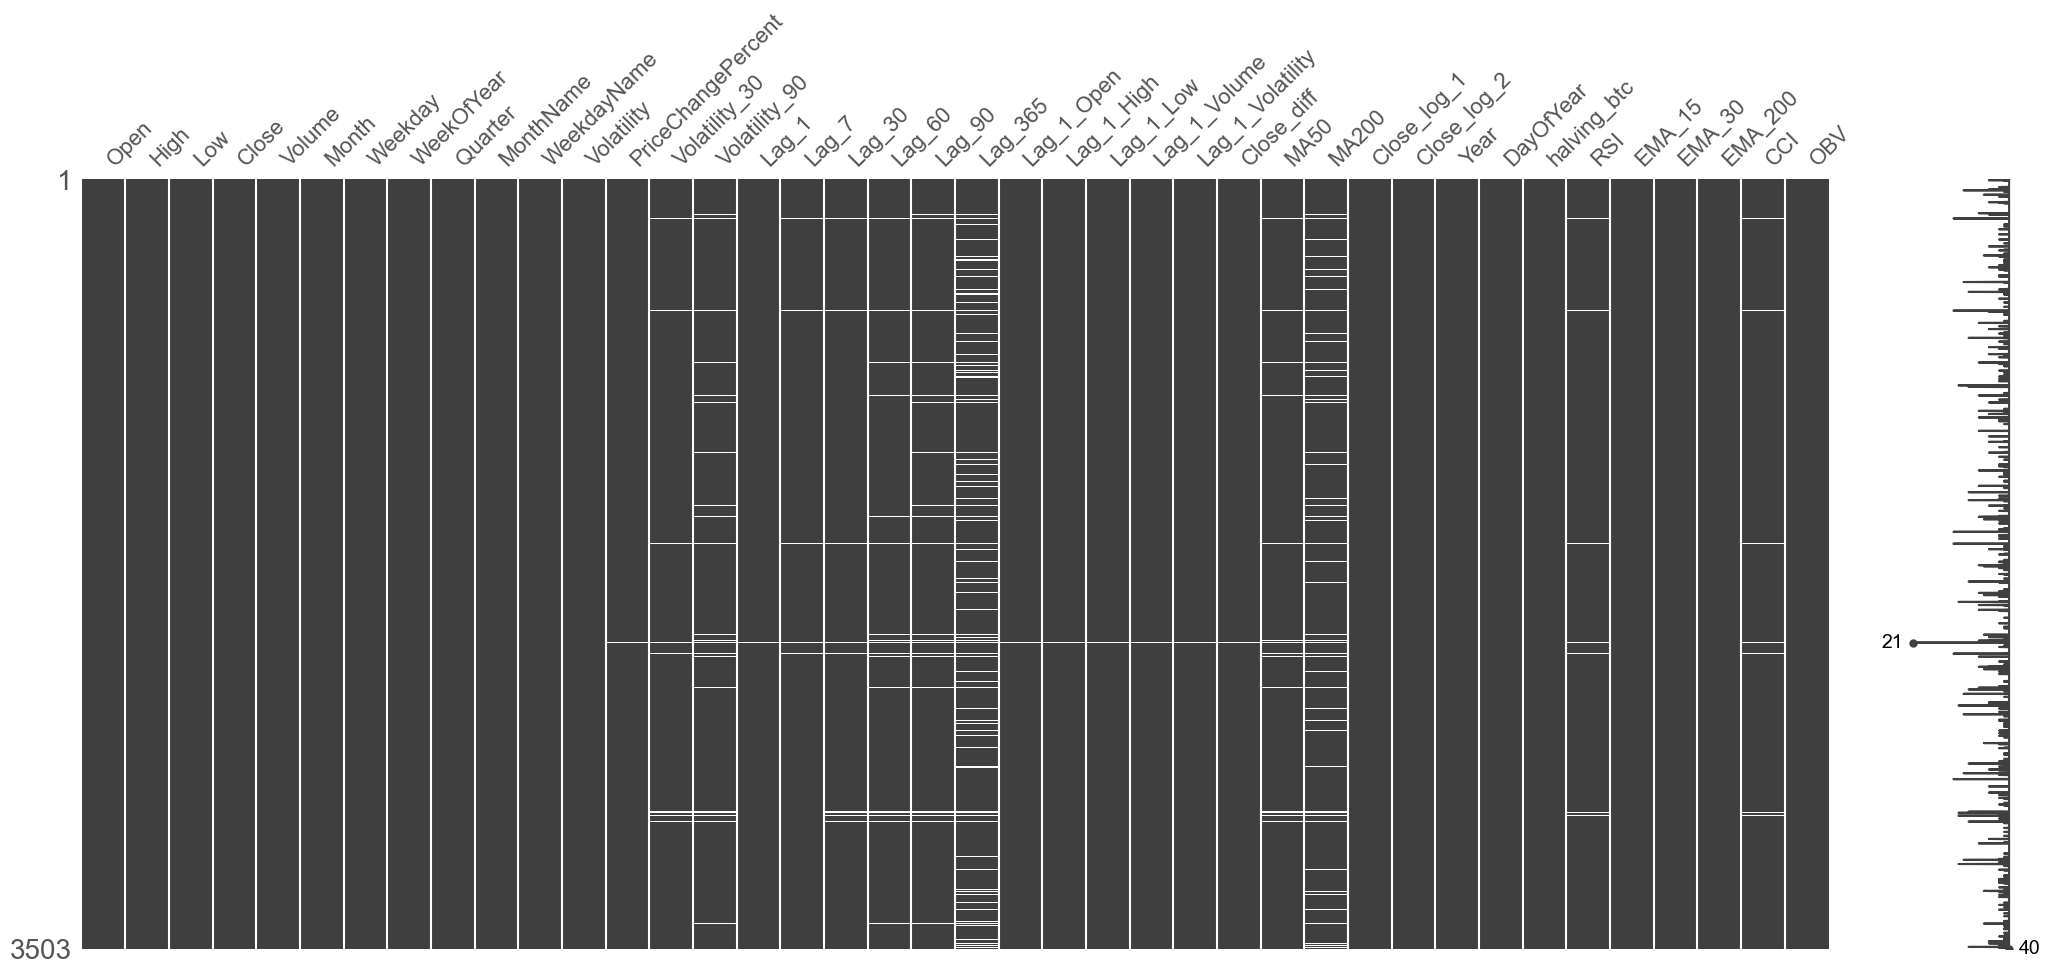

In [11]:
# Visualizando os valores ausentes no DataFrame com a biblioteca 'missingno'.
# O gráfico de matriz mostra a presença ou ausência de dados (valores não nulos) em cada coluna.
msno.matrix(bitcoin_trat_df.sample([bitcoin_trat_df.shape][0][0]))

### Comportamento Temporal

#### Fechamento do preço do BTC normal/transformado em log/diferenciação

Os gráficos abaixo permitem visualizar o comportamento da nossa variável preditiva ao longo do tempo. Temos visualizações no formato em que os dados foram extraídos, após transformação de log para suavizar as curvas acentuadas e por fim o fechamento após o tratamento de diferenciação.

Esses gráficos nos permitem compreender principalmente a evolução do bitcoin como ativo ao longo dos anos. 

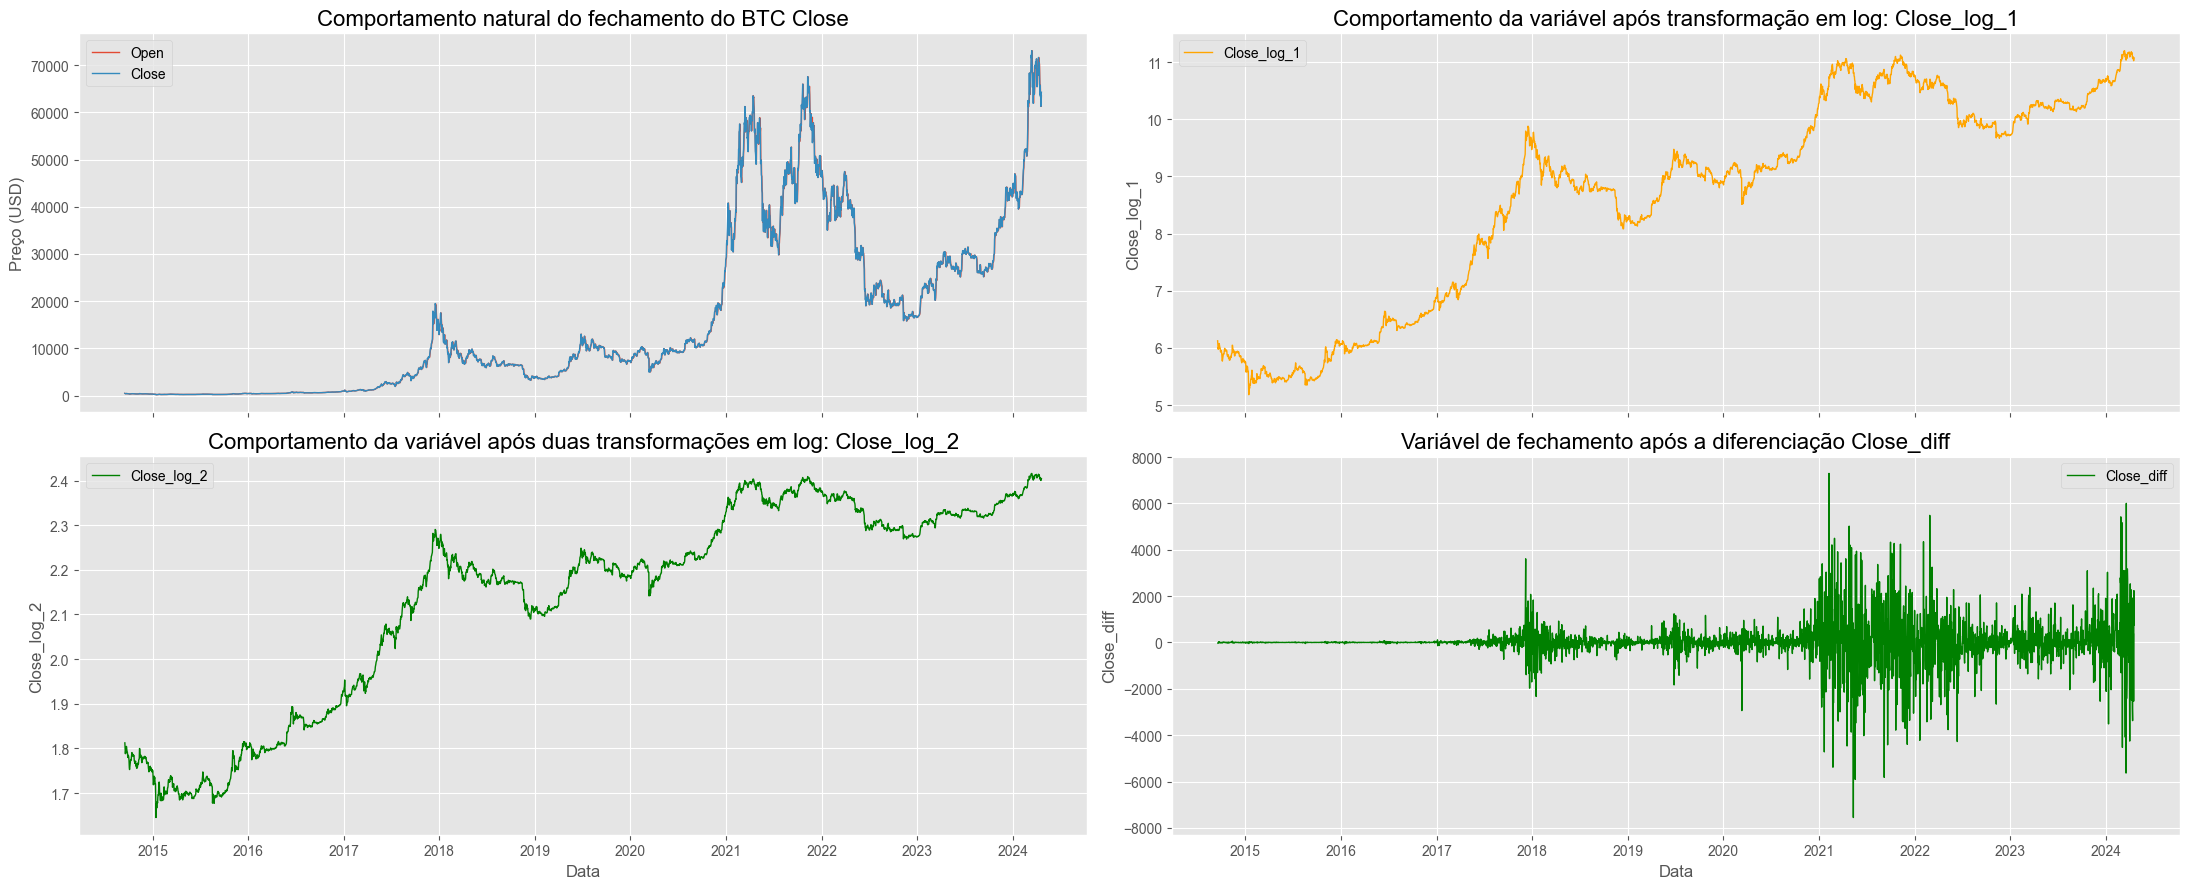

In [12]:
# Configurando um ambiente de plotagem com subgráficos.
fig, axes = plt.subplots(2, 2, figsize=(22, 9), sharex=True)

# Plotando a tendência dos preços de Abertura e Fechamento ao longo do tempo no primeiro subgráfico
sns.lineplot(data=bitcoin_trat_df, x=bitcoin_trat_df.index, y='Open', label='Open', linewidth=1, ax=axes[0, 0])
sns.lineplot(data=bitcoin_trat_df, x=bitcoin_trat_df.index, y='Close', label='Close', linewidth=1, ax=axes[0, 0])
axes[0, 0].set_title('Comportamento natural do fechamento do BTC Close', fontsize=16)
axes[0, 0].set_xlabel('Data')
axes[0, 0].set_ylabel('Preço (USD)')

# Plotando a volatilidade ao longo do tempo no segundo subgráfico
# Aqui, você precisa calcular a 'Volatility' se ainda não estiver no seu DataFrame.
sns.lineplot(data=bitcoin_trat_df, x=bitcoin_trat_df.index, y='Close_log_1', label='Close_log_1', linewidth=1, color='orange',ax=axes[0, 1])
axes[0, 1].set_title('Comportamento da variável após transformação em log: Close_log_1', fontsize=16)
axes[0, 1].set_xlabel('Data')

# Plotando o volume de negociação ao longo do tempo no terceiro subgráfico
sns.lineplot(data=bitcoin_trat_df, x=bitcoin_trat_df.index, y='Close_log_2', label='Close_log_2', color='green', linewidth=1, ax=axes[1, 0])
axes[1, 0].set_title('Comportamento da variável após duas transformações em log: Close_log_2', fontsize=16)
axes[1, 0].set_xlabel('Data')


# Plotando o volume de negociação ao longo do tempo no terceiro subgráfico
sns.lineplot(data=bitcoin_trat_df, x=bitcoin_trat_df.index, y='Close_diff', label='Close_diff', color='green', linewidth=1, ax=axes[1, 1])
axes[1, 1].set_title('Variável de fechamento após a diferenciação Close_diff', fontsize=16)
axes[1, 1].set_xlabel('Data')


plt.tight_layout()
plt.show()

#### Comportamento anual do preço

Abaixo podemos visualizar o comportamento anual do fechamento do bitcoin. Podemos visualizar o comportamento sazonal tendo em via o dia do ano. 

Temos alguns anos onde vemos o ativo cresce o seu valor nós últimos meses do ano e alguns casos onde a volatilidade foi alta dentro proprio ano igual em 2021. Outra evidência que temos com os gráficos é a ocorrência de ciclos de altas. Por fim, outra informação que já podemos ter em mente é o fato do bitcoin ser um ativo volátil

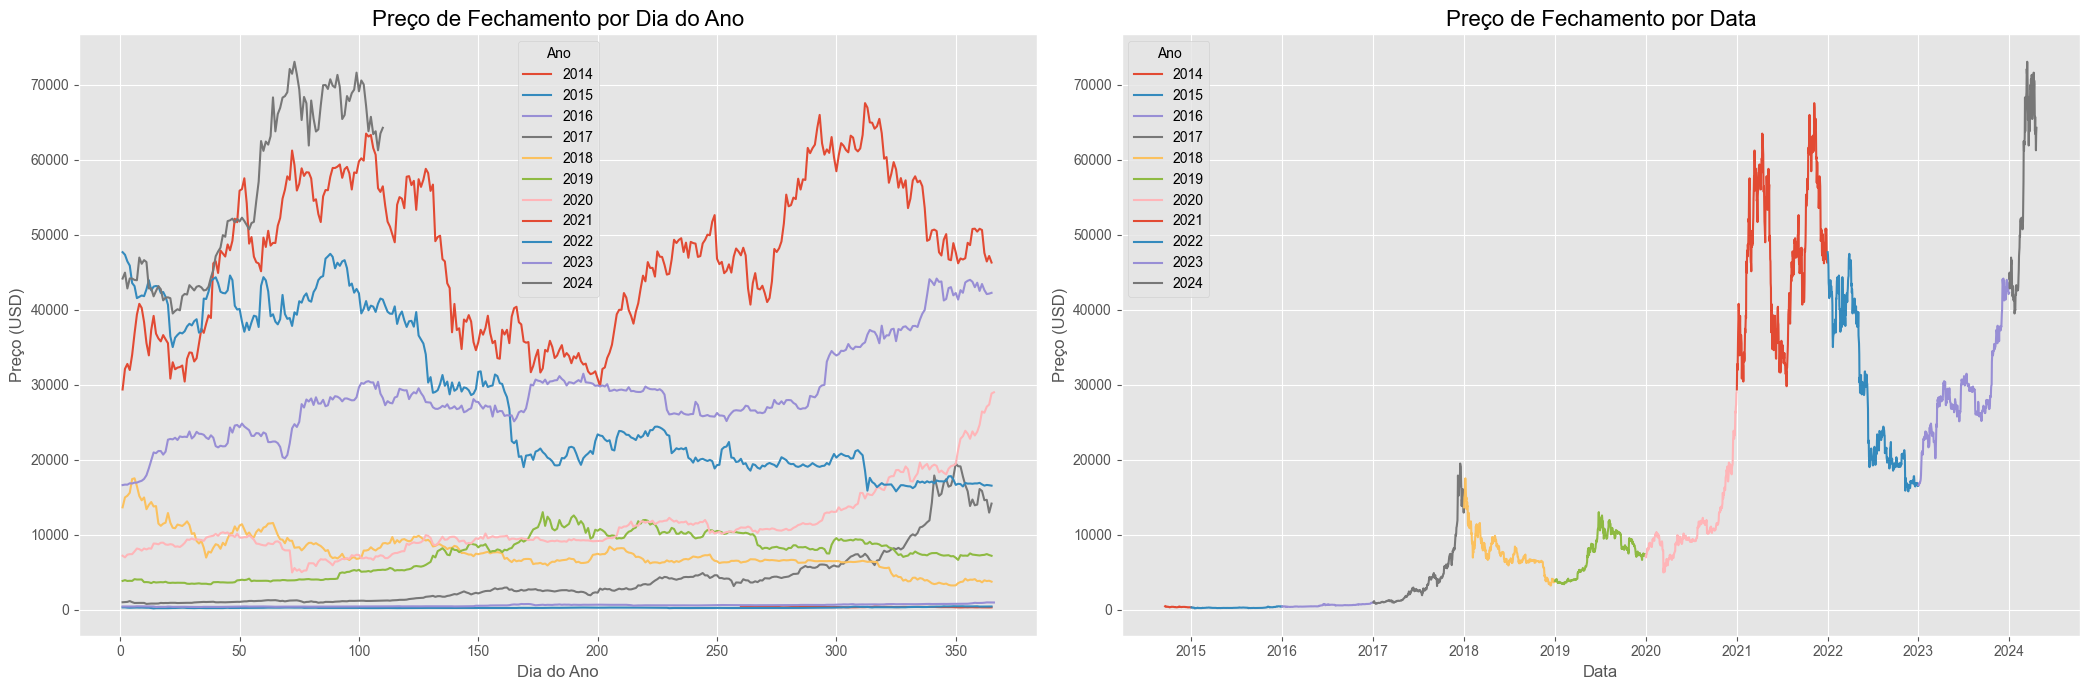

In [13]:
# Configurando um ambiente de plotagem com subgráficos lado a lado.
fig, axes = plt.subplots(1, 2, figsize=(21, 7))  # Dois gráficos lado a lado

bitcoin_trat_df = bitcoin_trat_df.reset_index()

# Obtenha a lista de anos únicos
years = bitcoin_trat_df['Year'].unique()

# Loop através de cada ano e plote os dados para o preço de fechamento por dia do ano
for year in years:
    # Filtre os dados para o ano específico
    data_for_year = bitcoin_trat_df[bitcoin_trat_df['Year'] == year]
    axes[0].plot(data_for_year['DayOfYear'], data_for_year['Close'], label=str(year))

axes[0].set_title('Preço de Fechamento por Dia do Ano', fontsize=16)
axes[0].set_xlabel('Dia do Ano')
axes[0].set_ylabel('Preço (USD)')
axes[0].legend(title='Ano')

# Loop através de cada ano e plote os dados para o preço de fechamento por data real
for year in years:
    data_for_year = bitcoin_trat_df[bitcoin_trat_df['Year'] == year]
    axes[1].plot(data_for_year['Date'], data_for_year['Close'], label=str(year))

axes[1].set_title('Preço de Fechamento por Data', fontsize=16)
axes[1].set_xlabel('Data')
axes[1].set_ylabel('Preço (USD)')
axes[1].legend(title='Ano')

plt.tight_layout()  # Ajustar o layout
plt.show()


### Gráficos de volume, volatilidade, abertura e fechamento

Olhando os gráficos abaixo podemos confirmar que o biticoin é um ativo muito volatil, basta olhar para a volatilidade diária do preço. É possivel visualizar períodos onde o volume diário é alto e coincide com os ciclos de alta, uma consequência comum ao preço é que o volume acaba se tornando uma variável volátil. Altos volumes acompanhados por grandes mudanças percentuais de preço podem sinalizar pontos de entrada ou saída para traders. Eles também podem indicar eventos de mercado importantes

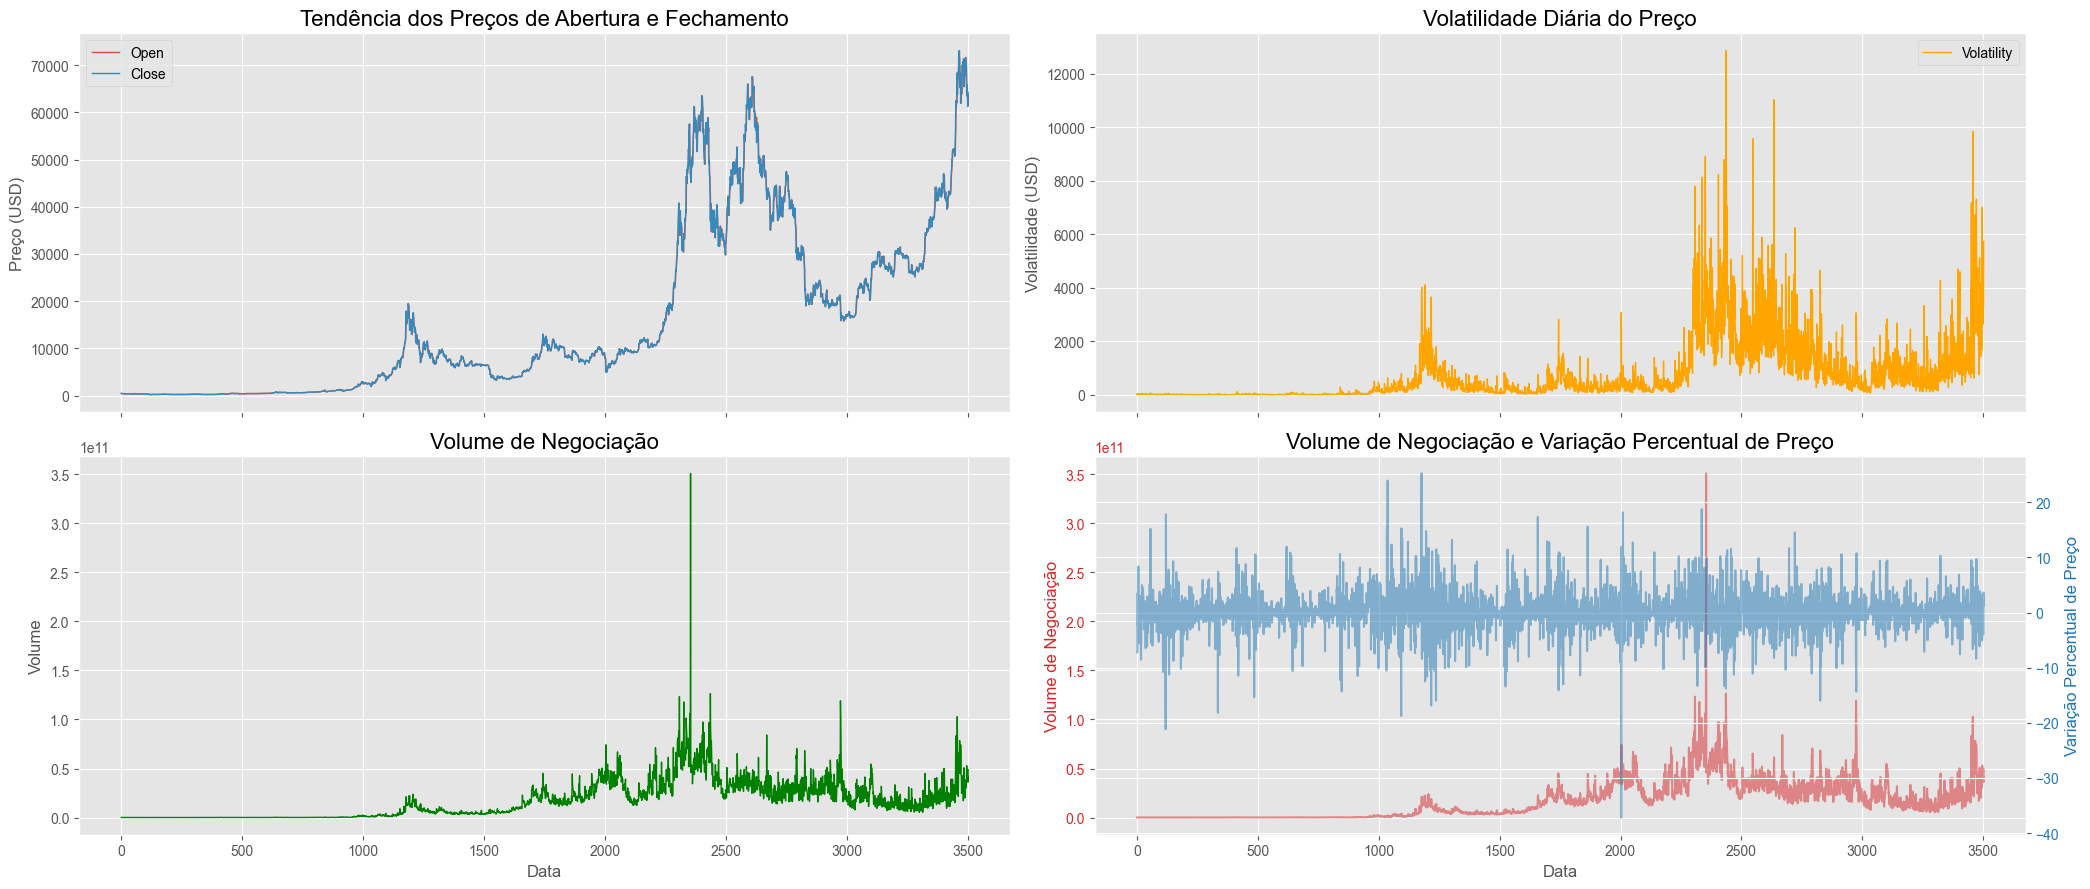

In [14]:
# Configurando um ambiente de plotagem com subgráficos.
fig, axes = plt.subplots(2, 2, figsize=(21, 9), sharex=True)

# Plotando a tendência dos preços de Abertura e Fechamento ao longo do tempo no primeiro subgráfico
sns.lineplot(data=bitcoin_trat_df, x=bitcoin_trat_df.index, y='Open', label='Open', linewidth=1, ax=axes[0, 0])
sns.lineplot(data=bitcoin_trat_df, x=bitcoin_trat_df.index, y='Close', label='Close', linewidth=1, ax=axes[0, 0])
axes[0, 0].set_title('Tendência dos Preços de Abertura e Fechamento', fontsize=16)
axes[0, 0].set_xlabel('Data')
axes[0, 0].set_ylabel('Preço (USD)')

# Plotando a volatilidade ao longo do tempo no segundo subgráfico
# Aqui, você precisa calcular a 'Volatility' se ainda não estiver no seu DataFrame.
sns.lineplot(data=bitcoin_trat_df, x=bitcoin_trat_df.index, y='Volatility', label='Volatility', color='orange', linewidth=1, ax=axes[0, 1])
axes[0, 1].set_title('Volatilidade Diária do Preço', fontsize=16)
axes[0, 1].set_xlabel('Data')
axes[0, 1].set_ylabel('Volatilidade (USD)')

# Plotando o volume de negociação ao longo do tempo no terceiro subgráfico
sns.lineplot(data=bitcoin_trat_df, x=bitcoin_trat_df.index, y='Volume', color='green', linewidth=1, ax=axes[1, 0])
axes[1, 0].set_title('Volume de Negociação', fontsize=16)
axes[1, 0].set_xlabel('Data')
axes[1, 0].set_ylabel('Volume')

# Combinando Volume de Negociação e Variação Percentual de Preço no quarto subgráfico
# Aqui, você precisa calcular 'PriceChangePercent' se ainda não estiver no seu DataFrame.
color = 'tab:red'
axes[1, 1].set_xlabel('Data')
axes[1, 1].set_ylabel('Volume de Negociação', color=color)
axes[1, 1].plot(bitcoin_trat_df.index, bitcoin_trat_df['Volume'], color=color, alpha=0.5)
axes[1, 1].tick_params(axis='y', labelcolor=color)

ax2 = axes[1, 1].twinx()
color = 'tab:blue'
ax2.set_ylabel('Variação Percentual de Preço', color=color)
ax2.plot(bitcoin_trat_df.index, bitcoin_trat_df['PriceChangePercent'], color=color, alpha=0.5)
ax2.tick_params(axis='y', labelcolor=color)
axes[1, 1].set_title('Volume de Negociação e Variação Percentual de Preço', fontsize=16)

plt.tight_layout()
plt.show()

Atendência de um ativo é que a volatilidade diminua ao longo do tempo e que seu preço estabilize dentro de uma faixa. Ativos financeiros consolidados já possuem essas caracteristicas, só tendo grandes alterações em caso de um evento atipico. O heatmap baixo permite visualizar que os últimos dias (podemos entender meses e anos) foram menos voláteis do que 6 anos atrás por exmeplo. 

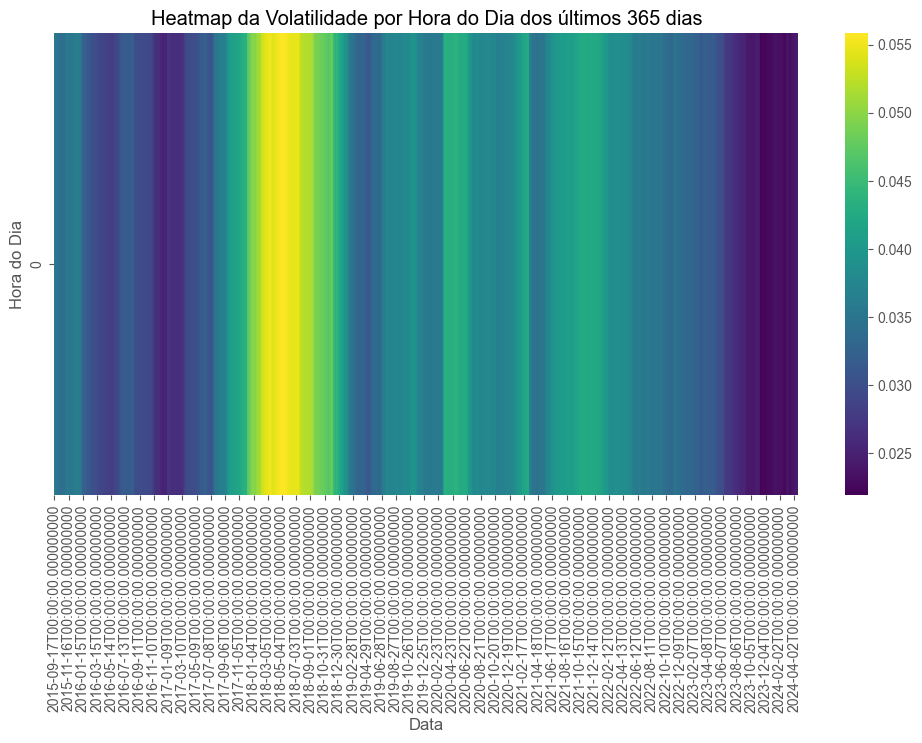

In [15]:
# Supondo que 'Hour' é uma coluna com as horas, se não, adaptar conforme os dados
bitcoin_trat_df['Hour'] = bitcoin_trat_df['Date'].dt.hour
bitcoin_trat_df['Volatility'] = bitcoin_trat_df['Close'].pct_change().rolling(window=365).std()

# Pivot table para o heatmap
volatility_pivot = bitcoin_trat_df.pivot_table(values='Volatility', index='Hour', columns='Date', aggfunc='mean')

plt.figure(figsize=(12, 6))
sns.heatmap(volatility_pivot, cmap='viridis')
plt.title('Heatmap da Volatilidade por Hora do Dia dos últimos 365 dias')
plt.xlabel('Data')
plt.ylabel('Hora do Dia')
plt.show()

### Média movel e outros

A volatilidade varia com o tempo e é evidente que há períodos de maior e menor volatilidade, que podem estar relacionados a eventos externos, por exemplo halving evento que acontece aproximadamente de 4 em 4 anos. O gráfico com médias móveis ajudam a identificar a tendência do mercado e pontos de virada potenciais quando o preço cruza essas médias.

O gráfico distribuição de retornos sugere que a maioria dos retornos diários está próxima de zero, mas com caudas pesadas indicando a ocorrência de variações de preços grandes, embora menos frequentes. E temos uma alta correlação entre o preço de abertura e de fechamento. 

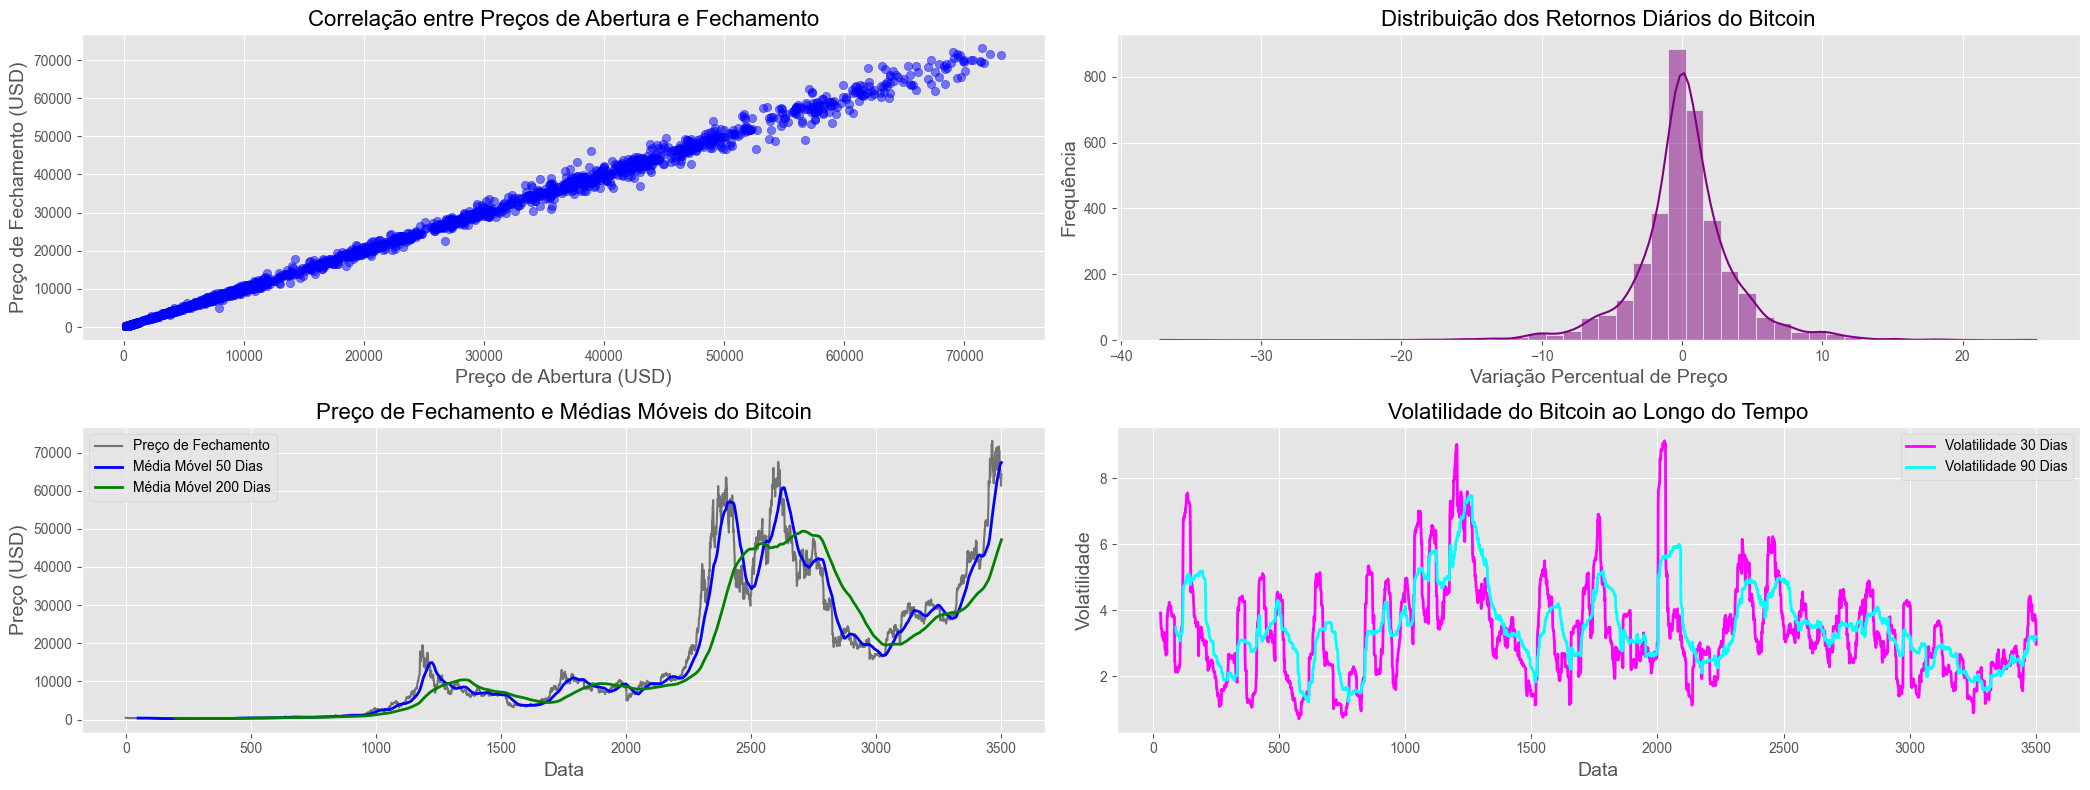

In [16]:
# Configurando um ambiente de plotagem com subgráficos.
fig, axes = plt.subplots(2, 2, figsize=(21, 8))

# Gráfico de dispersão para correlação entre preços de Abertura e Fechamento
sns.scatterplot(data=bitcoin_trat_df, x='Open', y='Close', alpha=0.5, edgecolor=None, color='blue', ax=axes[0, 0])
axes[0, 0].set_title('Correlação entre Preços de Abertura e Fechamento', fontsize=16)
axes[0, 0].set_xlabel('Preço de Abertura (USD)', fontsize=14)
axes[0, 0].set_ylabel('Preço de Fechamento (USD)', fontsize=14)

# Histograma dos retornos diários
sns.histplot(bitcoin_trat_df['PriceChangePercent'], bins=50, kde=True, color='purple', ax=axes[0, 1])
axes[0, 1].set_title('Distribuição dos Retornos Diários do Bitcoin', fontsize=16)
axes[0, 1].set_xlabel('Variação Percentual de Preço', fontsize=14)
axes[0, 1].set_ylabel('Frequência', fontsize=14)

# Preço de Fechamento e Médias Móveis
axes[1, 0].plot(bitcoin_trat_df.index, bitcoin_trat_df['Close'], label='Preço de Fechamento', alpha=0.5, color='black',)
axes[1, 0].plot(bitcoin_trat_df.index, bitcoin_trat_df['MA50'], label='Média Móvel 50 Dias', color='blue', linewidth=2)
axes[1, 0].plot(bitcoin_trat_df.index, bitcoin_trat_df['MA200'], label='Média Móvel 200 Dias', color='green', linewidth=2)
axes[1, 0].set_title('Preço de Fechamento e Médias Móveis do Bitcoin', fontsize=16)
axes[1, 0].set_xlabel('Data', fontsize=14)
axes[1, 0].set_ylabel('Preço (USD)', fontsize=14)
axes[1, 0].legend()

# Volatilidade do Bitcoin ao Longo do Tempo
axes[1, 1].plot(bitcoin_trat_df.index, bitcoin_trat_df['Volatility_30'], label='Volatilidade 30 Dias', color='magenta', linewidth=2)
axes[1, 1].plot(bitcoin_trat_df.index, bitcoin_trat_df['Volatility_90'], label='Volatilidade 90 Dias', color='cyan', linewidth=2)
axes[1, 1].set_title('Volatilidade do Bitcoin ao Longo do Tempo', fontsize=16)
axes[1, 1].set_xlabel('Data', fontsize=14)
axes[1, 1].set_ylabel('Volatilidade', fontsize=14)
axes[1, 1].legend()

plt.tight_layout()
plt.show()

### Tendência dos Preços de Abertura e Fechamento (Mensal, Trimestre, Semanal)

Nos gráficos dessa sessão temos gráficos que nos permitem desconfiar da existência de uma sazonalizadade anual. Temos uma clara variação na média de preços ao longo dos meses, porém vale destacar que os valores são uma média de todos os meses do nosso dataset. Quando olhamos para os dados agrupados por trimestre também vemos um comportamento indicando uma possivel sazonalidade.

Por outro lado não temos a mesma conclusão quando olhamos para o dia da semana não vemos nenhum indício de sazonalidade, sendo um comportamento homogêneo durante os dias do ano. 

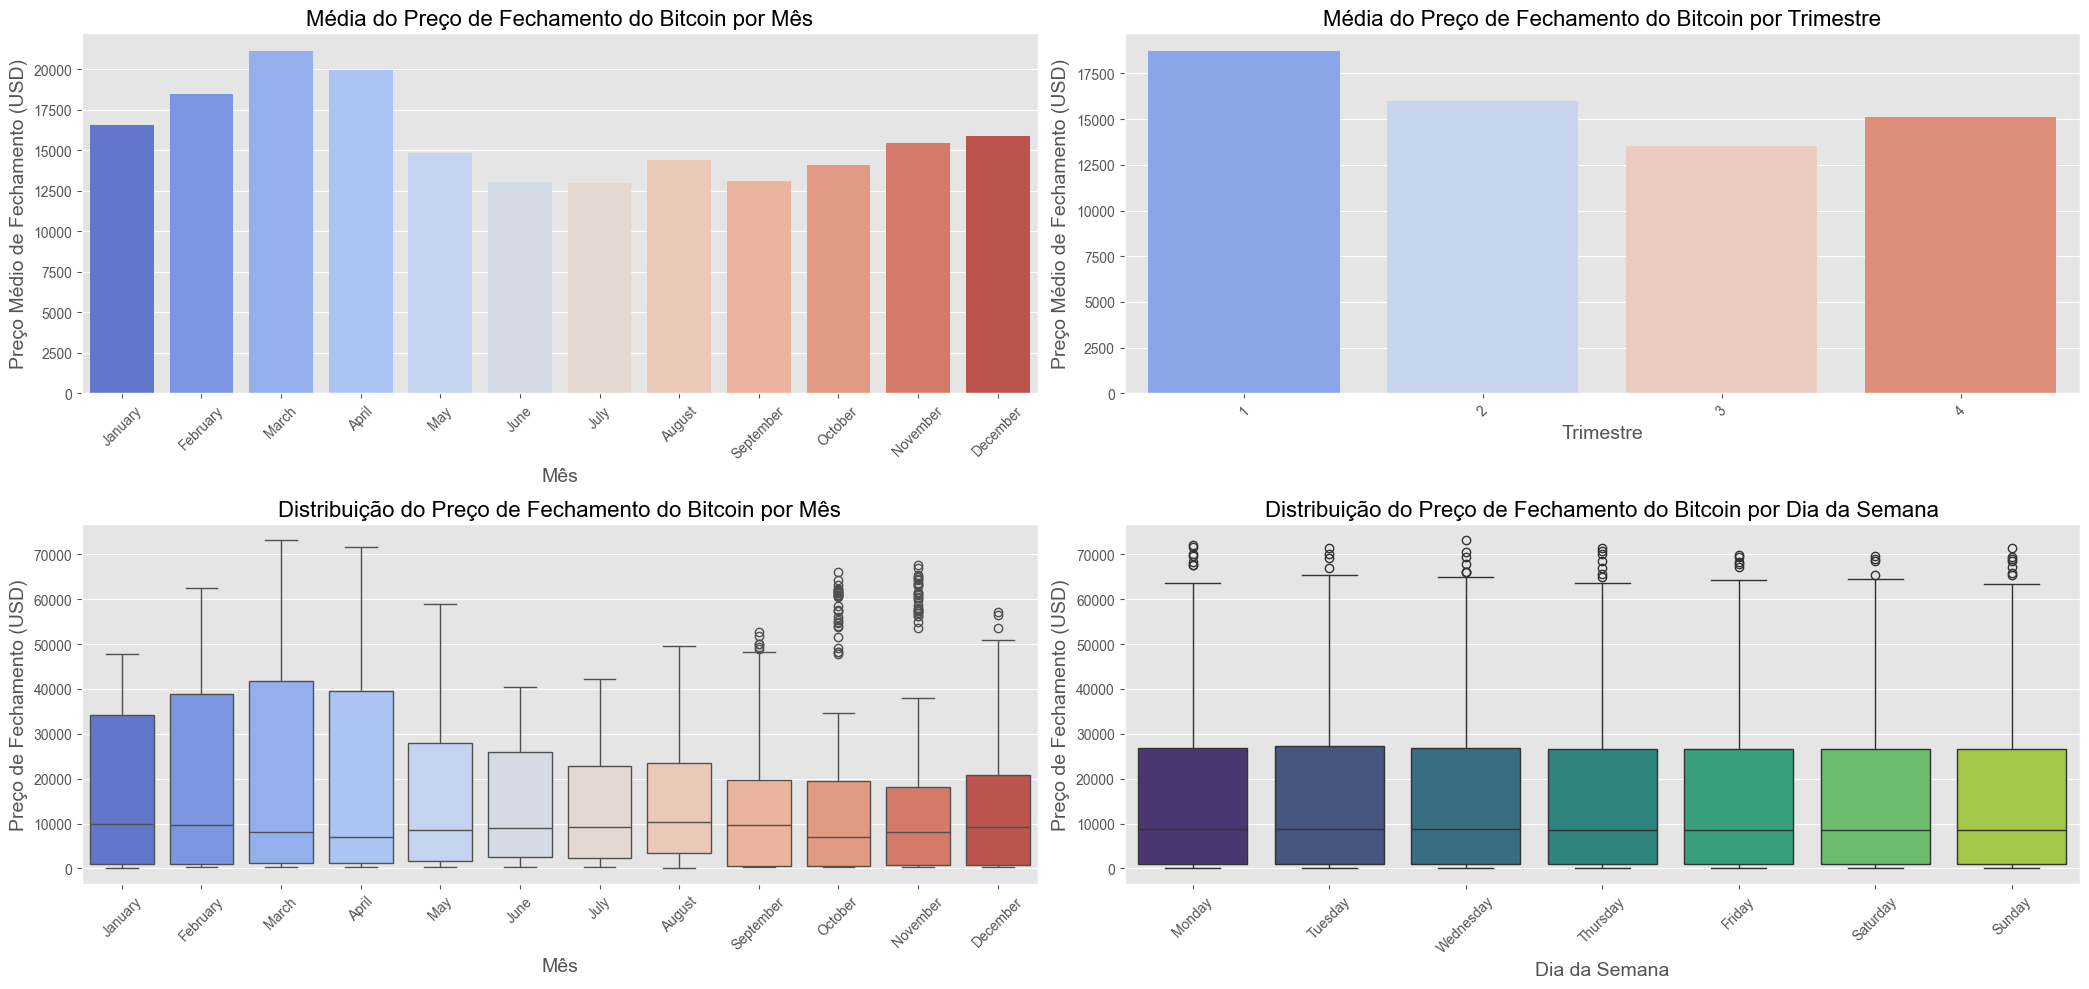

In [17]:
# Configurando um ambiente de plotagem com subgráficos.
fig, axes = plt.subplots(2, 2, figsize=(21, 10))

bitcoin_trat_df = bitcoin_trat_df.set_index('Date')
bitcoin_trat_df['Month'] = bitcoin_trat_df.index.month

# Definindo a ordem correta para os meses e dias da semana
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# Criando um mapeamento para os trimestres de forma que possamos mapeá-los a uma lista ordenada
quarter_mapping = {1: 'Q1', 2: 'Q2', 3: 'Q3', 4: 'Q4'}

# Convertendo para categorias ordenadas
bitcoin_trat_df['MonthName'] = pd.Categorical(bitcoin_trat_df['MonthName'], categories=month_order, ordered=True)
bitcoin_trat_df['WeekdayName'] = pd.Categorical(bitcoin_trat_df['WeekdayName'], categories=weekday_order, ordered=True)

# Calculando a média do preço de fechamento por mês e por trimestre
monthly_avg = bitcoin_trat_df.groupby('Month')['Close'].mean()
quarterly_avg = bitcoin_trat_df['Close'].resample('Q').mean()

# Agrupando os dados por trimestre e obtendo a média
quarterly_avg_grouped = bitcoin_trat_df.groupby('Quarter')['Close'].mean()

# Criando uma Series com o nome do mês como índice para garantir a ordem cronológica correta
# Usando a lista 'month_order' para garantir a ordem correta dos meses
monthly_avg_ordered = pd.Series(index=month_order, dtype=float)
for month in month_order:
    month_number = pd.to_datetime(month, format='%B').month
    monthly_avg_ordered[month] = monthly_avg.get(month_number, float('nan'))

sns.barplot(x=monthly_avg_ordered.index, y=monthly_avg.values, palette='coolwarm', ax=axes[0, 0])
axes[0, 0].set_title('Média do Preço de Fechamento do Bitcoin por Mês', fontsize=16)
axes[0, 0].set_xlabel('Mês', fontsize=14)
axes[0, 0].set_ylabel('Preço Médio de Fechamento (USD)', fontsize=14)
axes[0, 0].tick_params(axis='x', rotation=45)

# Plotando a média do preço de fechamento por trimestre
bitcoin_trat_df['Quarter'] = bitcoin_trat_df.index.quarter.map(quarter_mapping)
sns.barplot(x=quarterly_avg_grouped.index, y=quarterly_avg_grouped.values, palette='coolwarm', ax=axes[0, 1])
axes[0, 1].set_title('Média do Preço de Fechamento do Bitcoin por Trimestre', fontsize=16)
axes[0, 1].set_xlabel('Trimestre', fontsize=14)
axes[0, 1].set_ylabel('Preço Médio de Fechamento (USD)', fontsize=14)
axes[0, 1].tick_params(axis='x', rotation=45)

# Plotando o boxplot do preço de fechamento por mês
sns.boxplot(data=bitcoin_trat_df, x='MonthName', y='Close', palette='coolwarm', ax=axes[1, 0])
axes[1, 0].set_title('Distribuição do Preço de Fechamento do Bitcoin por Mês', fontsize=16)
axes[1, 0].set_xlabel('Mês', fontsize=14)
axes[1, 0].set_ylabel('Preço de Fechamento (USD)', fontsize=14)
axes[1, 0].tick_params(axis='x', rotation=45)

# Plotando o boxplot do preço de fechamento por dia da semana
sns.boxplot(data=bitcoin_trat_df, x='WeekdayName', y='Close', palette='viridis', ax=axes[1, 1])
axes[1, 1].set_title('Distribuição do Preço de Fechamento do Bitcoin por Dia da Semana', fontsize=16)
axes[1, 1].set_xlabel('Dia da Semana', fontsize=14)
axes[1, 1].set_ylabel('Preço de Fechamento (USD)', fontsize=14)
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### Boxplot com a oscilação do preço anual

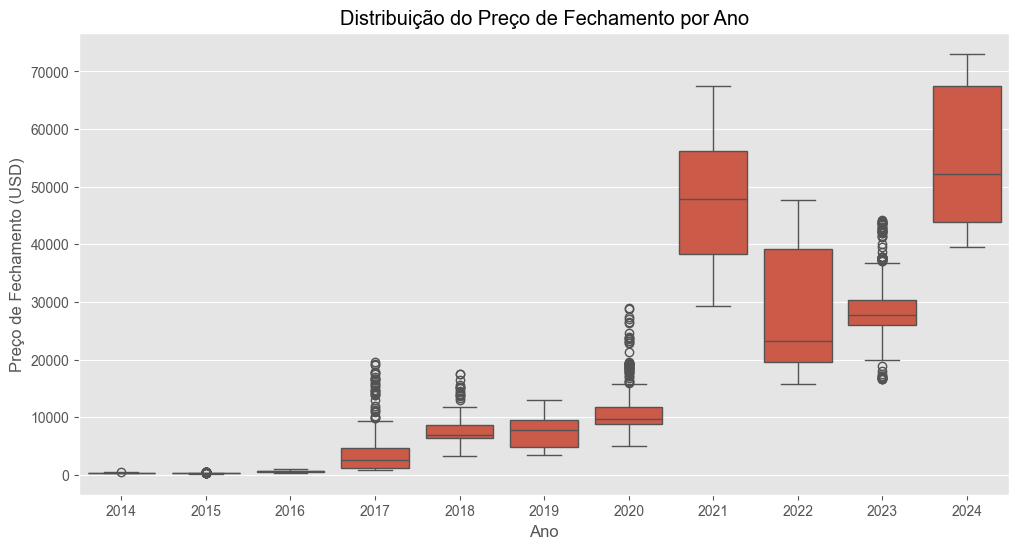

In [18]:
bitcoin_trat_df = bitcoin_trat_df.reset_index()
bitcoin_trat_df['Date'] = pd.to_datetime(bitcoin_trat_df['Date'])
bitcoin_trat_df['Year'] = bitcoin_trat_df['Date'].dt.year
bitcoin_trat_df['Month'] = bitcoin_trat_df['Date'].dt.month

plt.figure(figsize=(12, 6))
sns.boxplot(x='Year', y='Close', data=bitcoin_trat_df)
plt.title('Distribuição do Preço de Fechamento por Ano')
plt.xlabel('Ano')
plt.ylabel('Preço de Fechamento (USD)')
plt.show()

### Japanese Candlestick 

O gráfico de candlestick japonês, ou candlestick, é uma técnica de representação gráfica de dados financeiros usada para descrever movimentos de preços de um ativo. Cada "candle" mostra o preço de abertura, fechamento, máximo e mínimo dentro de um período específico. A cor e o tamanho do corpo do candle fornecem insights sobre a dinâmica do mercado: um corpo grande indica uma forte venda ou compra, enquanto um corpo pequeno sugere menor volatilidade. Candles de cores diferentes representam movimentos de preço ascendentes ou descendentes

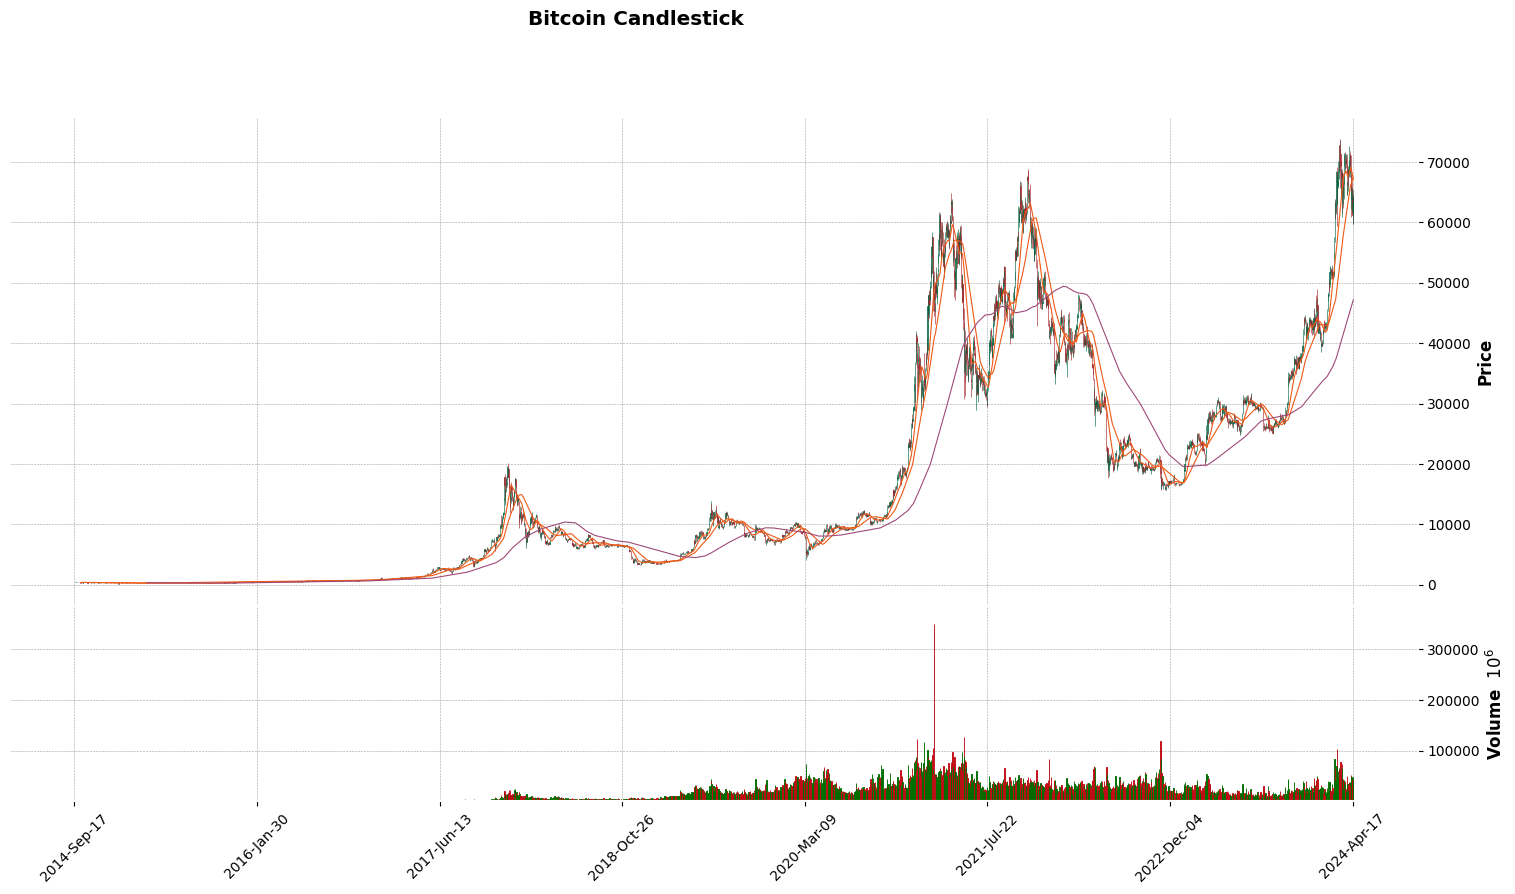

In [19]:
bitcoin_trat_df = bitcoin_trat_df.set_index('Date')
kwargs = dict(type='candle',mav=(20,50,200),volume=True,figratio=(40,20),figscale=1.7)
mpf.plot(bitcoin_trat_df[['Open', 'High', 'Low', 'Close', "Volume"]],**kwargs,style='charles', title='Bitcoin Candlestick')

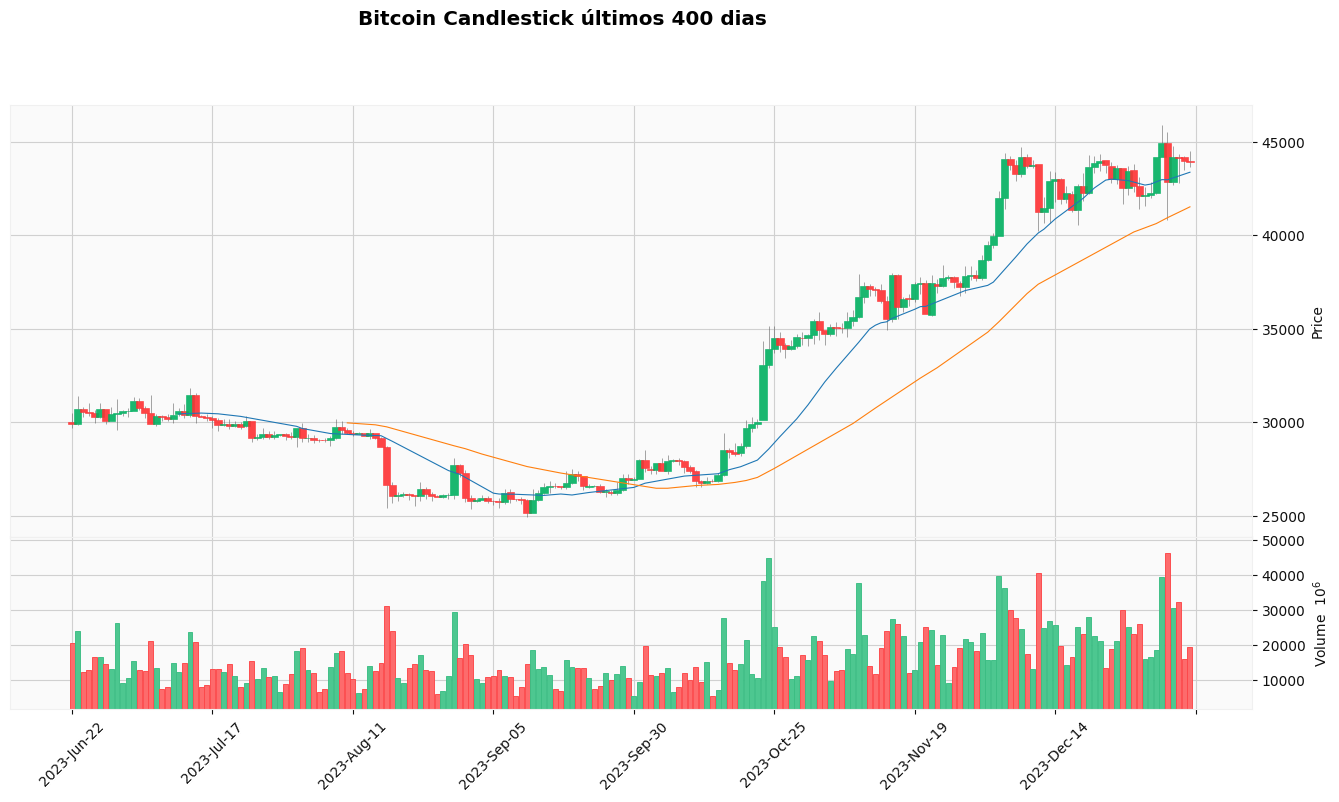

In [20]:
# Crie o gráfico de velas japonesas
kwargs = dict(type='candle',mav=(20,50,200),volume=True,figratio=(40,20),figscale=1.5)
mpf.plot(bitcoin_trat_df[['Open', 'High', 'Low', 'Close', "Volume"]].iloc[3200:3400] ,**kwargs,  style='yahoo',
         title='Bitcoin Candlestick últimos 400 dias', update_width_config=dict(candle_linewidth=0.4,candle_width=1.3))

### Periodograma do preço de fechamento do BTC

Periodograma é uma estimativa da densidade espectral de um sinal, neste caso, do preço de fechamento do Bitcoin. O periodograma é útil para identificar a presença de periodicidades ou frequências dominantes em dados temporais.

Temos um pico acentuado na extremidade mais baixa do espectro de frequências, indicando que a maior parte da energia (ou variação) do sinal está concentrada em movimentos de longo prazo. O decaimento suave e consistente conforme a frequência aumenta sugere que as variações de preço de curto prazo têm menos influência no sinal total em comparação com as tendências de longo prazo.

Por fim, a falta de picos em frequências mais altas sugere que não há periodicidades curtas fortes e regulares no preço de fechamento do Bitcoin. Pois as características  sãopossuem são de séries temporais que não possuem oscilações periódicas significativas ou sazonais e sim tendências de longo prazo.


In [21]:
# Configurando o estilo do gráfico
dic = {
    'font.sans-serif': ['Arial'],  # Fonte
    'font.family': ['Arial']}
sns.set_style(rc=dic)
plt.style.use('ggplot')

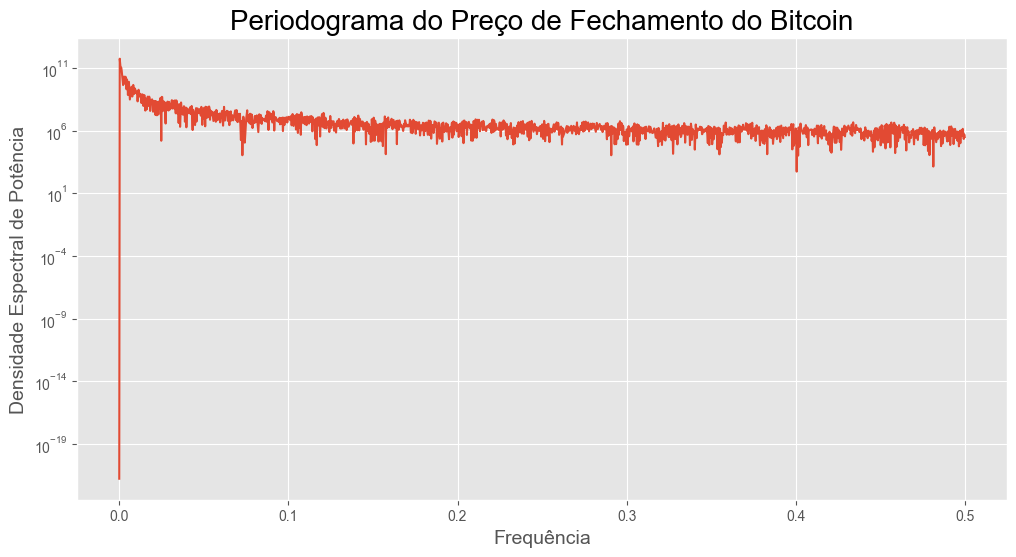

In [22]:
plt.figure(figsize=(12, 6))
freqs, power = periodogram(bitcoin_trat_df['Close'])
plt.semilogy(freqs, power)
plt.title('Periodograma do Preço de Fechamento do Bitcoin', fontsize=20)
plt.xlabel('Frequência', fontsize=14)
plt.ylabel('Densidade Espectral de Potência', fontsize=14)
plt.show()

# Modelagem

## Correlação de Pearson

No gráfico de correlação de pearson podemos visualizar as variáveis que possuem uma alta correlação com a variável de fechamento de preço do bitcoin. Podemos concluir que variáveis como Open, High, Low, Close, Lag_1 e outras possuem alta correlação, isso serve como um alerta para um contexto de  multicolinearidade 

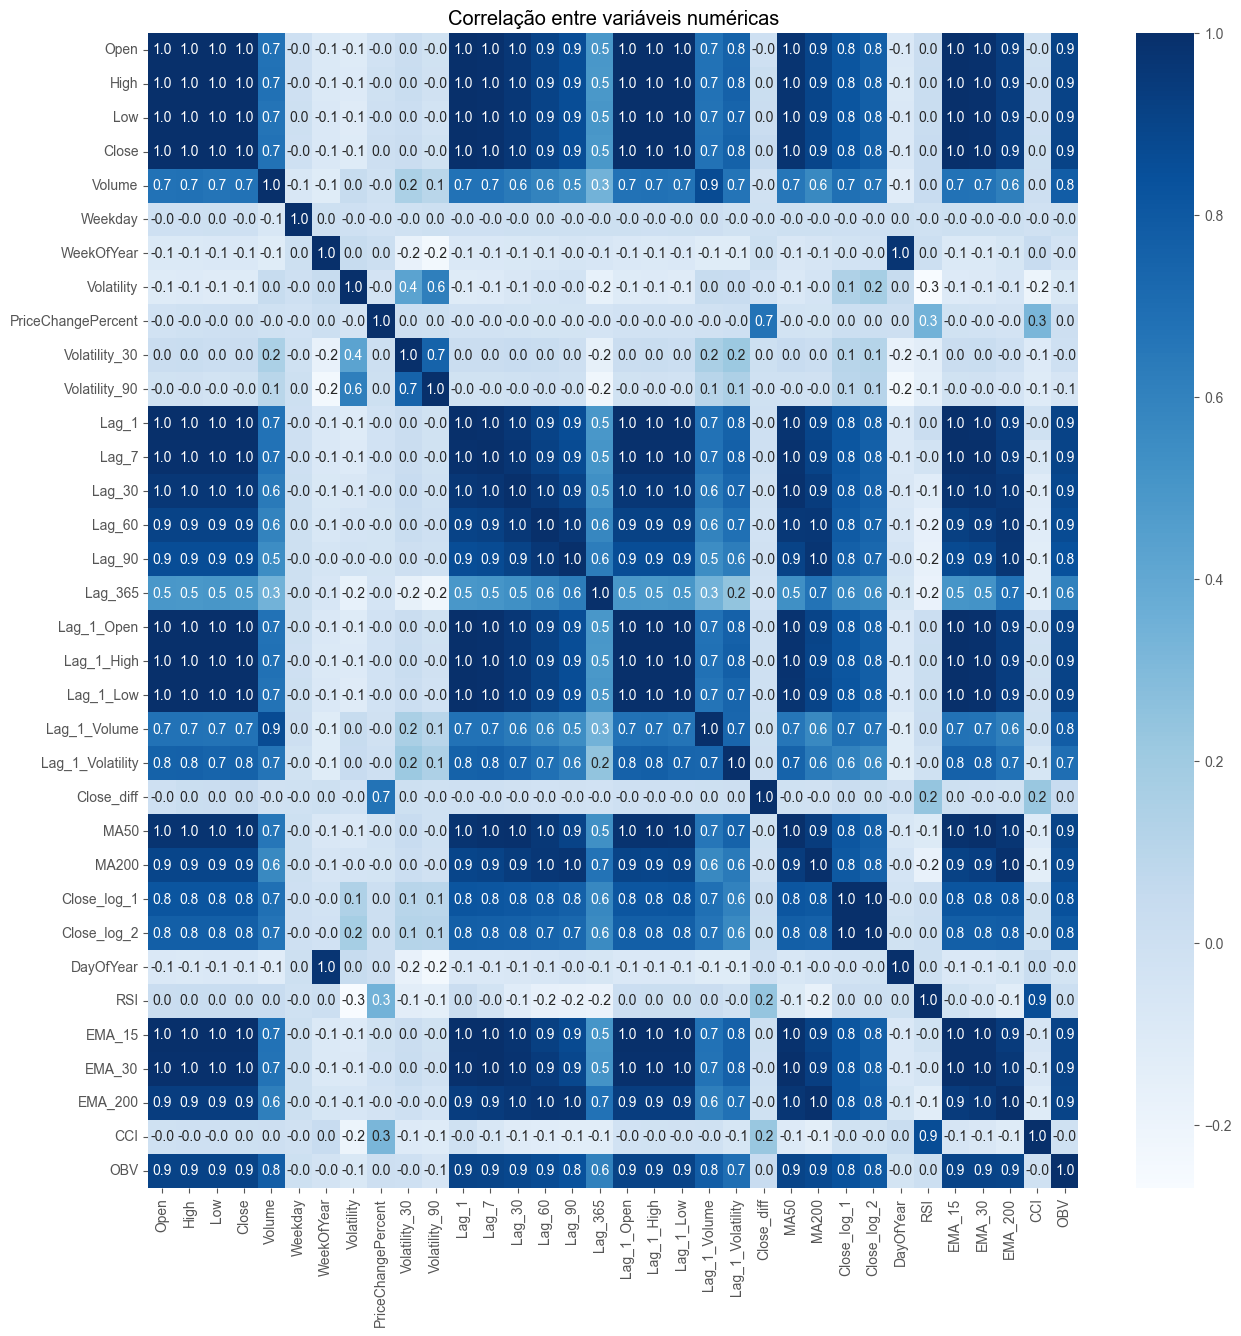

In [23]:
# Selecionar apenas colunas numéricas para a correlação
colunas_numericas = bitcoin_trat_df.select_dtypes(include=['float64', 'int64'])

# Calcular a matriz de correlação apenas com as colunas numéricas
corr = colunas_numericas.corr()

# Criar um heatmap com a matriz de correlação
plt.rcParams['figure.figsize'] = [15, 15]
sns.heatmap(corr, annot=True, fmt='.1f', cmap='Blues')
plt.title('Correlação entre variáveis numéricas')
plt.show()

## Power Predict Score (PPscore)

O heatmap abaixo nos permite visualizar o poder preditivo das variáriaveis do eixo Y sobre as variáveis do eixo X. Diferentemente da correlação que nos mostra a relação linear entre duas variáveis o PPScore nos permite testar outros padrões de relação entre duas variáveis. 

Aqui já conseguimos ver a importância do halving, Quarter, MonthName, volatilidade e um peso menor em Volume e Lags acima de 30. 

CPU times: total: 29.6 s
Wall time: 38.2 s


<Axes: >

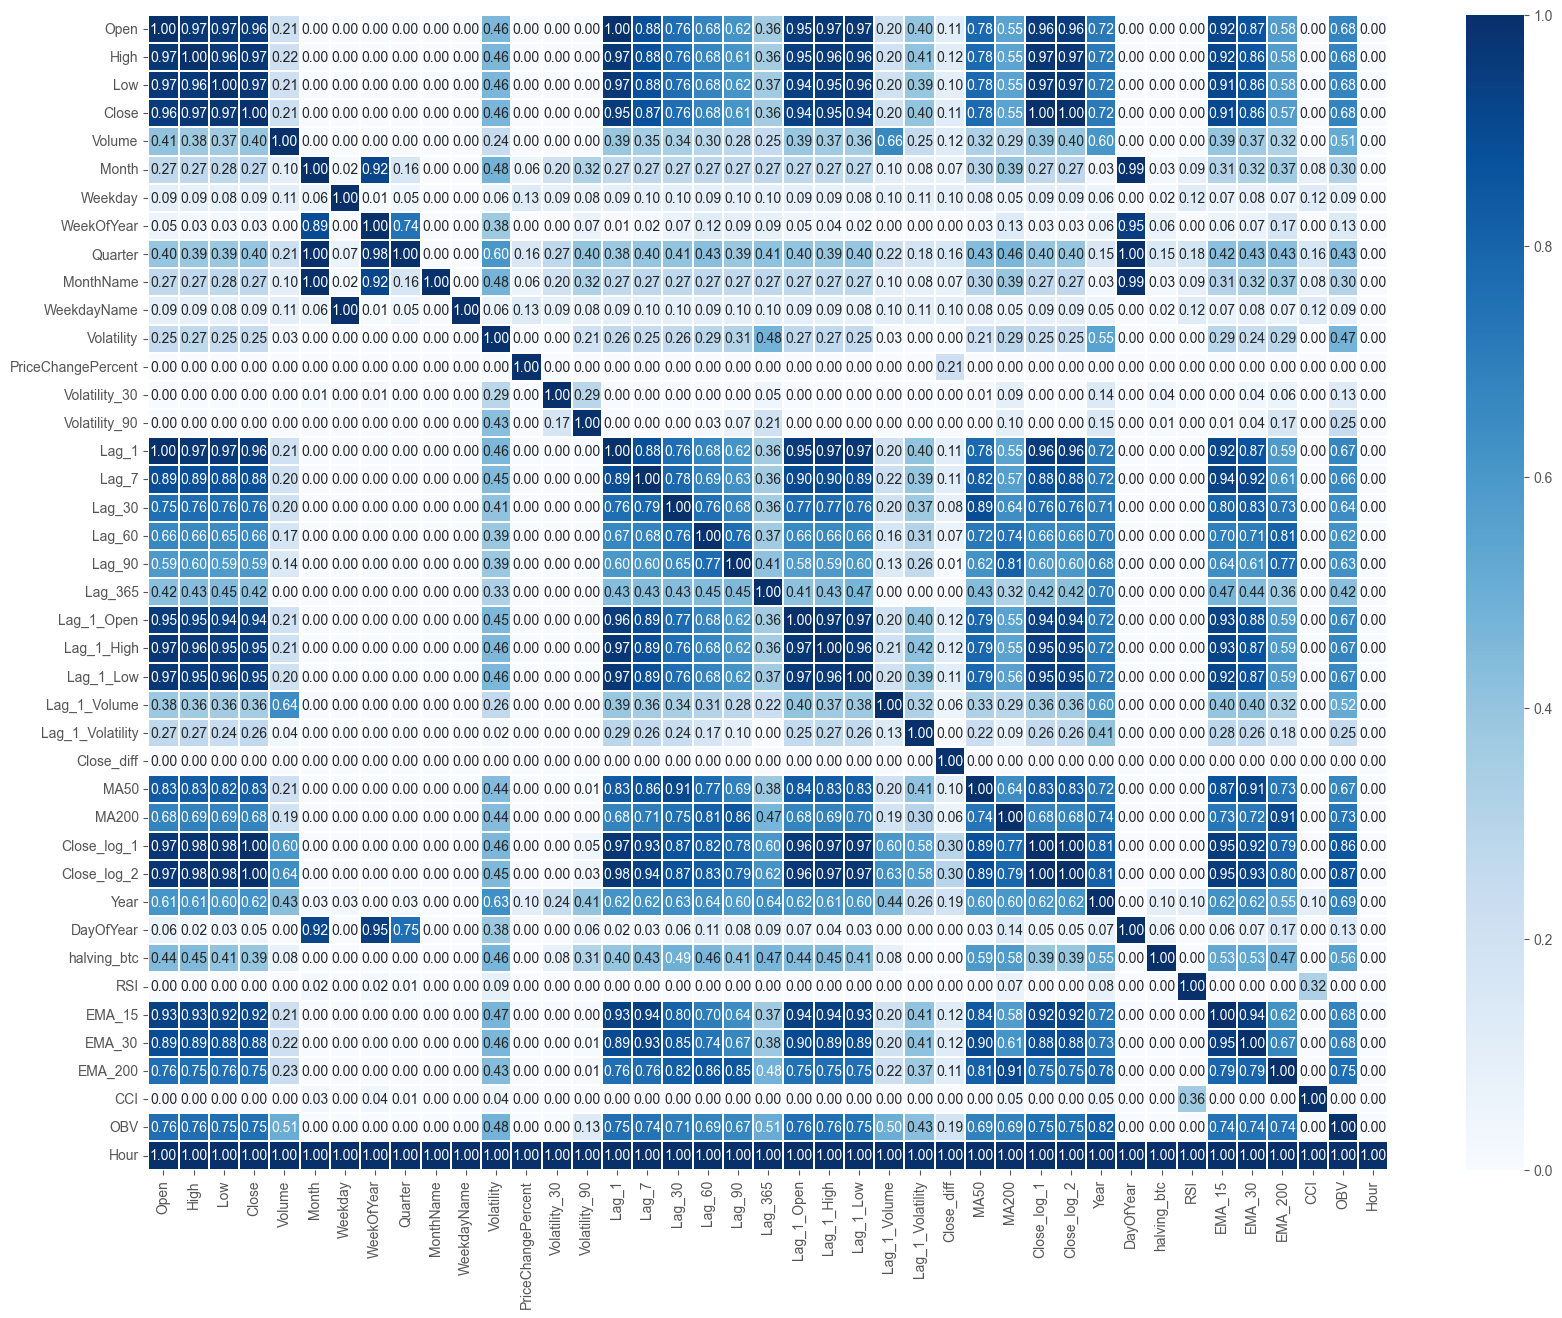

In [24]:
%%time

plt.rcParams['figure.figsize'] = [20, 15]
# Calculando e visualizando a matriz de preditividade de poder (Predictive Power Score - PPS).
# PPS é uma alternativa ao coeficiente de correlação de Pearson para medir a relação não linear entre variáveis.
# A pontuação varia de 0 (sem poder preditivo) a 1 (poder preditivo perfeito). Pode ser utilizado como alternativa à correlação (matriz).
df_matrix = pps.matrix(bitcoin_trat_df)

# Criando um mapa de calor com os valores PPS.
# Valores de PPS variam de 0 a 1, onde 1 indica uma relação previsível perfeita entre duas variáveis.
sns.heatmap(df_matrix, vmin=0, vmax=1, annot=True, fmt='.2f', cmap="Blues", linewidths=0.15)

# Sobre o PPScore
# https://research.macrosynergy.com/the-predictive-power-score/
# https://pypi.org/project/ppscore/#:~:text=The%20PPS%20is%20an%20asymmetric,to%20the%20correlation%20(matrix).
# https://machinelearningknowledge.ai/predictive-power-score-vs-correlation-with-python-implementation/

## Decomposição da serie temporal

Existem dois modelos de decomposição temporal, são eles o aditivo e o multiplicativo. Nós utilizamos o <br>
- Aditivo: Quando as flutuações sazonais são aproximadamente constantes ao longo da série.<br>
- Multiplicativo: Quando as flutuações sazonais aumentam ou diminuem proporcionalmente ao nível da série.<br>

O que é cada sub-gráfico (subplot)?

- Componente de Tendência: Mostra a tendência de longo prazo da série temporal. No seu gráfico, a tendência é claramente ascendente, o que significa que, ao longo do tempo, o valor do Bitcoin em logaritmo tem aumentado.

- Componente Sazonal: Esta parte do gráfico mostra padrões que se repetem em intervalos regulares de tempo. No caso do seu gráfico, a sazonalidade parece ser bastante volátil, mas não apresenta um padrão claro e regular que se repita ao longo do tempo, o que é comum em dados financeiros como os preços de criptomoedas, pois são influenciados por diversos fatores de mercado que variam muito e nem sempre são sazonais.

- Componente de Resíduo: Representa o que resta depois de remover a tendência e a sazonalidade dos dados. É a parte da série que não pode ser explicada pelos modelos de tendência e sazonalidade, podendo incluir o efeito de variáveis aleatórias e ruído. O resíduo no gráfico parece estar centrado em torno de um valor constante sem padrões claros, o que sugere que a decomposição foi bastante efetiva em isolar a tendência e a sazonalidade.

### Variavel sem ter sido transformada

Conclusões e Insights:<br>
Tendência: <br>
- O mercado do Bitcoin é fortemente influenciado pela tendência de longo prazo. Um destaque importante é que os dados (da variãvel de fechamento) não são estacionários, logo a decomposição da serie temporal pode refletir no gráfico tendência. <br>

Sazonalidade: <br>
- O componente sazonal não é o mais proeminente.<br>

- Resíduos:<br>
Há uma quantidade significativa de variação nos dados que é capturada no termo residual. Outra consequência da variável não ser transformada é na volatilidade dos resíduos  <br>

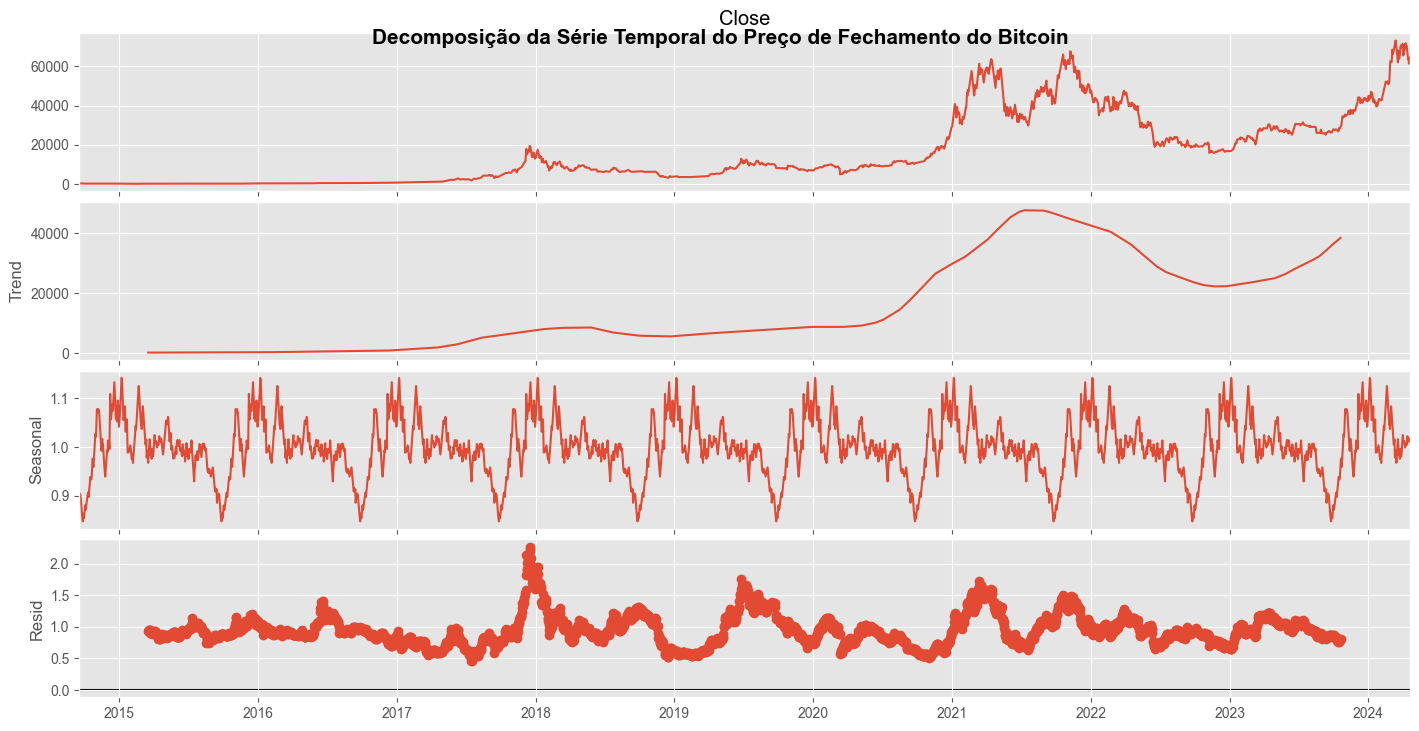

In [25]:
# Decompondo a série temporal do preço de fechamento diário
decomposition = seasonal_decompose(bitcoin_trat_df['Close'], model='multiplicative', period=365)

# Plotando os componentes da decomposição
fig = decomposition.plot()
fig.set_size_inches(14, 7)
fig.suptitle('Decomposição da Série Temporal do Preço de Fechamento do Bitcoin', fontsize=15)
plt.show()

### Decomposição com a variável após transformaação de log

A ideia de utilizar uma transformação de logaritmo é com o intuito de suavizar a variância. O primeiro gráfico da decomposição nos permite acompanhar a evolução do bitcoin ao longo dos anos, podemos concluir que o ativo está em crescimento.<br>
Tendência (Trend):<br>
- Podemos ver que a tendência geral é de alta, indicando que, ao longo do tempo, o valor do Bitcoin tem aumentado.<br>
Sazonalidade (Seasonal):<br>
- Esta série não parece ter um padrão sazonal claro e constante. Em vez disso, há flutuações que se repetem, mas sem um padrão regular e previsível. A ausência de uma sazonalidade forte e consistente pode indicar que o Bitcoin é menos afetado por fatores sazonais do que por eventos específicos<br>
Resíduos (Residual):<br>
- Os resíduos parecem ser relativamente estáveis e giram em torno de um valor constante (perto de 1, após a transformação logarítmica), o que sugere que a maior parte das variações foi capturada pela tendência e que os resíduos representam o ruído aleatório ou os efeitos de eventos pontuais.<br>

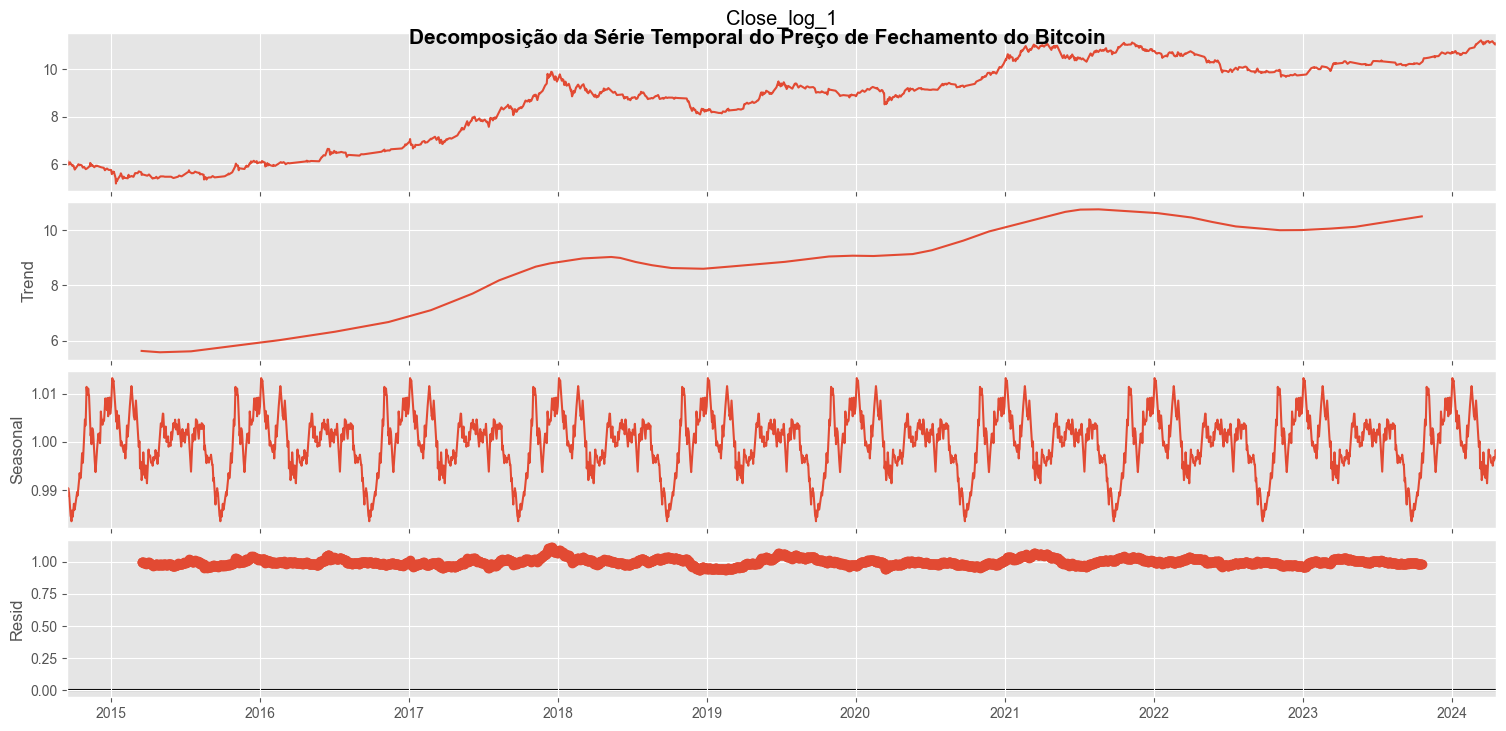

In [26]:
# Decompondo a série temporal do preço de fechamento diário
decomposition = seasonal_decompose(bitcoin_trat_df['Close_log_1'], model='multiplicative', period=365)

# Plotando os componentes da decomposição
fig = decomposition.plot()
fig.set_size_inches(15, 7)
fig.suptitle('Decomposição da Série Temporal do Preço de Fechamento do Bitcoin', fontsize=15)
plt.show()

## Testes estatísticos úteis para série temporal

Teste de Memória da Série são em séries temporais, são métodos estatísticos usados para determinar se as observações passadas de uma série temporal influenciam as futuras em um período de tempo estendido. Em outras palavras, verifica-se se existe persistência ou dependência a longo prazo entre os valores na série.

heteroscedasticidade (variância não constante)

### Teste de Hurst

É um teste estatístico que ajuda a entender o tipo de comportamento de memória que a série exibe. A informação é útil para entender o comportamento da série e pode justificar o uso de um modelo autorregressivo.  Modelos que assumem persistência (como ARIMA ou modelos baseados em GARCH se houver volatilidade)<br>
Antipersistente (H < 0.5)indica um comportamento de memória anti-persistente. Ou seja, aumentos tendem a ser seguidos por quedas e vice-versa.<br>
Aleatória (H ≈ 0.5)  sugere um padrão aleatório, também conhecido como passeio aleatório, onde não há correlação entre os valores.<br>
Persistente (H > 0.5) indica persistência na série temporal. Quanto mais próximo de 1, mais forte é a tendência da série manter sua direção atual - aumentos tendem a seguir aumentos e quedas tendem a seguir quedas.<br>



In [27]:
from hurst import compute_Hc 

# Sua série temporal
series = bitcoin_trat_df.Close_log_1

# Calcule o Exponente de Hurst
H, c, data = compute_Hc(series, kind='price', simplified=True)

# Imprima o resultado
print('Exponente de Hurst:', H)

Exponente de Hurst: 0.711150933245483


### Teste de Variância Reescalonada

Teste de Variância Reescalonada: Variância Reescalonada (R/S) é uma ferramenta útil para entender a natureidade estocástica e a memória em séries temporais financeiras. Este teste é baseado no conceito de que, se uma série temporal apresenta autocorrelação significativa. Uma série pode ter volatilidade condicional que pode ser modelada por um modelo GARCH se persistir a volatilidade após a modelagem com o ARIMA.

0.9715869831929488 -1.1584039780605706 [[ 1.00000000e+00 -8.24161714e-04]
 [ 2.00000000e+00  7.74097917e-01]
 [ 3.00000000e+00  1.67793645e+00]
 [ 4.00000000e+00  2.62605698e+00]
 [ 5.00000000e+00  3.61396566e+00]
 [ 6.00000000e+00  4.63127900e+00]
 [ 7.00000000e+00  5.63081930e+00]
 [ 8.00000000e+00  6.62186592e+00]
 [ 9.00000000e+00  7.76527623e+00]
 [ 1.00000000e+01  8.51277099e+00]]


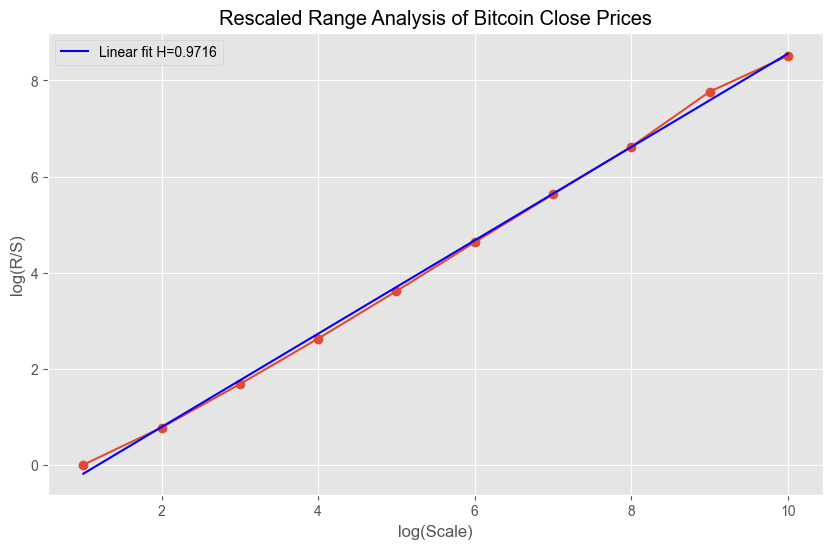

In [28]:
def rescaled_range_analysis(series, max_scale=20):
    """ Calculate the Rescaled Range (R/S) analysis of a time series. """
    n = len(series)
    log_rs = []
    scales = np.logspace(1, max_scale, num=max_scale, base=2).astype(int)
    scales = np.unique(scales)  # Ensure unique scales only

    for scale in scales:
        if scale > n:
            break
        scaled_series = [series[i:i + scale] for i in range(0, n, scale)]
        rs_values = []
        
        for subseries in scaled_series:
            if len(subseries) < scale:
                break
            mean_sub = np.mean(subseries)
            range_sub = np.ptp(np.cumsum(subseries - mean_sub))
            std_sub = np.std(subseries)
            rs_values.append(range_sub / std_sub if std_sub != 0 else 0)

        if rs_values:
            log_rs.append([np.log2(scale), np.log2(np.mean(rs_values))])

    log_rs = np.array(log_rs)
    H, c = np.polyfit(log_rs[:, 0], log_rs[:, 1], 1)
    return H, c, log_rs

# Calculating the Rescaled Range analysis for 'Close' series
H, c, log_rs_data = rescaled_range_analysis(bitcoin_trat_df['Close_log_1'].values, max_scale=10)

print(H,c,log_rs_data)

# Plotting the Rescaled Range analysis
plt.figure(figsize=(10, 6))
plt.plot(log_rs_data[:, 0], log_rs_data[:, 1], marker='o', linestyle='-')
plt.plot(log_rs_data[:, 0], H * log_rs_data[:, 0] + c, color='blue', label=f'Linear fit H={H:.4f}')
plt.xlabel('log(Scale)')
plt.ylabel('log(R/S)')
plt.title('Rescaled Range Analysis of Bitcoin Close Prices')
plt.legend()
plt.grid(True)
plt.show()




H = 0.9716: O valor muito próximo de 1, sugere que há um forte comportamento de persistência na série temporal. Isso converge com o que foi observado no teste de Hurst.

Para área de investimentos essa é uma informação útil para estratégias de longo prazo. No caso do Bitcoin podemos ver que ele tende a manter uma direção, no contexto dele é crescimento. .

### Teste Dickey-Fuller

O teste ADF é usado para determinar se uma série temporal possui uma tendência estocástica ou determinística, indicada pela presença de uma raiz unitária. Se uma série temporal possui uma raiz unitária, significa que a série pode ser não estacionária, ou seja, sua média, variância e covariância não são constantes ao longo do tempo.

Hipóteses do teste:

Hipótese nula (H0): A série temporal possui uma raiz unitária (não estacionária).

Hipótese alternativa (H1): A série temporal não possui raiz unitária (estacionária).

In [29]:
# Realizando o teste Dickey-Fuller Aumentado (ADF)
adf_test = adfuller(bitcoin_trat_df['Close'], autolag='AIC')

# Exibindo os resultados
print(f'Valor-p: {adf_test[1]}')
if adf_test[1] <= 0.05:
    print("A série é estacionária.")
else:
    print("A série não é estacionária.")

# Mostrando os resultados detalhados
print("Resultado Detalhado do Teste ADF:")
print(f"Statistic: {adf_test[0]}")
print(f"Valor-p: {adf_test[1]}")
print("Valores Críticos:")
for key, value in adf_test[4].items():
    print(f'    {key}: {value}')

# Realizando o teste Dickey-Fuller Aumentado (ADF)
adf_test_diff = adfuller(bitcoin_trat_df['Close_diff'].dropna(), autolag='AIC')

# Exibindo os resultados
print(f'Valor-p: {adf_test_diff[1]}')
if adf_test_diff[1] <= 0.05:
    print("\nApós a diferenciação a série é estacionária. (Close_diff)")
else:
    print("\nApós a diferenciação a série não é estacionária.(Close_diff)")

# Mostrando os resultados detalhados
print("Resultado Detalhado do Teste ADF na Variavel Close_diff:")
print(f"Statistic: {adf_test_diff[0]}")
print(f"Valor-p: {adf_test_diff[1]}")
print("Valores Críticos:")
for key, value in adf_test_diff[4].items():
    print(f'    {key}: {value}')

# Realizando o teste Dickey-Fuller Aumentado (ADF)
adf_test_diff = adfuller(bitcoin_trat_df['Close_log_1'].dropna(), autolag='AIC')

# Exibindo os resultados
print(f'Valor-p: {adf_test_diff[1]}')
if adf_test_diff[1] <= 0.05:
    print("\nApós a diferenciação a série é estacionária. (Close_log_1)")
else:
    print("\nApós a diferenciação a série não é estacionária.(Close_log_1)")

# Mostrando os resultados detalhados
print("Resultado Detalhado do Teste ADF na Variavel Close_log_1:")
print(f"Statistic: {adf_test_diff[0]}")
print(f"Valor-p: {adf_test_diff[1]}")
print("Valores Críticos:")
for key, value in adf_test_diff[4].items():
    print(f'    {key}: {value}')

Valor-p: 0.8299320160633092
A série não é estacionária.
Resultado Detalhado do Teste ADF:
Statistic: -0.7623504491001567
Valor-p: 0.8299320160633092
Valores Críticos:
    1%: -3.432234290201809
    5%: -2.86237257196617
    10%: -2.567213192862317
Valor-p: 7.780523371137682e-16

Após a diferenciação a série é estacionária. (Close_diff)
Resultado Detalhado do Teste ADF na Variavel Close_diff:
Statistic: -9.361944250856208
Valor-p: 7.780523371137682e-16
Valores Críticos:
    1%: -3.432234290201809
    5%: -2.86237257196617
    10%: -2.567213192862317
Valor-p: 0.8157420785557232

Após a diferenciação a série não é estacionária.(Close_log_1)
Resultado Detalhado do Teste ADF na Variavel Close_log_1:
Statistic: -0.8114281017683086
Valor-p: 0.8157420785557232
Valores Críticos:
    1%: -3.432224030212334
    5%: -2.8623680400255576
    10%: -2.5672107801861626


Análise do resultado do teste dickey-fuller aumentativo (ADF)<br>
'Close': O valor-p é 0.8167, o que significa que não podemos rejeitar a hipótese nula de que há uma raiz unitária, indicando que a série não é estacionária.<br>
'Close_diff': O valor-p é extremamente baixo (2.845e-14), permitindo rejeitar a hipótese nula e concluir que a série diferenciada é estacionária.<br>
'Close_log_1': O valor-p é 0.8103, semelhante ao da série 'Close', indicando que a série também não é estacionária.<br>

### Teste de Kpss

O teste KPSS é utilizado para testar a hipótese nula de que uma série temporal é estacionária em torno de uma média constante (versão sem tendência) ou de uma tendência linear (versão com tendência). Esse teste é útil porque complementa o teste ADF, ajudando a identificar diferentes tipos de não estacionariedade. Enquanto o ADF foca em raízes unitárias, o KPSS testa a estacionariedade assumindo que a série pode ter uma raiz unitária como componente de tendência ou drift.<br><br>

Hipótese nula (H0): A série temporal é estacionária (em torno de uma média ou tendência).<br>
Se a estatística de teste for menor ou igual ao valor crítico para um dado nível de significância, então você não rejeita a hipótese nula de estacionariedade.<br>

Hipótese alternativa (H1): A série temporal não é estacionária (tem raiz unitária).<br>
Se a estatística de teste for maior do que o valor crítico, então a hipótese nula é rejeitada, sugerindo que a série é não estacionária.<br>

In [30]:
# Teste de Kpss
kpss_test = kpss(bitcoin_trat_df['Close'].dropna())
print(f'\nValor-p: {kpss_test[1]} do teste kpss para variavel Close \n')

# Teste de Kpss
kpss_test = kpss(bitcoin_trat_df['Close_diff'].dropna())
print(f'Valor-p: {kpss_test[1]} do teste kpss para variavel Close_diff\n')

# Teste de Kpss
kpss_test = kpss(bitcoin_trat_df['Close_log_1'].dropna())
print(f'Valor-p: {kpss_test[1]} do teste kpss para variavel Close_log_1\n')


Valor-p: 0.01 do teste kpss para variavel Close 

Valor-p: 0.1 do teste kpss para variavel Close_diff

Valor-p: 0.01 do teste kpss para variavel Close_log_1



'Close': O valor-p é 0.01, indicando que rejeitamos a hipótese nula de estacionariedade, o que sugere que a série é não estacionária.<br>
'Close_diff': O valor-p é 0.1, o que não permite rejeitar a hipótese nula de estacionariedade, indicando que a série é estacionária.<br>
'Close_log_1': O valor-p é 0.01, rejeitando a hipótese nula de estacionariedade, o que sugere que a série é não estacionária.<br>

### Teste Phillips-Perron

O teste Phillips-Perron é uma abordagem para testar a presença de uma raiz unitária em uma série temporal, semelhante ao teste Dickey-Fuller Aumentado (ADF). A principal diferença é que o teste Phillips-Perron faz ajustes na estatística do teste para contabilizar formas mais gerais de autocorrelação e dependência heterogênea nos resíduos, sem a necessidade de especificar um modelo AR específico para a série temporal.<br>


Características do Teste Phillips-Perron:<br>
Não necessita de um modelo de autocorrelação: Ao contrário do ADF, que utiliza um processo autorregressivo para modelar os resíduos, o teste Phillips-Perron corrige diretamente a estatística de teste para possíveis autocorrelações e heteroscedasticidade nos resíduos.<br>
Tendência: Pode ser aplicado a séries temporais com ou sem tendência e/ou intercepto, escolhendo-se o termo 'ct' (tendência constante e linear).<br>
Hipóteses: A hipótese nula é que a série contém uma raiz unitária (não é estacionária), enquanto a hipótese alternativa é que a série é estacionária.<br>

A interpretação do teste PP é semelhante à do teste ADF:<br>

Hipótese nula (H0): A série temporal possui uma raiz unitária (não estacionária).<br>
Se a estatística de teste for mais negativa do que o valor crítico para um nível de significância específico, então você rejeita a hipótese nula de raiz unitária, concluindo que a série é estacionária.<br><br>
Hipótese alternativa (H1): A série temporal não possui raiz unitária (estacionária).<br>
Se a estatística de teste não for mais negativa do que o valor crítico, então você não rejeita a hipótese nula, indicando que a série pode não ser estacionária.<br>



In [31]:
# https://vsevolodkotenyov.medium.com/providing-unit-root-testing-for-time-series-with-python-arch-library-adf-kpss-phillips-perron-b80d21e68892
php_ct = PhillipsPerron(bitcoin_trat_df['Close'], trend = 'ct')
print('Close')
print(php_ct.summary() )

# https://vsevolodkotenyov.medium.com/providing-unit-root-testing-for-time-series-with-python-arch-library-adf-kpss-phillips-perron-b80d21e68892
php_ct_Close_diff = PhillipsPerron(bitcoin_trat_df['Close_diff'].dropna(), trend = 'ct')
print( '\n\nClose_diff')
print(php_ct_Close_diff.summary())

# https://vsevolodkotenyov.medium.com/providing-unit-root-testing-for-time-series-with-python-arch-library-adf-kpss-phillips-perron-b80d21e68892
php_ct_Close_log_1 = PhillipsPerron(bitcoin_trat_df['Close_log_1'].dropna(), trend = 'ct')
print( '\n\nClose_log_1')
print(php_ct_Close_log_1.summary())

Close
     Phillips-Perron Test (Z-tau)    
Test Statistic                 -1.969
P-value                         0.618
Lags                               30
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -3.96 (1%), -3.41 (5%), -3.13 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


Close_diff
     Phillips-Perron Test (Z-tau)    
Test Statistic                -62.178
P-value                         0.000
Lags                               30
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -3.96 (1%), -3.41 (5%), -3.13 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


Close_log_1
     Phillips-Perron Test (Z-tau)    
Test Statistic                 -1.726
P-value                         0.739
Lags                               30
---------------------------------

Análise do Resultado do teste de Phillips-Perron<br>
'Close': O valor-p é 0.615, indicando que não podemos rejeitar a hipótese nula de raiz unitária, logo a série não é estacionária.<br>
'Close_diff': O valor-p é praticamente 0 (indicado como 0.000), permitindo rejeitar a hipótese nula de raiz unitária, o que indica que a série diferenciada é estacionária.<br>
'Close_log_1': O valor-p é 0.742, também indicando que não podemos rejeitar a hipótese nula de raiz unitária, logo a série não é estacionária.<br>

Tanto o teste de Dickey-fuller, kpss e o Phillips-Perron chegaram a mesma conclusão de que Close e Close_log_1 não são estacionárias e a Close_diff é estacionária. O resultado era esperado, tendo em vista  que o contexto é dados financeiros. 

### Teste de Shapiro-Wilk

Shapiro-Wilk é um procedimento estatístico popular usado para avaliar a normalidade de uma distribuição de dados, geralmente é uma pré-condição para a análise a ser realizada. <br>

O teste de Shapiro-Wilk, também, é frequentemente usado para verificar a normalidade dos resíduos em modelos de regressão e outras análises estatísticas onde a normalidade é uma suposição importante. Uma suposição de normalidade é crucial em muitos testes estatísticos, incluindo análises de variância (ANOVA, ou seja, testes parametricos), alguns testes de correlação e testes que dependem de técnicas de inferência paramétrica.<br>

In [32]:
# Realizando o teste de Shapiro-Wilk para a coluna 'Close'
shapiro_test = shapiro(bitcoin_trat_df['Close'])
print(f'\nshapiro test na variavel Close: {shapiro_test} ')

# Realizando o teste de Shapiro-Wilk para a coluna 'Close'
shapiro_test = shapiro(bitcoin_trat_df['Close_diff'].dropna())
print(f'shapiro test na variavel Close_diff: {shapiro_test} ')

# Realizando o teste de Shapiro-Wilk para a coluna 'Close'
shapiro_test = shapiro(bitcoin_trat_df['Close_log_1'].dropna())
print(f'shapiro test na variavel Close_log_1: {shapiro_test} ')


shapiro test na variavel Close: ShapiroResult(statistic=0.8273857831954956, pvalue=0.0) 
shapiro test na variavel Close_diff: ShapiroResult(statistic=0.7071624994277954, pvalue=0.0) 
shapiro test na variavel Close_log_1: ShapiroResult(statistic=0.9032835364341736, pvalue=1.5582438923291966e-42) 


'Close': O valor da estatística é menor que 1 e o valor-p é 0, indicando que podemos rejeitar a hipótese nula de normalidade. Isso sugere que a distribuição dos preços de fechamento não é normal.<br>
'Close_diff': A estatística é ainda menor que a da série 'Close' e o valor-p continua sendo 0, indicando uma rejeição ainda mais forte da normalidade. A série diferenciada mostra uma distribuição que está longe de ser normal, o que é típico para dados de retorno financeiro que frequentemente exibem caudas pesadas e assimetria.<br>
'Close_log_1':  Apesar de a estatística estar mais próxima de 1, indicando uma forma mais próxima da distribuição normal comparada às outras séries, o valor-p ainda é extremamente baixo, levando à rejeição da hipótese nula de normalidade. Isto sugere que, embora a transformação logarítmica tenha ajudado a aproximar a distribuição de uma forma normal, ainda existem desvios significativos da normalidade.<br>

Tendo em vista os resultados e as conclusões podemos concluir que nenhuma das séries possuem uma distribuição normal. Isso já era um pouco esperado tendo em vista que os dados utilizados são finceiros. Geralmente dados financeiros possuem uma direção de cauda mais proeminente e picos mais pronunciados e caudas mais grossas do que seria esperado em uma distribuição normal. Abaixo utilizando o teste de kewness e Kurtosis conseguimos evidenciar o comportamento dessa distribuição

### Teste de Skewness e Kurtosis

Skewness (Assimetria) e Kurtosis<br>
Assimetria: 1.1845 - A série tem uma assimetria positiva, indicando uma cauda mais pesada à direita.<br>
Curtose: 0.4189 - A curtose é próxima de zero, sugerindo que a distribuição tem caudas semelhantes à normal, mas isso pode ser enganoso dado o valor de assimetria e os resultados do teste de Shapiro-Wilk.<br>

In [33]:
# Calculando a Skewness (Assimetria) e Kurtosis para a coluna 'Close'
skewness = skew(bitcoin_trat_df['Close'])
kurtosis_val = kurtosis(bitcoin_trat_df['Close'])

print(f'\nskewness: {skewness}') 
print(f'kurtosis {kurtosis_val}\n')


skewness: 1.1841442832797986
kurtosis 0.4111271936846719



### Autocorrelação (ACF e PACF)

Função de Autocorrelação (ACF)<br>
A ACF mede a correlação entre os valores da série temporal e os valores passados (lags). 

Função de Autocorrelação Parcial (PACF)<br>
A PACF mede a correlação entre os valores da série temporal e os valores passados que não são explicados pelas correlações em lags mais curtos. 

Para utilizar o ACF e PACF é necessário:<br>
Garantir a Estacionariedade<br>
Escolher o Número de Lags<br>

Parametros úteis:<br>
O alpha define o intervalo de confiança <br>
method='ols' usa mínimos quadrados ordinários<br>

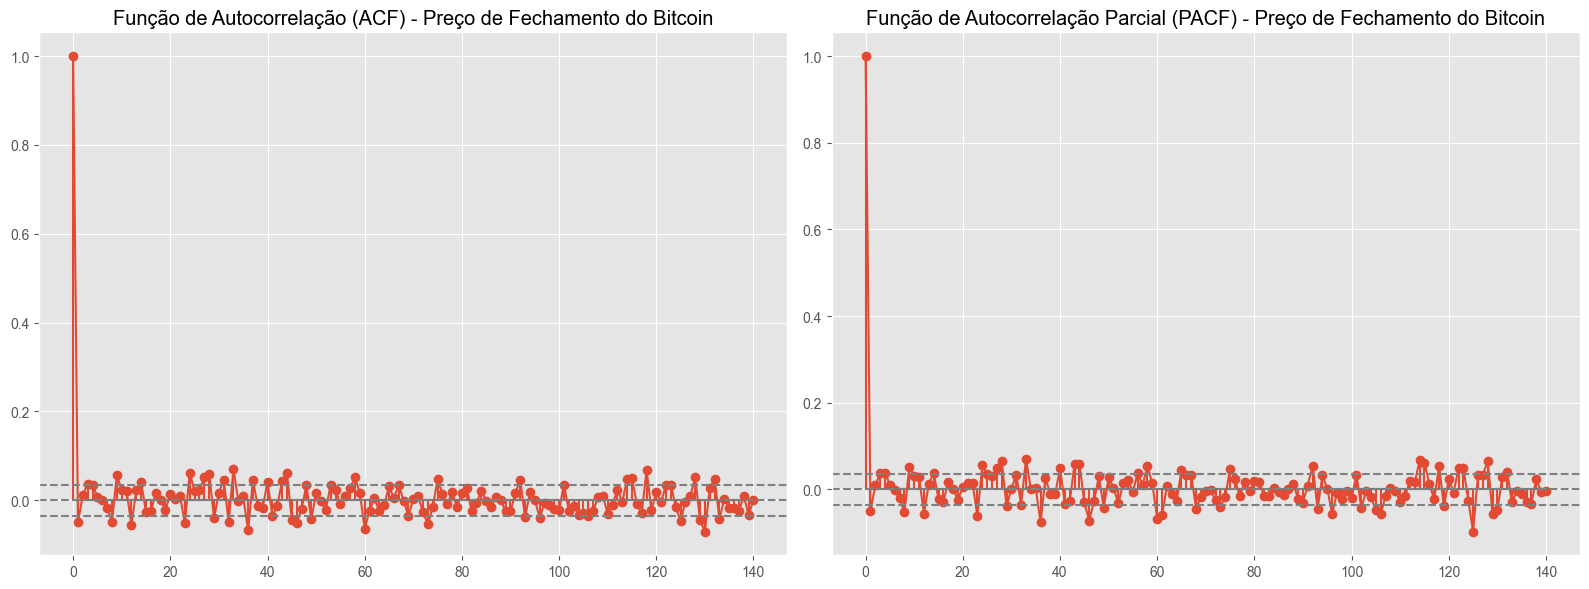

In [34]:
# Removendo qualquer linha com NaN resultante da diferenciação
bitcoin_trat_df_clean = bitcoin_trat_df.dropna()

# A série 'Close_diff' já está diferenciada e é estacionária
differenced_series = bitcoin_trat_df_clean['Close_diff'].values

lag_acf = acf(differenced_series, nlags=140)
lag_pacf = pacf(differenced_series, nlags=140, method='ols')

# Plot ACF:
plt.figure(figsize=(16, 6))
plt.subplot(121)
plt.stem(lag_acf)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(differenced_series)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(differenced_series)), linestyle='--', color='gray')
plt.title('Função de Autocorrelação (ACF) - Preço de Fechamento do Bitcoin')

# Plot PACF:
plt.subplot(122)
plt.stem(lag_pacf) 
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(differenced_series)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(differenced_series)), linestyle='--', color='gray')
plt.title('Função de Autocorrelação Parcial (PACF) - Preço de Fechamento do Bitcoin')
plt.tight_layout()


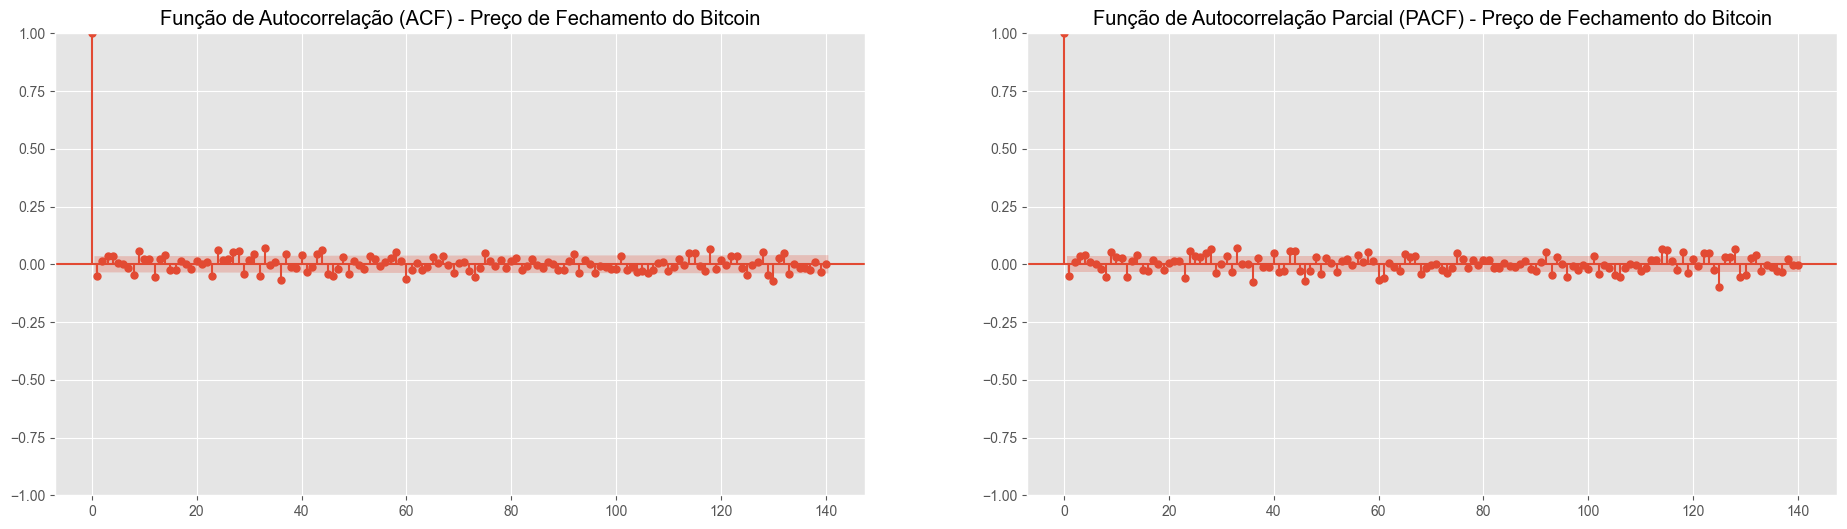

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(23, 6))

# A série 'Close_diff' já está diferenciada e é estacionária
differenced_series = bitcoin_trat_df_clean['Close_diff']

# Plot ACF:
plot_acf(differenced_series,ax=axes[0], lags=140, alpha=0.05)
axes[0].set_title('Função de Autocorrelação (ACF) - Preço de Fechamento do Bitcoin')

# Plot PACF:
plot_pacf(differenced_series, ax=axes[1], lags=140, alpha=0.05, method='ols')
axes[1].set_title('Função de Autocorrelação Parcial (PACF) - Preço de Fechamento do Bitcoin')
plt.show()


Análise da Função de Autocorrelação (ACF)
- Observa-se que a autocorrelação no lag 1 é significativamente diferente de zero, o que é esperado pois a série foi diferenciada.
- A autocorrelação cai rapidamente para dentro da área de não significância (dentro das linhas pontilhadas), que representam o intervalo de confiança, sugerindo que a diferenciação foi eficaz em remover a autocorrelação na série e torná-la estacionária.

Análise da Função de Autocorrelação Parcial (PACF)
- O gráfico PACF mostra um grande pico no lag 1 seguido de correlações parciais que caem rapidamente para zero, o que é característico de um processo autoregressivo. Isso pode indicar que um modelo AR(1) ou um modelo ARIMA.

Um termo de diferenciação)<br>
AR = 1)<br>
MA = 0)<br>

### Teste de Ljung-Box

O teste de Ljung Box (nomeado por Ljung e Box) é um tipo de teste estatístico para verificar se grupo  e autocorrelações de uma série temporal é diferente de zero<br>

https://en.wikipedia.org/wiki/Ljung%E2%80%93Box_test<br>

Ljung-Box test value (Lag 1): 8.72045572978637
Ljung-Box test p-value (Lag 1): 0.003146593768265704
Ljung-Box test value (Lag 7): 19.323112521958254
Ljung-Box test p-value (Lag 7): 0.007233193412230157
Ljung-Box test value (Lag 60): 278.25733439285517
Ljung-Box test p-value (Lag 60): 7.76663303672547e-30
Ljung-Box test value (Lag 90): 333.7597930095645
Ljung-Box test p-value (Lag 90): 1.0419473296045895e-29


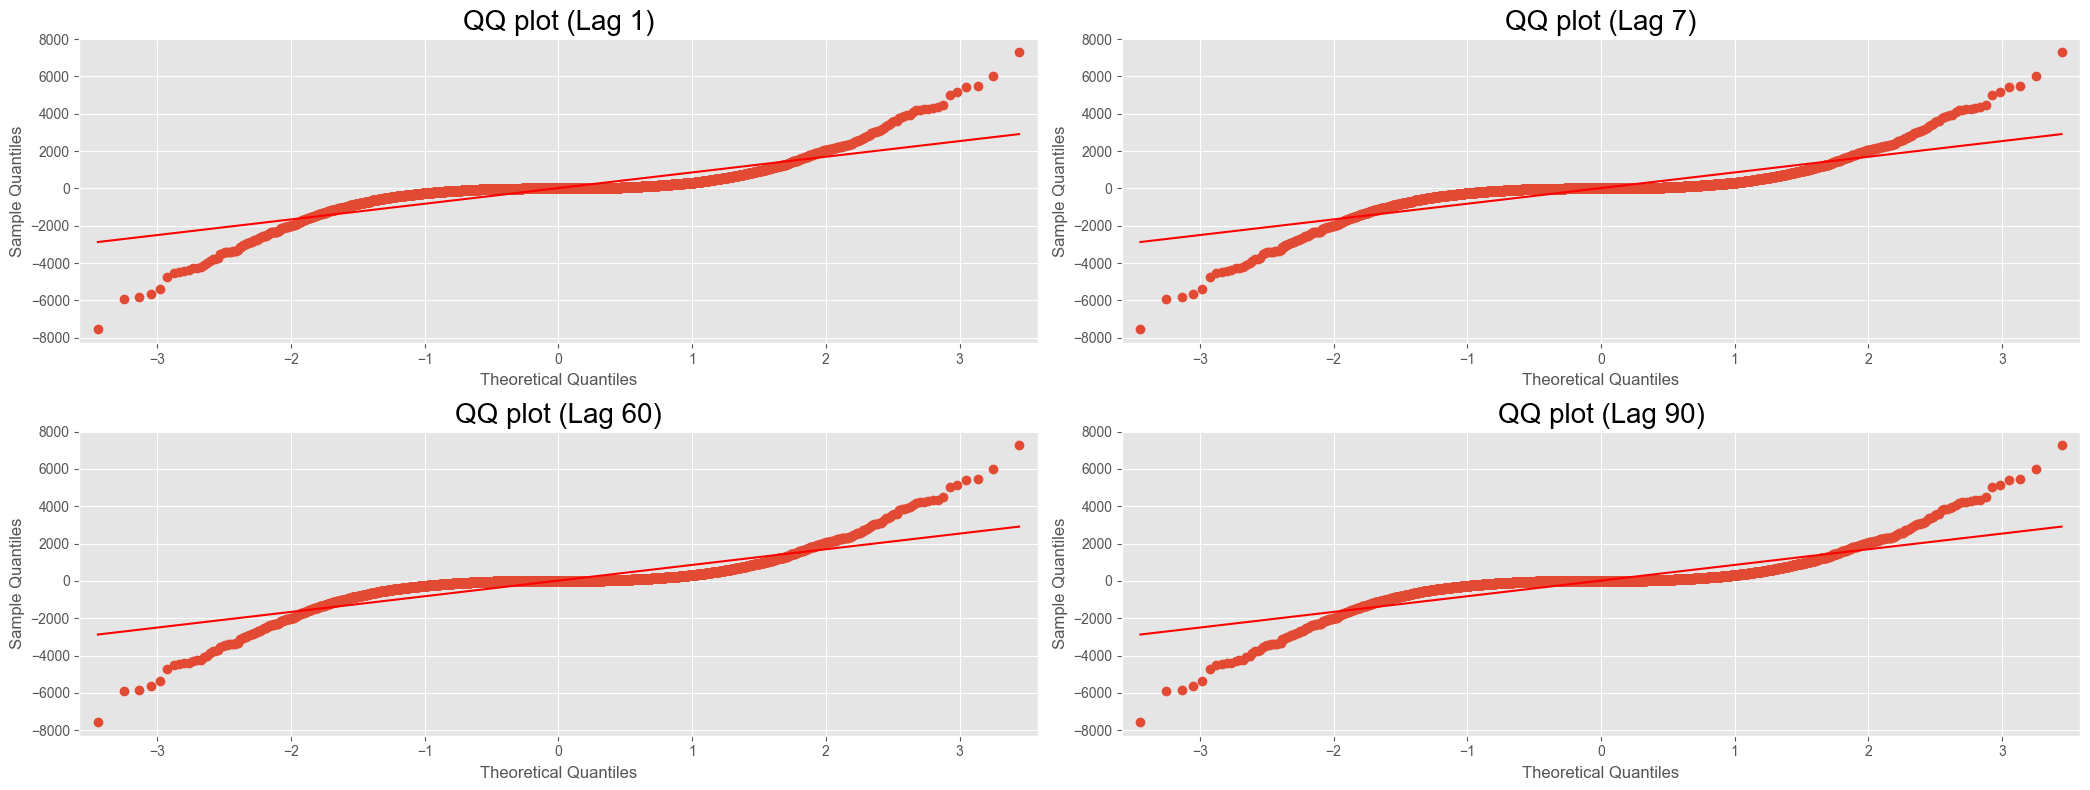

In [36]:
# Dados
close = bitcoin_trat_df['Close_diff'].dropna()

# Configurando a área de plotagem
fig, axes = plt.subplots(2, 2, figsize=(21, 8))

# Lags que queremos testar
lags = [1, 7, 60, 90]

# Iterando sobre os lags e criando os gráficos
for i, lag in enumerate(lags):
    # Criando o QQ plot no subplot correspondente
    ax = axes[i // 2, i % 2]  # Isso seleciona o eixo correto na matriz de plots
    qqplot(close, line='s', ax=ax)
    ax.set_title(f'QQ plot (Lag {lag})', fontsize=20)

    # Realizando o teste de Ljung-Box para o lag correspondente
    df_gr = acorr_ljungbox(close, lags=[lag], return_df=False)

    # Imprimindo os resultados do teste de Ljung-Box
    print(f"Ljung-Box test value (Lag {lag}): {df_gr['lb_stat'].values[0]}")
    print(f"Ljung-Box test p-value (Lag {lag}): {df_gr['lb_pvalue'].values[0]}")

# Mostrando os plots
plt.tight_layout()
plt.show()

Análise do teste de Ljung-Box do Lag 1/Lag 7/Lag 60/Lag 90:<br>
O resultado do teste de Ljung-Box e o p-value (rejeição da hipotese nula) dele indica que há autocorrelação nós 4 lags testados, há uma forte indicação de autocorrelação, que pode ser devido a padrões sazonais ou cíclicos trimestrais.<br>

# Treinamento do Modelo

In [37]:
# Jarque–Bera test
# https://en.wikipedia.org/wiki/Jarque%E2%80%93Bera_test 

## Modelo de Regressão

Estatísticas Diagnósticas:<br>
Durbin-Watson: Próximo de 2, o que sugere que não há autocorrelação significativa nos resíduos.<br>
Jarque-Bera (JB): O teste sugere que os resíduos não são normalmente distribuídos.<br>
Skew: Uma assimetria positiva indica que a distribuição dos resíduos é ligeiramente inclinada para a direita.<br>
Kurtosis: Um valor muito alto indica caudas mais pesadas do que uma distribuição dos resíduos.<br><br>

### Regressão simples 

In [38]:
# Criando uma variável de tempo
bitcoin_trat_df['t'] = range(1, len(bitcoin_trat_df) + 1)

# Removendo qualquer linha com NaN resultante da diferenciação
bitcoin_trat_df_clean = bitcoin_trat_df.dropna()

# Ajustando o modelo de regressão linear
modelo_lin = ols('Close_diff ~ t', data=bitcoin_trat_df_clean).fit()

# Resumo do modelo
modelo_lin_summary = modelo_lin.summary()

modelo_lin_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Close_diff   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.032
Date:                Fri, 19 Apr 2024   Prob (F-statistic):              0.310
Time:                        19:51:27   Log-Likelihood:                -25751.
No. Observations:                3138   AIC:                         5.151e+04
Df Residuals:                    3136   BIC:                         5.152e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -13.9331     37.328     -0.373      0.709     -87.122      59.256
t              0.0178      0.017      1.016      0.310      -0.017       0.052
==============================================================================
Omnibus:                      647.865   Durbin-Watson:                   2.100
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21854.339
Skew:                          -0.132   Prob(JB):                         0.00
Kurtosis:                      15.926   Cond. No.                     5.04e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
# Realizando o teste de Shapiro-Wilk nos resíduos do modelo
shapiro_test_residuos = shapiro(modelo_lin.resid)

# Resultado do teste de Shapiro-Wilk
shapiro_result_residuos = {
    'Statistic': shapiro_test_residuos[0],
    'p-value': shapiro_test_residuos[1]
}

shapiro_result_residuos

{'Statistic': 0.7420005202293396, 'p-value': 0.0}

Análise do modelo:<br>
- R² de 0.000 indica que o modelo não explica nada da variabilidade nos retornos diferenciados do Bitcoin.<br>
- Um valor de 1.023 para F-statistic e um p-valor alto (0.312) indicam que o modelo não é estatisticamente significativo no nível global.<br>
- O teste de Durbin-Watson teve como valor 2.101 o que é satisfatório, sugerindo que os resíduos do modelo não estão autocorrelacionados.<br>
- O teste de Jarque-Bera tem um valor extremamente alto e um p-valor de 0, indicando que os resíduos não são normalmente distribuídos.  O que é corroborado pelo teste de Shapiro-Wilk se aplicado (não fornecido aqui)<br>
- O skewness (assimetria) próximo de zero indica que os resíduos têm uma distribuição simétrica
- A kurtosis muito alta (15.928) indica caudas pesadas<br>
- Baseado no teste de Jarque-Bera e na kurtosis, é possível que haja heteroscedasticidade.<br><br>

### Regressão Multilinear 

In [40]:
# Preparando variáveis categóricas com variáveis dummy
bitcoin_trat_df_clean = pd.get_dummies(bitcoin_trat_df, columns=['MonthName', 'WeekdayName', 'Quarter', 'halving_btc'])

# Removendo qualquer linha com NaN resultante da diferenciação
bitcoin_trat_df_clean = bitcoin_trat_df_clean.dropna()

# Selecionando as colunas para o modelo, incluindo as variáveis dummy geradas
selected_columns = ['Lag_1_Open', 'Lag_1_High', 'Lag_1_Low', 'Lag_1_Volume', 'RSI', 'EMA_15', 'EMA_30', 'EMA_200', 'OBV', 
                    'MA50', 'MA200', 'Lag_1_Volume', 'Lag_1_Volatility', 'Volatility_30', 'Volatility_90', 
                    'CCI', 'Lag_1', 'Lag_7', 'Lag_30', 'Lag_60', 'Lag_365'] + \
                   [col for col in bitcoin_trat_df_clean.columns if 'MonthName_' in col] + \
                   [col for col in bitcoin_trat_df_clean.columns if 'WeekdayName_' in col] + \
                   [col for col in bitcoin_trat_df_clean.columns if 'Quarter_' in col] + \
                   [col for col in bitcoin_trat_df_clean.columns if 'halving_btc_' in col]

# Normalizando as características
scaler = StandardScaler()
bitcoin_trat_df_clean[selected_columns] = scaler.fit_transform(bitcoin_trat_df_clean[selected_columns])

# Separando os dados em conjuntos de treino e teste
train_df, test_df = train_test_split(bitcoin_trat_df_clean, test_size=0.2, random_state=42)

# Construindo a fórmula para o modelo de regressão múltipla
formula = 'Close_diff ~ ' + ' + '.join(selected_columns)

# Ajustando o modelo de regressão múltipla no conjunto de treinamento
modelo_lin_mult_complex = smf.ols(formula, data=train_df).fit()

# Previsões no conjunto de teste
test_df['predicted_close_diff'] = modelo_lin_mult_complex.predict(test_df)

# Cálculo do MAE e RMSE MSE
mae = mean_absolute_error(test_df['Close_diff'], test_df['predicted_close_diff'])
rmse = np.sqrt(mean_squared_error(test_df['Close_diff'], test_df['predicted_close_diff']))
mse = mean_squared_error(test_df['Close_diff'], test_df['predicted_close_diff'])

# Exibindo os resultados
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")

# Resumo do modelo
modelo_lin_mult_complex_summary = modelo_lin_mult_complex.summary()
print(modelo_lin_mult_complex_summary)

MSE: 447831.6424071322
MAE: 417.2050267434124
RMSE: 669.2022432771219
                            OLS Regression Results                            
Dep. Variable:             Close_diff   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.354
Method:                 Least Squares   F-statistic:                     36.19
Date:                Fri, 19 Apr 2024   Prob (F-statistic):          1.94e-210
Time:                        19:51:27   Log-Likelihood:                -20067.
No. Observations:                2510   AIC:                         4.021e+04
Df Residuals:                    2470   BIC:                         4.045e+04
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------

In [41]:
#Teste de Variância Reescalonada
# Obtenha os resíduos
residuals = modelo_lin_mult_complex.resid

# Execute o teste de Breusch-Pagan
bp_test = het_breuschpagan(residuals, modelo_lin_mult_complex.model.exog)

# Imprima os resultados
print('Valores do Teste de Breusch-Pagan:', bp_test)

Valores do Teste de Breusch-Pagan: (488.63213256783604, 8.635613539516541e-75, 15.309782166770713, 3.7231914113946896e-89)


In [42]:
# Realizando o teste de Shapiro-Wilk nos resíduos do modelo
shapiro_test_residuos = shapiro(modelo_lin_mult_complex.resid)

# Resultado do teste de Shapiro-Wilk
shapiro_result_residuos = {
    'Statistic': shapiro_test_residuos[0],
    'p-value': shapiro_test_residuos[1]
}

shapiro_result_residuos

{'Statistic': 0.8288352489471436, 'p-value': 1.401298464324817e-45}

Análise do modelo:
- R-squared (R²) de 0.364 significa que o modelo explica cerca de 36.4% da variação nos retornos diferenciados do Bitcoin. Este é um aumento em relação ao modelo anterior e sugere que as variáveis incluídas têm uma maior capacidade explicativa.
- F-estatística de 36.18 e um p-valor próximo de zero indicam que o modelo é estatisticamente significativo, sugerindo que as variáveis independentes têm uma relação coletivamente significativa com a variável dependente.
- O valor de Durbin-Watson de 1.994 sugere que não há autocorrelação significativa nos resíduos do modelo, indicando que o modelo captura bem a dinâmica temporal dos dados.
- Jarque-Bera (JB) teve um valor e o p-valor de zero rejeitam a normalidade dos resíduos, o que implica que a distribuição dos resíduos não segue uma distribuição normal.
- Shapiro-Wilk teve um resultado estatístico de 0.8288 e o p-valor extremamente baixo reforçam a conclusão do teste de Jarque-Bera sobre a não normalidade dos resíduos.
- Skewness teve uma assimetria de -0.562 indica uma distribuição dos resíduos ligeiramente inclinada para os valores menores.
- Curtose de 15.333 muito alta indica que os resíduos têm caudas mais pesadas do que uma distribuição normal, o que pode incluir a presença de outliers ou eventos extremos.
- Teste de Breusch-Pagan retorna um valor estatístico que indicam heteroscedasticidade nos resíduos
- MAE (Mean Absolute Error): Um MAE de 417.20 sugere que, em média, o modelo tem um erro absoluto de 417.20 unidades nos retornos previstos.
- RMSE (Root Mean Squared Error): Um RMSE de 669.17 sugere que as previsões do modelo têm, em média, um desvio de 669.17 unidades do valor real, levando em conta a penalidade por erros maiores.

### Modelo de regressão multilinear utilizando sklearn

In [43]:
# Criando uma variável de tempo
bitcoin_trat_df['t'] = range(1, len(bitcoin_trat_df) + 1)
#bitcoin_trat_df.reset_index(inplace=True)

# Preparando variáveis categóricas com variáveis dummy
bitcoin_trat_df_clean = pd.get_dummies(bitcoin_trat_df, columns=['MonthName', 'WeekdayName', 'Quarter', 'halving_btc'])

# Removendo qualquer linha com NaN resultante da diferenciação
bitcoin_trat_df_clean = bitcoin_trat_df_clean.dropna()

# Selecionando as colunas para o modelo, incluindo as variáveis dummy geradas
selected_columns = ['Lag_1_Open', 'Lag_1_High', 'Lag_1_Low', 'Lag_1_Volume', 'RSI', 'EMA_15', 'EMA_30', 'EMA_200', 'OBV', 
                    'MA50', 'MA200', 'Lag_1_Volume', 'Lag_1_Volatility', 'Volatility_30', 'Volatility_90', 
                    'CCI', 'Lag_1', 'Lag_7', 'Lag_30', 'Lag_60', 'Lag_365'] + \
                   [col for col in bitcoin_trat_df_clean.columns if 'MonthName_' in col] + \
                   [col for col in bitcoin_trat_df_clean.columns if 'WeekdayName_' in col] + \
                   [col for col in bitcoin_trat_df_clean.columns if 'Quarter_' in col] + \
                   [col for col in bitcoin_trat_df_clean.columns if 'halving_btc_' in col]

# Normalizando as características
scaler = StandardScaler()
features = scaler.fit_transform(bitcoin_trat_df_clean[selected_columns])
target = bitcoin_trat_df_clean['Close_diff']

# Criando o modelo de regressão linear
model = LinearRegression()

# Configurando a validação cruzada
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Aplicando a validação cruzada para MAE e RMSE
mae_scores = -cross_val_score(model, features, target, cv=kf, scoring='neg_mean_absolute_error')
rmse_scores = np.sqrt(-cross_val_score(model, features, target, cv=kf, scoring='neg_mean_squared_error'))

# Calculando R² médio durante a validação cruzada
r2_scores = cross_val_score(model, features, target, cv=kf, scoring='r2')

# Exibindo os resultados da validação cruzada
print(f"Validação Cruzada MAE: {mae_scores.mean()} (std: {mae_scores.std()})")
print(f"Validação Cruzada RMSE: {rmse_scores.mean()} (std: {rmse_scores.std()})")
print(f"Validação Cruzada R²: {r2_scores.mean()} (std: {r2_scores.std()})")

# Treinamento do modelo com todo o conjunto de dados para análise final
model.fit(features, target)
predictions = model.predict(features)

# Estatísticas de diagnóstico usando statsmodels
X2 = sm.add_constant(features)  # Adicionando uma constante
model_sm = sm.OLS(target, X2).fit()

# Teste de Shapiro-Wilk e Jarque-Bera para normalidade dos resíduos
residuals = target - predictions
shapiro_test = shapiro(residuals)
jb_test = jarque_bera(residuals)
durbin_watson_stat = sm.stats.durbin_watson(residuals)
# Calculando skewness e kurtosis
skewness = stats.skew(residuals.dropna())
kurtosis = stats.kurtosis(residuals.dropna())

print("Skewness of residuals: ", skewness)
print("Kurtosis of residuals: ", kurtosis)

# Durbin-Watson statistic para autocorrelação
print(f"Shapiro-Wilk Test: {shapiro_test}")
print(f"Jarque-Bera Test: {jb_test}")
print(f"Durbin-Watson statistic: {durbin_watson_stat}")


Validação Cruzada MAE: 433.3797522541737 (std: 29.529707603341834)
Validação Cruzada RMSE: 719.9628088921179 (std: 61.04721616091749)
Validação Cruzada R²: 0.3346483773748212 (std: 0.03462168739803232)
Skewness of residuals:  -0.4369967373412203
Kurtosis of residuals:  11.702155002015786
Shapiro-Wilk Test: ShapiroResult(statistic=0.8303592205047607, pvalue=0.0)
Jarque-Bera Test: (18004.836739262515, 0.0, -0.4369967373412203, 14.702155002015786)
Durbin-Watson statistic: 1.5811630291333088


Análise do modelo:
- R-squared (R²) de 0.3346 com um desvio padrão de 0.0347 mostra que, em média, o modelo explica cerca de 33.46% da variação nos retornos diferenciados do Bitcoin. 
- F-estatística de 36.18 e um Prob (F-statistic) próximo de zero confirmam que o modelo, no geral, é estatisticamente significativo. Isso significa que há uma relação estatisticamente significativa entre as variáveis independentes e a variável dependente.
- A estatística de Durbin-Watson de 1.5813 sinaliza autocorrelação positiva nos resíduos, o que é um indicativo de que há padrões nas previsões do modelo que não estão sendo capturados.
- Jarque-Bera (JB) teveUm alto valor de Jarque-Bera e um p-valor de zero mostram que os resíduos não seguem uma distribuição normal, o que é uma violação das suposições da regressão OLS.
- Shapiro-Wilk teve um resultado de 0.8304 também reforça a não normalidade dos resíduos.
- Skewness teve uma assimetria (Skewness) de -0.562 aponta para uma leve tendência dos resíduos em ter caudas mais pesadas para os valores menores do que para os maiores.
- Kurtosis possui uma curtose (Kurtosis) de 15.333 é muito alta, sugerindo uma distribuição dos resíduos com caudas pesadas e possíveis outliers.
- Teste de Breusch-Pagan retorna um valor estatístico que indicam heteroscedasticidade nos resíduos
- MAE (Mean Absolute Error): um MAE de 433.40, o modelo tem, em média, um desvio absoluto dos erros de 433.40 pontos.
- RMSE (Root Mean Squared Error): RMSE de 719.97 significa que, em média, as previsões do modelo desviam 719.97 pontos dos valores reais. A magnitude desse valor deve ser considerada no contexto da escala dos preços do Bitcoin.

Normalidade e Autocorrelação dos Resíduos: A não normalidade e a autocorrelação dos resíduos sugerem que outras formas de modelagem poderiam ser mais adequadas. Por exemplo, modelos que capturam a autocorrelação, como ARIMA

### Conclusão dos modelos de regressão linear

## Modelo Alisamento Exponencial (Holt-Winters)

Skewness of residuals alisamento exponencial simples:  0.20325218027644823
Kurtosis of residuals alisamento exponencial simples:  8.866306911005754
MSE do alisamento exponencial simples: 970786.7036004784
MAE do alisamento exponencial simples: 582.2798445850592
RMSE do alisamento exponencial simples: 985.2850874749289
Teste de Shapiro-Wilk para resíduos (alisamento exponencial simples): ShapiroResult(statistic=0.8388192653656006, pvalue=1.0325483218832872e-24)
Skewness of residuals alisamento exponencial com tendência e sazonalidade:  0.17016208842883848
Kurtosis of residuals alisamento exponencial com tendência e sazonalidade:  8.897693313922625


MSE do alisamento exponencial com tendência e sazonalidade: 961033.8527002209
MAE do alisamento exponencial com tendência e sazonalidade: 577.1676702398288
RMSE do alisamento exponencial com tendência e sazonalidade: 980.32334089331
Teste de Shapiro-Wilk para resíduos (alisamento exponencial com tendência e sazonalidade): ShapiroResult(stati

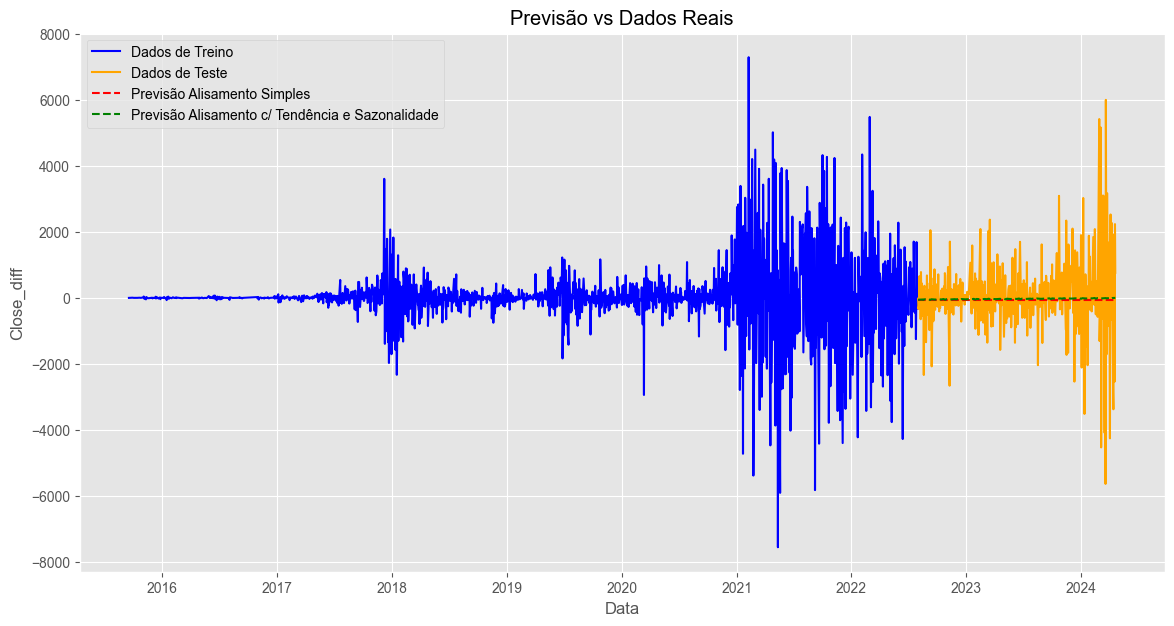

In [44]:
# Removendo qualquer linha com NaN resultante da diferenciação
bitcoin_trat_df_clean = bitcoin_trat_df.dropna()

# A variável que você quer prever
target = 'Close_diff'

# Separar os dados em conjuntos de treinamento e teste
train_size = int(len(bitcoin_trat_df_clean) * 0.8)
train_data = bitcoin_trat_df_clean.iloc[:train_size]
test_data = bitcoin_trat_df_clean.iloc[train_size:]

# Ajustar um modelo de alisamento exponencial simples ao conjunto de treinamento
model_simple_exp = SimpleExpSmoothing(train_data[target]).fit()

# Realizar previsões no conjunto de teste
predictions_simple_exp = model_simple_exp.forecast(len(test_data))

# Calcular o Erro Quadrático Médio (EQM) para o modelo de alisamento exponencial simples
mse_simple_exp = mean_squared_error(test_data[target], predictions_simple_exp)

# Calcular MAE e RMSE
mae_simple_exp = mean_absolute_error(test_data[target], predictions_simple_exp)
rmse_simple_exp = np.sqrt(mean_squared_error(test_data[target], predictions_simple_exp))

# Calculando os resíduos para o modelo de alisamento exponencial simples
residuos_simple_exp = test_data[target] - predictions_simple_exp

# Teste de Shapiro-Wilk nos resíduos do modelo de alisamento exponencial simples
shapiro_test_residuos_simple_exp = shapiro(residuos_simple_exp)

# Calculando skewness e kurtosis
skewness = stats.skew(residuos_simple_exp.dropna())
kurtosis = stats.kurtosis(residuos_simple_exp.dropna())

print("Skewness of residuals alisamento exponencial simples: ", skewness)
print("Kurtosis of residuals alisamento exponencial simples: ", kurtosis)

print(f'MSE do alisamento exponencial simples: {mse_simple_exp}')
print(f'MAE do alisamento exponencial simples: {mae_simple_exp}')
print(f'RMSE do alisamento exponencial simples: {rmse_simple_exp}')
print(f'Teste de Shapiro-Wilk para resíduos (alisamento exponencial simples): {shapiro_test_residuos_simple_exp}')




# Ajustar um modelo de alisamento exponencial considerando tendência e sazonalidade
# Dados os dados, assumimos uma tendência aditiva e sazonalidade aditiva com período sazonal de 12 (meses)
model_exp_smoothing = ExponentialSmoothing(
    train_data[target],
    trend="add",
    seasonal="add",
    seasonal_periods=24
).fit()

# Realizar previsões no conjunto de teste
predictions_exp_smoothing = model_exp_smoothing.forecast(len(test_data))

# Calcular o Erro Quadrático Médio (EQM) para o modelo de alisamento exponencial com tendência e sazonalidade
mse_exp_smoothing = mean_squared_error(test_data[target], predictions_exp_smoothing)

# Para o modelo com tendência e sazonalidade
mae_exp_smoothing = mean_absolute_error(test_data[target], predictions_exp_smoothing)
rmse_exp_smoothing = np.sqrt(mean_squared_error(test_data[target], predictions_exp_smoothing))

# Calculando os resíduos para o modelo de alisamento exponencial com tendência e sazonalidade
residuos_exp_smoothing = test_data[target] - predictions_exp_smoothing

# Teste de Shapiro-Wilk nos resíduos do modelo de alisamento exponencial com tendência e sazonalidade
shapiro_test_residuos_exp_smoothing = shapiro(residuos_exp_smoothing)

# Calculando skewness e kurtosis
skewness = stats.skew(residuos_exp_smoothing.dropna())
kurtosis = stats.kurtosis(residuos_exp_smoothing.dropna())

print("Skewness of residuals alisamento exponencial com tendência e sazonalidade: ", skewness)
print("Kurtosis of residuals alisamento exponencial com tendência e sazonalidade: ", kurtosis)

print(f'\n\nMSE do alisamento exponencial com tendência e sazonalidade: {mse_exp_smoothing}')
print(f'MAE do alisamento exponencial com tendência e sazonalidade: {mae_exp_smoothing}')
print(f'RMSE do alisamento exponencial com tendência e sazonalidade: {rmse_exp_smoothing}')
print(f'Teste de Shapiro-Wilk para resíduos (alisamento exponencial com tendência e sazonalidade): {shapiro_test_residuos_exp_smoothing}')

# Função para plotar os resultados da previsão de cada modelo
def plot_model_predictions(train_data, test_data, predictions_simple_exp, predictions_exp_smoothing, target):
    plt.figure(figsize=(14, 7))

    # Plotar os dados reais
    plt.plot(train_data.index, train_data[target], label='Dados de Treino', color='blue')
    plt.plot(test_data.index, test_data[target], label='Dados de Teste', color='orange')

    # Plotar as previsões do modelo de alisamento exponencial simples
    plt.plot(test_data.index, predictions_simple_exp, label='Previsão Alisamento Simples', color='red', linestyle='--')

    # Plotar as previsões do modelo de alisamento exponencial com tendência e sazonalidade
    plt.plot(test_data.index, predictions_exp_smoothing, label='Previsão Alisamento c/ Tendência e Sazonalidade', color='green', linestyle='--')

    plt.title('Previsão vs Dados Reais')
    plt.xlabel('Data')
    plt.ylabel(target)
    plt.legend()
    plt.show()

# Chamar a função para plotar os gráficos
plot_model_predictions(train_data, test_data, predictions_simple_exp, predictions_exp_smoothing, target)

Alisamento Exponencial Simples<br>
MSE (Mean Squared Error): O MSE de 970,481.54 é uma medida do erro quadrático médio das previsões. Quanto menor o valor, melhor o modelo se ajusta aos dados.<br>
MAE (Mean Absolute Error): Um MAE de 582.08 indica o erro médio absoluto das previsões do modelo. Essa métrica é menos sensível a outliers em comparação com o MSE, fornecendo uma visão mais balanceada do erro médio.<br>
RMSE (Root Mean Squared Error): O RMSE de 985.13 é a raiz quadrada do MSE, fornecendo uma medida do erro que está na mesma unidade da variável predita. Assim como o MSE, o RMSE é sensível a outliers.<br>
Teste de Shapiro-Wilk para Resíduos: Um valor estatístico de 0.8386 e um p-valor muito baixo sugerem que os resíduos do modelo não seguem uma distribuição normal.<br>
<br>
Alisamento Exponencial com Tendência e Sazonalidade<br>
MSE: O MSE de 960,754.67 é ligeiramente menor que o do modelo simples, sugerindo que a inclusão de tendência e sazonalidade pode oferecer um ajuste levemente melhor.<br>
MAE: O MAE de 576.97 é menor que o do modelo simples, indicando que o modelo com tendência e sazonalidade pode ter um desempenho ligeiramente melhor em termos de erro médio absoluto.<br>
RMSE: Um RMSE de 980.18, também menor do que o modelo simples, indica que a adição de componentes de tendência e sazonalidade oferece uma melhoria no ajuste do modelo.<br>
Teste de Shapiro-Wilk para Resíduos: Assim como o modelo simples, um valor estatístico de 0.8385 e um p-valor extremamente baixo apontam para a não normalidade dos resíduos no modelo com tendência e sazonalidade.<br>

### Alternativa removendo seasonal e seasonal periods

In [45]:
# Ordenar os dados pela data, para garantir a ordem temporal
bitcoin_trat_df.sort_values('Date', inplace=True)

# Removendo qualquer linha com NaN resultante da diferenciação
bitcoin_trat_df_clean = bitcoin_trat_df.dropna()

# A variável que você quer prever
target = 'Close_diff'

# Separar os dados em conjuntos de treinamento e teste
train_size = int(len(bitcoin_trat_df_clean) * 0.8)
train_data = bitcoin_trat_df_clean.iloc[:train_size]
test_data = bitcoin_trat_df_clean.iloc[train_size:]

# Ajustar um modelo de alisamento exponencial duplo considerando apenas tendência
model_exp_smoothing = ExponentialSmoothing(
    train_data[target],
    trend="add",
    seasonal=None,
    seasonal_periods=None
).fit()

# Realizar previsões no conjunto de teste
predictions_exp_smoothing = model_exp_smoothing.forecast(len(test_data))

# Calcular o Erro Quadrático Médio (EQM) para o modelo de alisamento exponencial com tendência e sazonalidade
mse_exp_smoothing = mean_squared_error(test_data[target], predictions_exp_smoothing)

# Para o modelo com tendência e sazonalidade
mae_exp_smoothing = mean_absolute_error(test_data[target], predictions_exp_smoothing)
rmse_exp_smoothing = np.sqrt(mean_squared_error(test_data[target], predictions_exp_smoothing))

# Calculando os resíduos para o modelo de alisamento exponencial com tendência e sazonalidade
residuos_exp_smoothing = test_data[target] - predictions_exp_smoothing

# Teste de Shapiro-Wilk nos resíduos do modelo de alisamento exponencial com tendência e sazonalidade
shapiro_test_residuos_exp_smoothing = shapiro(residuos_exp_smoothing)

print(f'MSE do alisamento exponencial com tendência e sazonalidade: {mse_exp_smoothing}')
print(f'MAE do alisamento exponencial com tendência e sazonalidade: {mae_exp_smoothing}')
print(f'RMSE do alisamento exponencial com tendência e sazonalidade: {rmse_exp_smoothing}')
print(f'Teste de Shapiro-Wilk para resíduos: {shapiro_test_residuos_exp_smoothing}')

MSE do alisamento exponencial com tendência e sazonalidade: 968156.0188350112
MAE do alisamento exponencial com tendência e sazonalidade: 580.686511068976
RMSE do alisamento exponencial com tendência e sazonalidade: 983.9491952509596
Teste de Shapiro-Wilk para resíduos: ShapiroResult(statistic=0.8387501239776611, pvalue=1.0215394721280885e-24)


Shapiro-Wilk: O resultado do teste permite nos dizer que os resíduos de ambos os modelos são significativamente não normais.

## Modelo ARIMA

### Primeira Versão do ARIMA (1,1,0)
Utilizando a variavel diferenciada (transformada em uma série estocástica) 

ADF Statistic: -7.037958
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Breusch-Pagan test statistic: 0.9247401757919341, p-value: 0.33623342725454186
Shapiro-Wilk Test: ShapiroResult(statistic=0.936847984790802, pvalue=1.065809294577505e-20)
Jarque-Bera Test: (787.30612588004, 1.0930674978588455e-171, 0.07437053990786598, 7.237490100631022)
Durbin-Watson statistic: 2.335371408519779
Test RMSE: 1511.7222198147285
Test MSE: 2285304.0698815705
Test MAE: 1019.6259840267202
AIC:58506.76652891048
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3501
Model:                 ARIMA(1, 1, 0)   Log Likelihood              -29251.383
Date:                Fri, 19 Apr 2024   AIC                          58506.767
Time:                        19:51:58   BIC                          58519.088
Sample:                             0   HQIC                         58511.164
    

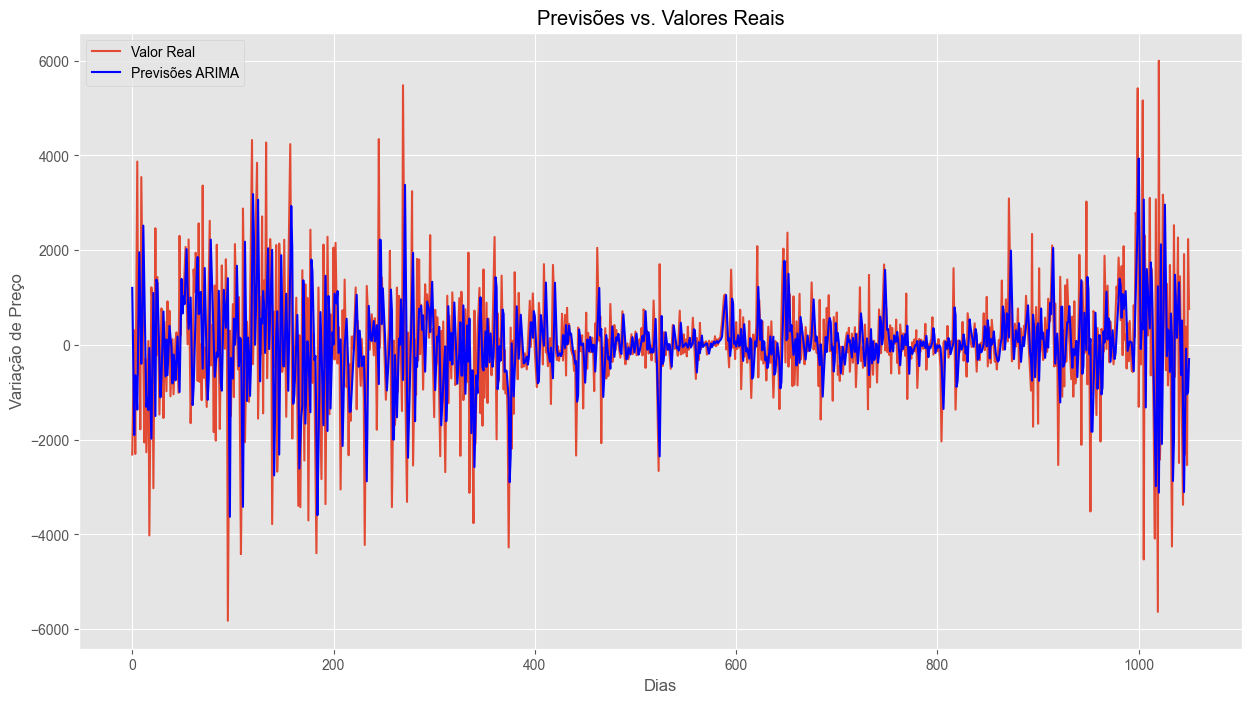

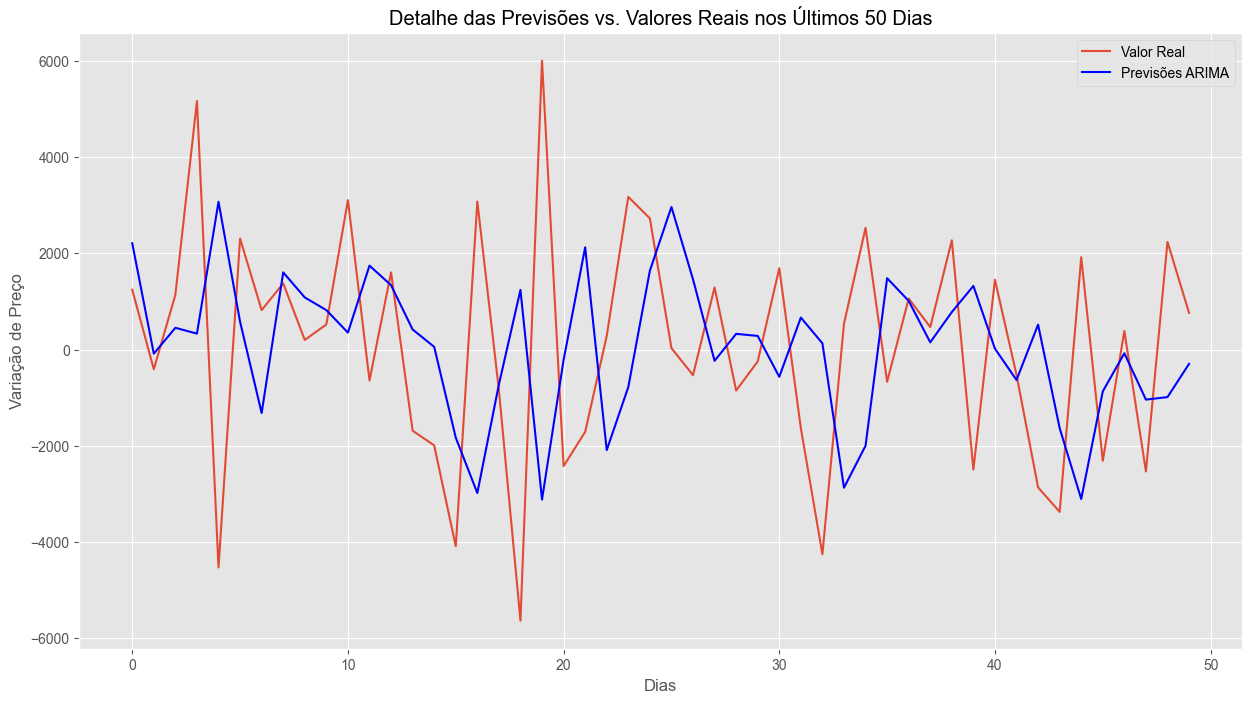

Mean of residuals: -0.2181928763921353
Variance of residuals: 2285304.0222734394


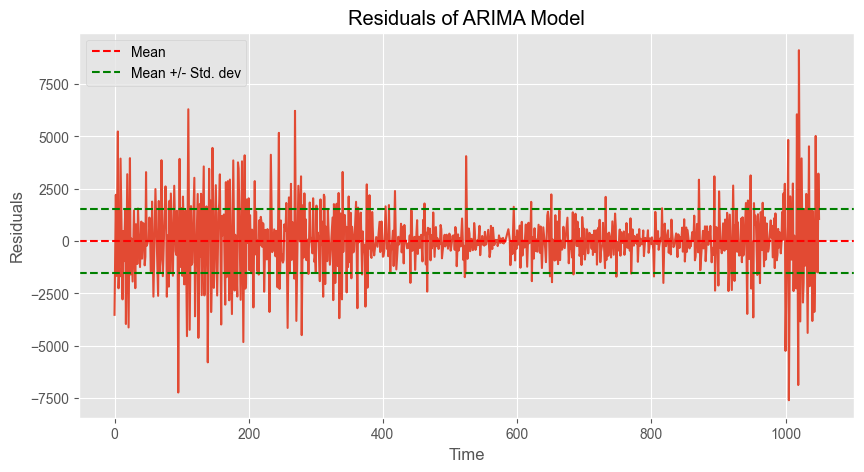

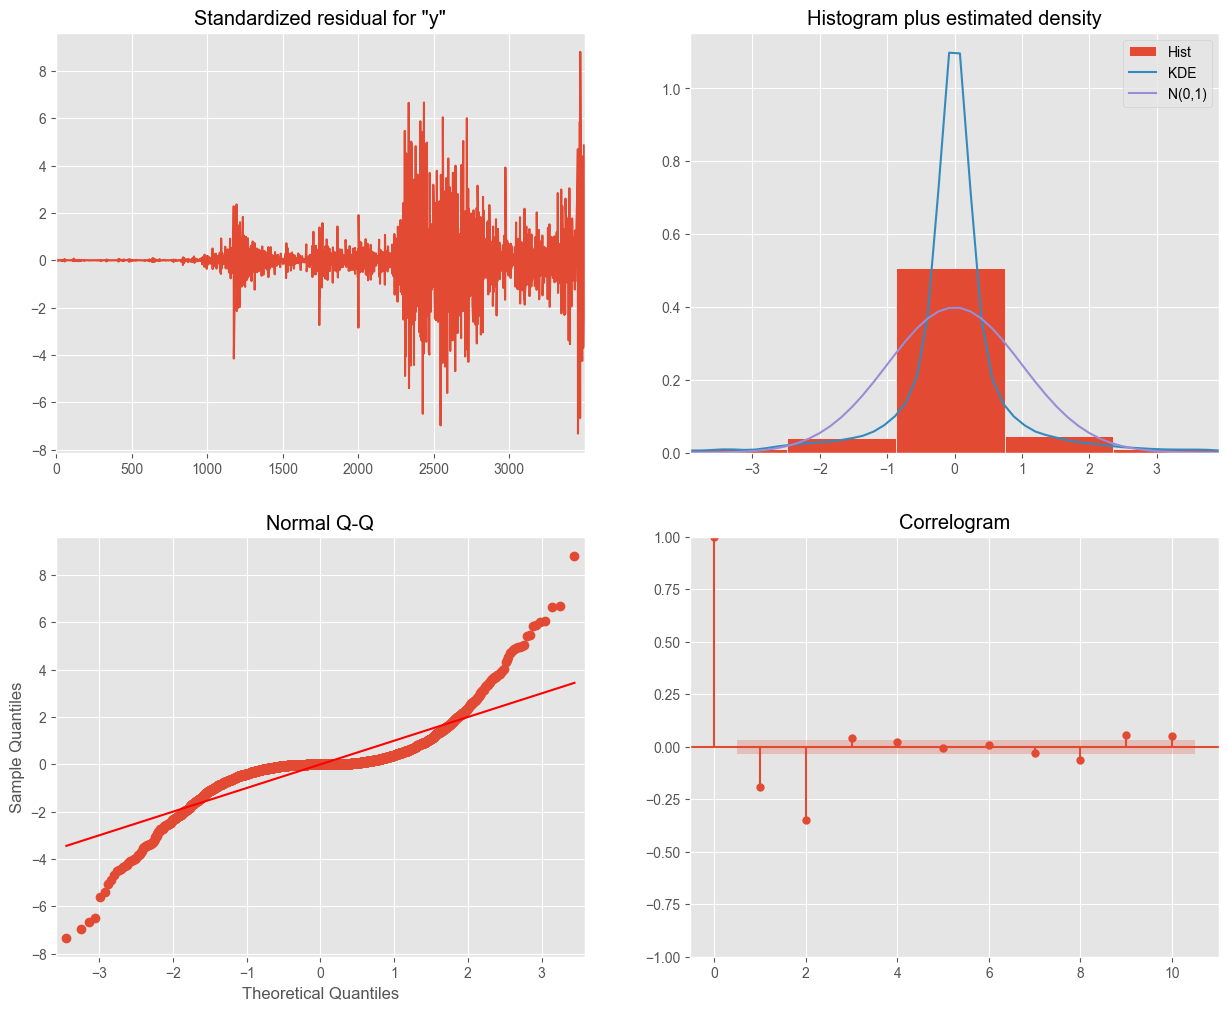

In [46]:
# Supondo que 'bitcoin_trat_df' já está carregado e contém a coluna 'Close_diff'
bitcoin_trat_df.sort_values('Date', inplace=True)
bitcoin_trat_df_clean = bitcoin_trat_df.dropna(subset=['Close_diff'])

# Seleção da variável de interesse e divisão dos dados
price = bitcoin_trat_df_clean['Close_diff'].values
size = int(len(price) * 0.7)
train, test = price[:size], price[size:]
history = list(train)

# Teste Dickey-Fuller Aumentado (ADF) para teste de random walk
result = adfuller(train)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))


# Validação passo a passo com o modelo ARIMA
predictions = []
for t in range(len(test)):
    model = ARIMA(history, order=(1,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)

# Resíduos
residuals = test - predictions

residuals_const = add_constant(residuals)

# Teste de Breusch-Pagan para heteroscedasticidade
bp_test = het_breuschpagan(residuals, residuals_const)
print(f"Breusch-Pagan test statistic: {bp_test[0]}, p-value: {bp_test[1]}")


# Avaliação das previsões
mse = mean_squared_error(test, predictions)
mae = mean_absolute_error(test, predictions)
rmse = sqrt(mse)

shapiro_test = shapiro(residuals)
jb_test = jarque_bera(residuals)
durbin_watson_stat = sm.stats.durbin_watson(residuals)

# Durbin-Watson statistic para autocorrelação
print(f"Shapiro-Wilk Test: {shapiro_test}")
print(f"Jarque-Bera Test: {jb_test}")
print(f"Durbin-Watson statistic: {durbin_watson_stat}")

print(f'Test RMSE: {rmse}')
print(f'Test MSE: {mse}')
print(f'Test MAE: {mae}')
print(f'AIC:{model_fit.aic}')
print(model_fit.summary())

# Plotando os resultados 
plt.figure(figsize=(15, 8))
plt.plot(test, label='Valor Real')
plt.plot(predictions, color='blue', label='Previsões ARIMA')

plt.xlabel('Dias')
plt.ylabel('Variação de Preço')
plt.title('Previsões vs. Valores Reais')
plt.legend()
plt.show()

# Plotar os últimos 50 dias para uma análise mais detalhada
plt.figure(figsize=(15, 8))
plt.plot(test[-50:], label='Valor Real')
plt.plot(predictions[-50:], color='blue', label='Previsões ARIMA')
plt.xlabel('Dias')
plt.ylabel('Variação de Preço')
plt.title('Detalhe das Previsões vs. Valores Reais nos Últimos 50 Dias')
plt.legend()
plt.show()

# Análise simplificada de ergodicidade verificando se a média e a variância dos resíduos são estáveis
mean_res = np.mean(residuals)
var_res = np.var(residuals)
print(f"Mean of residuals: {mean_res}")
print(f"Variance of residuals: {var_res}")

# Plot dos resíduos para visualização de estabilidade
plt.figure(figsize=(10, 5))
plt.plot(residuals)
plt.title('Residuals of ARIMA Model')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.axhline(mean_res, color='red', linestyle='--', label='Mean')
plt.axhline(mean_res + np.sqrt(var_res), color='green', linestyle='--', label='Mean +/- Std. dev')
plt.axhline(mean_res - np.sqrt(var_res), color='green', linestyle='--')
plt.legend()
plt.show()

model_fit.plot_diagnostics(figsize=(15, 12))
plt.show()

Análise do primeiro modelo ARIMA
- O teste de Breusch-Pagan não rejeita a hipótese nula de homoscedasticidade, ou seja, não há evidências suficientes para afirmar que a variância dos resíduos é inconsistente ao longo do tempo.
- O coeficiente de heteroscedasticidade (H) e seu p-valor indicam a presença de heteroscedasticidade nos resíduos. Convergindo com o teste de Breusch-Pagan
- MSE/RMSE/MAE: As métricas de erro indicam que o modelo tem um desempenho moderado, com um erro quadrático médio e desvio absoluto relativamente elevados, o que pode ser uma consequência da alta volatilidade dos preços do Bitcoin.
- O coeficiente AR(1) de -0.5312 com um p-valor de 0.000 sugere que há uma forte autocorrelação negativa na série.
- O teste Ljung-Box e o Jarque-Bera mostram p-valores significativos, indicando que há autocorrelação nos resíduos e que eles não são normalmente distribuídos.
- O gráfico Q-Q indica que os resíduos não seguem uma distribuição normal, como também evidenciado pela curtose elevada e pelo JB significativo.

### Segunda Versão do ARIMA (2,1,0)

ADF Statistic: -7.037958
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Breusch-Pagan test statistic: 0.3170429480028446, p-value: 0.5733901676446564
Shapiro-Wilk Test: ShapiroResult(statistic=0.941651463508606, pvalue=6.568913955391794e-20)
Jarque-Bera Test: (466.26183185807855, 5.656263732754204e-102, 0.040632749106068296, 6.262003825622506)
Durbin-Watson statistic: 2.149839955962848
Test RMSE: 1400.7622081060988
Test MSE: 1962134.7636582735
Test MAE: 949.8486929922699
AIC:58012.545287910296
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3501
Model:                 ARIMA(2, 1, 0)   Log Likelihood              -29003.273
Date:                Fri, 19 Apr 2024   AIC                          58012.545
Time:                        19:52:43   BIC                          58031.027
Sample:                             0   HQIC                         58019.141
  

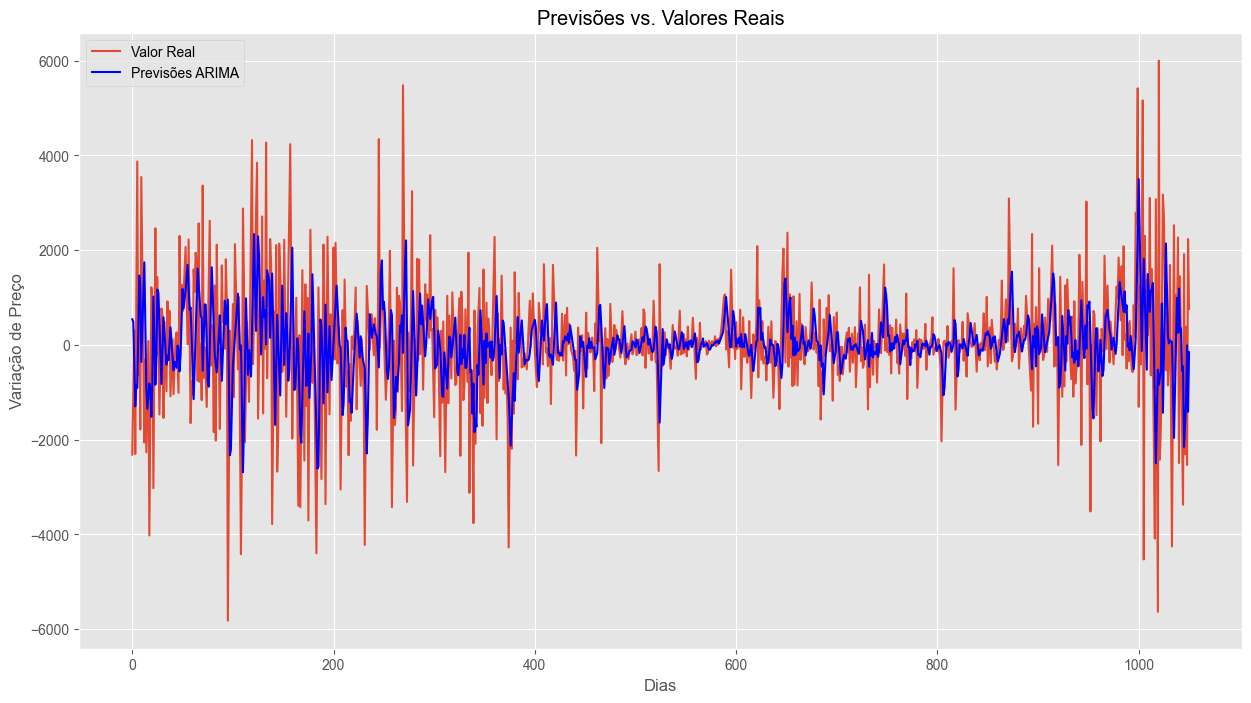

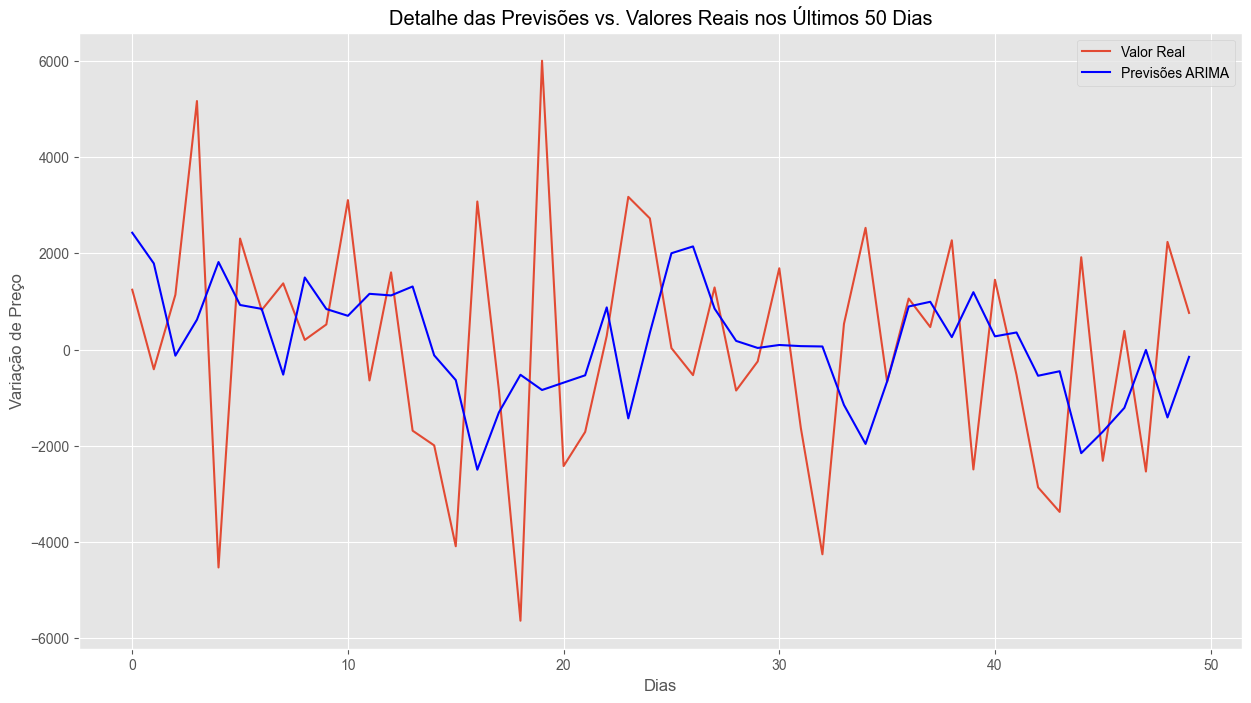

Mean of residuals: -0.5544996795714543
Variance of residuals: 1962134.4561883789


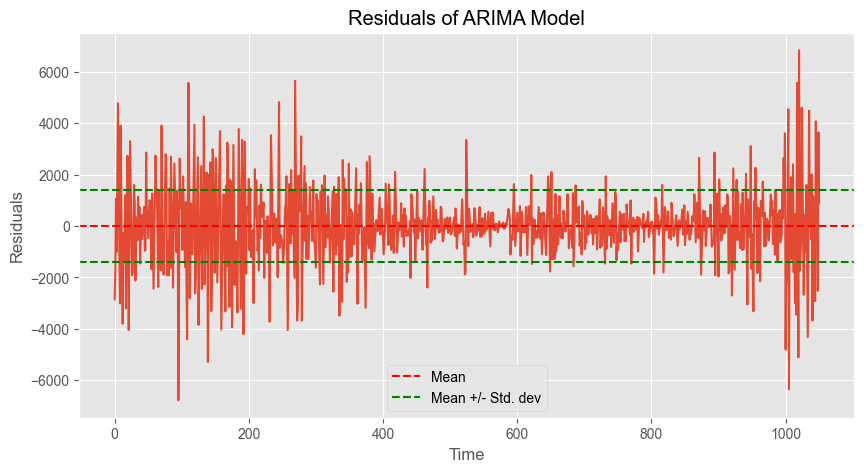

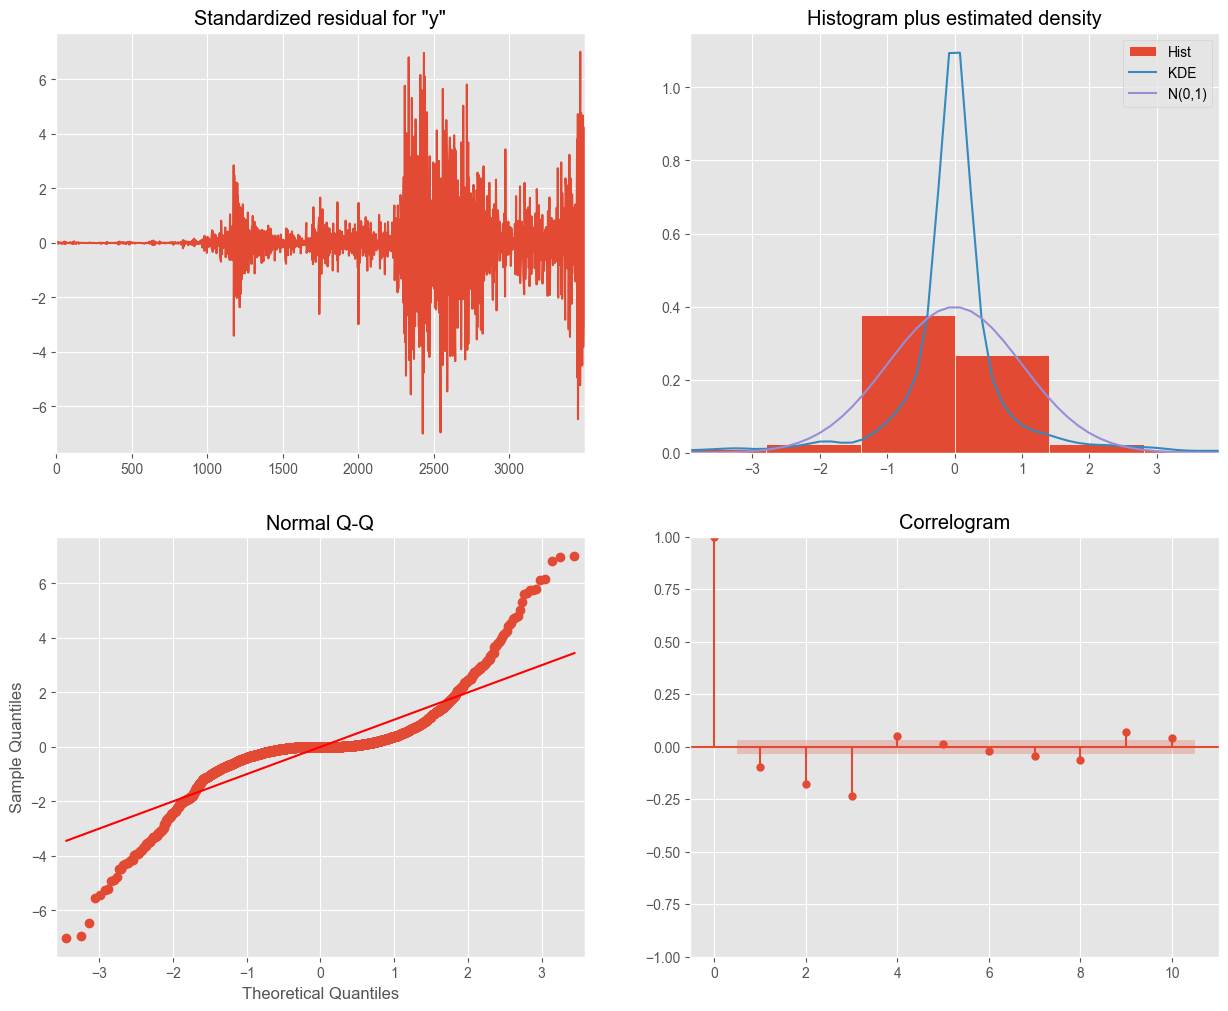

In [47]:
# Supondo que 'bitcoin_trat_df' já está carregado e contém a coluna 'Close_diff'
bitcoin_trat_df.sort_values('Date', inplace=True)
bitcoin_trat_df_clean = bitcoin_trat_df.dropna(subset=['Close_diff'])

# Seleção da variável de interesse e divisão dos dados
price = bitcoin_trat_df_clean['Close_diff'].values
size = int(len(price) * 0.7)
train, test = price[:size], price[size:]
history = list(train)  

# Teste Dickey-Fuller Aumentado (ADF) para teste de random walk
result = adfuller(train)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))


# Validação passo a passo com o modelo ARIMA
predictions = []
for t in range(len(test)):
    model = ARIMA(history, order=(2,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)

# Resíduos
residuals = test - predictions

residuals_const = add_constant(residuals)

# Teste de Breusch-Pagan para heteroscedasticidade
bp_test = het_breuschpagan(residuals, residuals_const)
print(f"Breusch-Pagan test statistic: {bp_test[0]}, p-value: {bp_test[1]}")


# Avaliação das previsões
mse = mean_squared_error(test, predictions)
mae = mean_absolute_error(test, predictions)
rmse = sqrt(mse)

shapiro_test = shapiro(residuals)
jb_test = jarque_bera(residuals)
durbin_watson_stat = sm.stats.durbin_watson(residuals)

# Durbin-Watson statistic para autocorrelação
print(f"Shapiro-Wilk Test: {shapiro_test}")
print(f"Jarque-Bera Test: {jb_test}")
print(f"Durbin-Watson statistic: {durbin_watson_stat}")
print(f'Test RMSE: {rmse}')
print(f'Test MSE: {mse}')
print(f'Test MAE: {mae}')
print(f'AIC:{model_fit.aic}')
print(model_fit.summary())

# Plotando os resultados 
plt.figure(figsize=(15, 8))
plt.plot(test, label='Valor Real')
plt.plot(predictions, color='blue', label='Previsões ARIMA')

plt.xlabel('Dias')
plt.ylabel('Variação de Preço')
plt.title('Previsões vs. Valores Reais')
plt.legend()
plt.show()

# Plotar os últimos 50 dias para uma análise mais detalhada
plt.figure(figsize=(15, 8))
plt.plot(test[-50:], label='Valor Real')
plt.plot(predictions[-50:], color='blue', label='Previsões ARIMA')
plt.xlabel('Dias')
plt.ylabel('Variação de Preço')
plt.title('Detalhe das Previsões vs. Valores Reais nos Últimos 50 Dias')
plt.legend()
plt.show()

# Análise simplificada de ergodicidade verificando se a média e a variância dos resíduos são estáveis
mean_res = np.mean(residuals)
var_res = np.var(residuals)
print(f"Mean of residuals: {mean_res}")
print(f"Variance of residuals: {var_res}")

# Plot dos resíduos para visualização de estabilidade
plt.figure(figsize=(10, 5))
plt.plot(residuals)
plt.title('Residuals of ARIMA Model')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.axhline(mean_res, color='red', linestyle='--', label='Mean')
plt.axhline(mean_res + np.sqrt(var_res), color='green', linestyle='--', label='Mean +/- Std. dev')
plt.axhline(mean_res - np.sqrt(var_res), color='green', linestyle='--')
plt.legend()
plt.show()

model_fit.plot_diagnostics(figsize=(15, 12))
plt.show()

Análise do primeiro modelo ARIMA
- Os resultados do teste de Breusch-Pagan não fornecem evidências de heteroscedasticidade nos resíduos, indicando que a variância dos erros é constante ao longo do tempo.
- O coeficiente de heteroscedasticidade (H) e seu p-valor indicam a presença de heteroscedasticidade nos resíduos. Convergindo com o teste de Breusch-Pagan
- MSE/RMSE/MAE: As métricas de erro indicam que o modelo tem um desempenho moderado, com um erro quadrático médio e desvio absoluto relativamente elevados, o que pode ser uma consequência da alta volatilidade dos preços do Bitcoin.
- O coeficiente AR(1) de -0.5312 com um p-valor de 0.000 sugere que há uma forte autocorrelação negativa na série.
- O teste Ljung-Box e o Jarque-Bera mostram p-valores significativos, indicando que há autocorrelação nos resíduos e que eles não são normalmente distribuídos.
- O gráfico Q-Q indica que os resíduos não seguem uma distribuição normal, como também evidenciado pela curtose elevada e pelo JB significativo.
- Skew: Ligeira assimetria positiva nos resíduos.
- Kurtosis: Elevada, sugerindo a presença de outliers ou uma distribuição mais pontiaguda do que a normal.
- Os coeficientes para ar.L1 e ar.L2 são significativos, indicando que a série possui uma autocorrelação significativa em dois lags anteriores.
- sigma2 representa a variância do termo de erro do modelo e é significativa.

### Terceira Versão do ARIMA (3,1,0)

ADF Statistic: -7.037958
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Breusch-Pagan test statistic: 0.6526238386743136, p-value: 0.4191761479356838
Shapiro-Wilk Test: ShapiroResult(statistic=0.9468514323234558, pvalue=5.347127607102169e-19)
Jarque-Bera Test: (506.1918372189135, 1.2073665947323755e-110, 0.05949597198563644, 6.39778330623119)
Durbin-Watson statistic: 2.0907137193083347
Test RMSE: 1342.9929228458411
Test MSE: 1803629.9908140153
Test MAE: 917.4190073152976
AIC:57749.68349043312
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3501
Model:                 ARIMA(3, 1, 0)   Log Likelihood              -28870.842
Date:                Fri, 19 Apr 2024   AIC                          57749.683
Time:                        19:53:50   BIC                          57774.326
Sample:                             0   HQIC                         57758.478
   

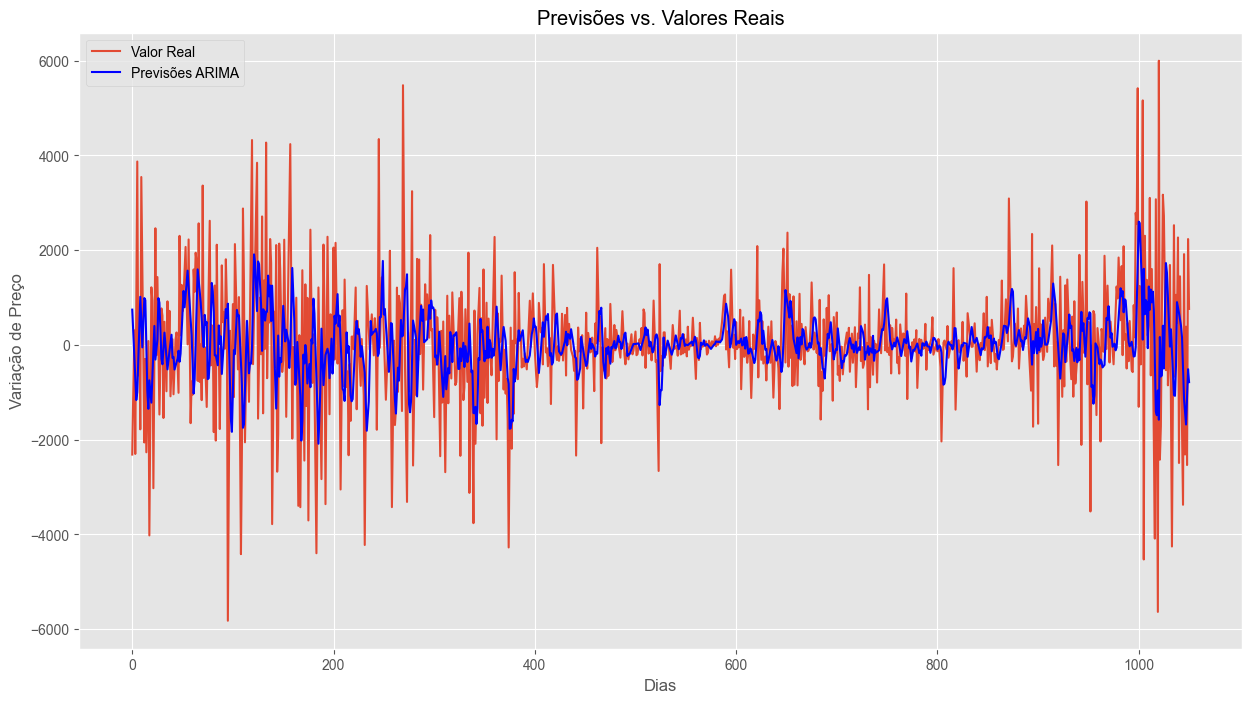

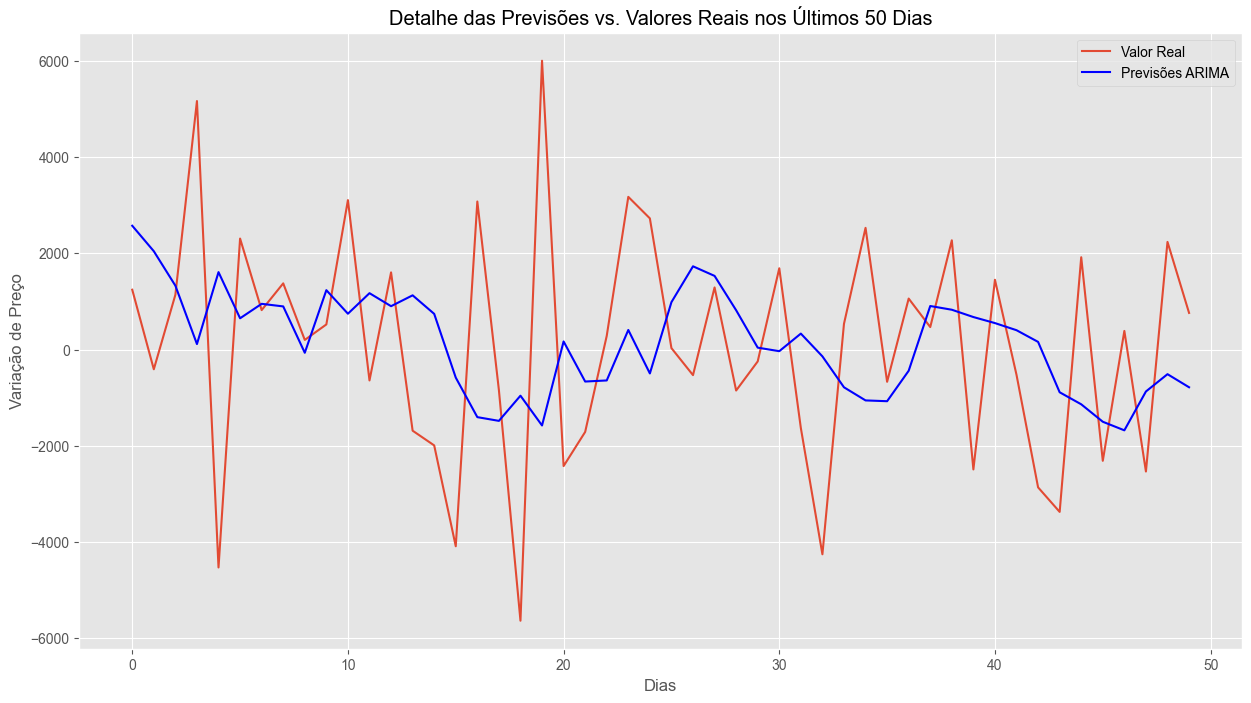

Mean of residuals: -1.0760129111240668
Variance of residuals: 1803628.8330102302


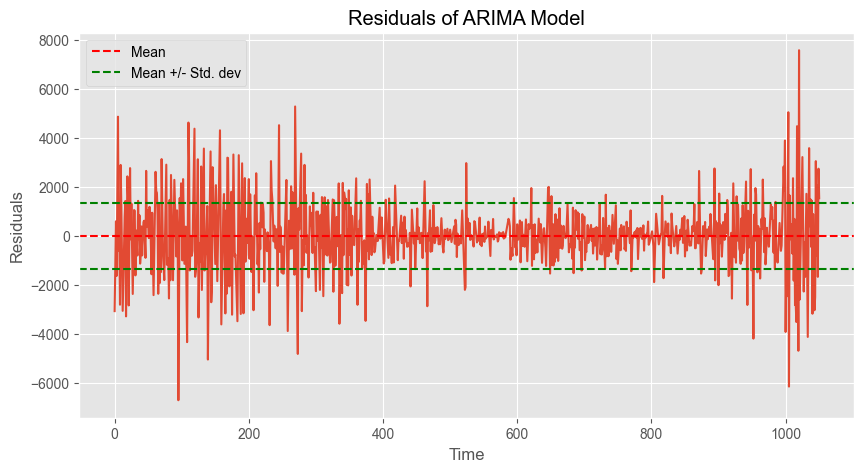

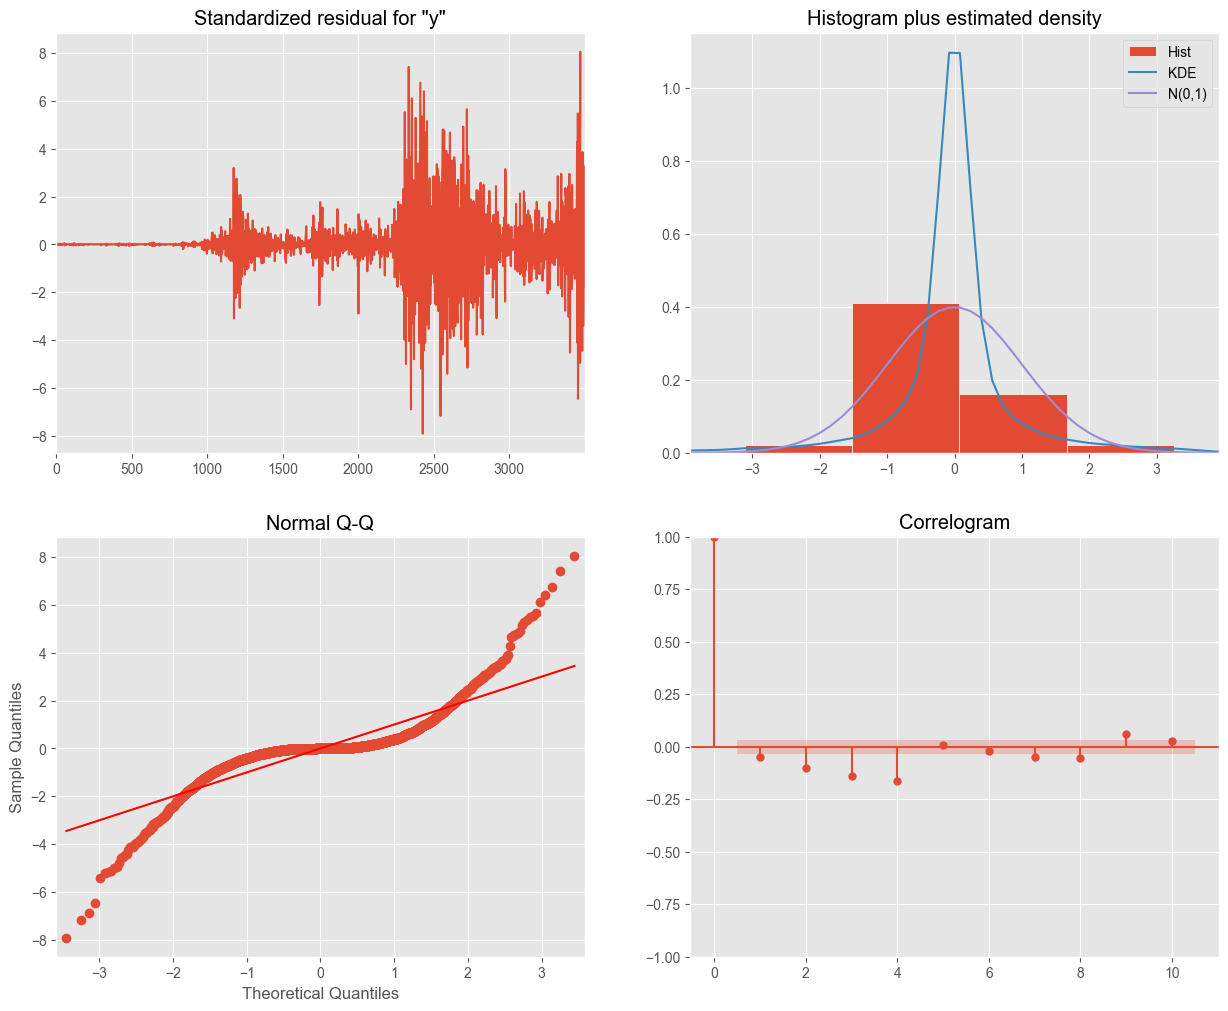

In [48]:
# Supondo que 'bitcoin_trat_df' já está carregado e contém a coluna 'Close_diff'
bitcoin_trat_df.sort_values('Date', inplace=True)
bitcoin_trat_df_clean = bitcoin_trat_df.dropna(subset=['Close_diff'])

# Seleção da variável de interesse e divisão dos dados
price = bitcoin_trat_df_clean['Close_diff'].values
size = int(len(price) * 0.7)
train, test = price[:size], price[size:]
history = list(train)  

# Teste Dickey-Fuller Aumentado (ADF) para teste de random walk
result = adfuller(train)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))


# Validação passo a passo com o modelo ARIMA
predictions = []
for t in range(len(test)):
    model = ARIMA(history, order=(3,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)

# Resíduos
residuals = test - predictions

residuals_const = add_constant(residuals)

# Teste de Breusch-Pagan para heteroscedasticidade
bp_test = het_breuschpagan(residuals, residuals_const)
print(f"Breusch-Pagan test statistic: {bp_test[0]}, p-value: {bp_test[1]}")


# Avaliação das previsões
mse = mean_squared_error(test, predictions)
mae = mean_absolute_error(test, predictions)
rmse = sqrt(mse)

shapiro_test = shapiro(residuals)
jb_test = jarque_bera(residuals)
durbin_watson_stat = sm.stats.durbin_watson(residuals)

# Durbin-Watson statistic para autocorrelação
print(f"Shapiro-Wilk Test: {shapiro_test}")
print(f"Jarque-Bera Test: {jb_test}")
print(f"Durbin-Watson statistic: {durbin_watson_stat}")

print(f'Test RMSE: {rmse}')
print(f'Test MSE: {mse}')
print(f'Test MAE: {mae}')
print(f'AIC:{model_fit.aic}')
print(model_fit.summary())

# Plotando os resultados 
plt.figure(figsize=(15, 8))
plt.plot(test, label='Valor Real')
plt.plot(predictions, color='blue', label='Previsões ARIMA')

plt.xlabel('Dias')
plt.ylabel('Variação de Preço')
plt.title('Previsões vs. Valores Reais')
plt.legend()
plt.show()

# Plotar os últimos 50 dias para uma análise mais detalhada
plt.figure(figsize=(15, 8))
plt.plot(test[-50:], label='Valor Real')
plt.plot(predictions[-50:], color='blue', label='Previsões ARIMA')
plt.xlabel('Dias')
plt.ylabel('Variação de Preço')
plt.title('Detalhe das Previsões vs. Valores Reais nos Últimos 50 Dias')
plt.legend()
plt.show()

# Análise simplificada de ergodicidade verificando se a média e a variância dos resíduos são estáveis
mean_res = np.mean(residuals)
var_res = np.var(residuals)
print(f"Mean of residuals: {mean_res}")
print(f"Variance of residuals: {var_res}")

# Plot dos resíduos para visualização de estabilidade
plt.figure(figsize=(10, 5))
plt.plot(residuals)
plt.title('Residuals of ARIMA Model')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.axhline(mean_res, color='red', linestyle='--', label='Mean')
plt.axhline(mean_res + np.sqrt(var_res), color='green', linestyle='--', label='Mean +/- Std. dev')
plt.axhline(mean_res - np.sqrt(var_res), color='green', linestyle='--')
plt.legend()
plt.show()

model_fit.plot_diagnostics(figsize=(15, 12))
plt.show()

Análise do resultado da quarta versão do modelo ARIMA
- Teste de Breusch-Pagan não indica a presença de heteroscedasticidade, sugerindo que a variância dos resíduos é constante ao longo do tempo. Entretanto o resultado do modelo contradiz o teste dizendo que a heteroscedasticidade talvez seja alta. (Primeira vez que isso acontece)
- Os coeficientes AR são significativos e indicam uma autocorrelação negativa.
- Coeficientes AR também tem significância, isso quer dizer que o modelo está capturando adequadamente a estrutura de dependência temporal na série.
- O teste Ljung-Box sugere que há autocorrelações residuais que o modelo não está capturando, especialmente no primeiro lag.
- O alto Jarque-Bera e a curtose de 15.40 indicam que os resíduos não são normalmente distribuídos, sugerindo a presença de outliers ou eventos extremos que o modelo não está capturando.
- A média e variância dos resíduos são relativamente estáveis, o que é uma propriedade desejada em séries temporais.

### Quarta Versão do ARIMA (5,1,0)

ADF Statistic: -7.037958
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Breusch-Pagan test statistic: 0.13142809364734886, p-value: 0.716955913696031
Shapiro-Wilk Test: ShapiroResult(statistic=0.9377550482749939, pvalue=1.4905528066328466e-20)
Jarque-Bera Test: (684.1159047287363, 2.79330781891636e-149, -0.02424139625485373, 6.952177404255819)
Durbin-Watson statistic: 2.0231933526830836
Test RMSE: 1308.7515849341642
Test MSE: 1712830.7110676868
Test MAE: 882.712996169429
AIC:57545.08485403181
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3501
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -28766.542
Date:                Fri, 19 Apr 2024   AIC                          57545.085
Time:                        19:55:40   BIC                          57582.048
Sample:                             0   HQIC                         57558.277
   

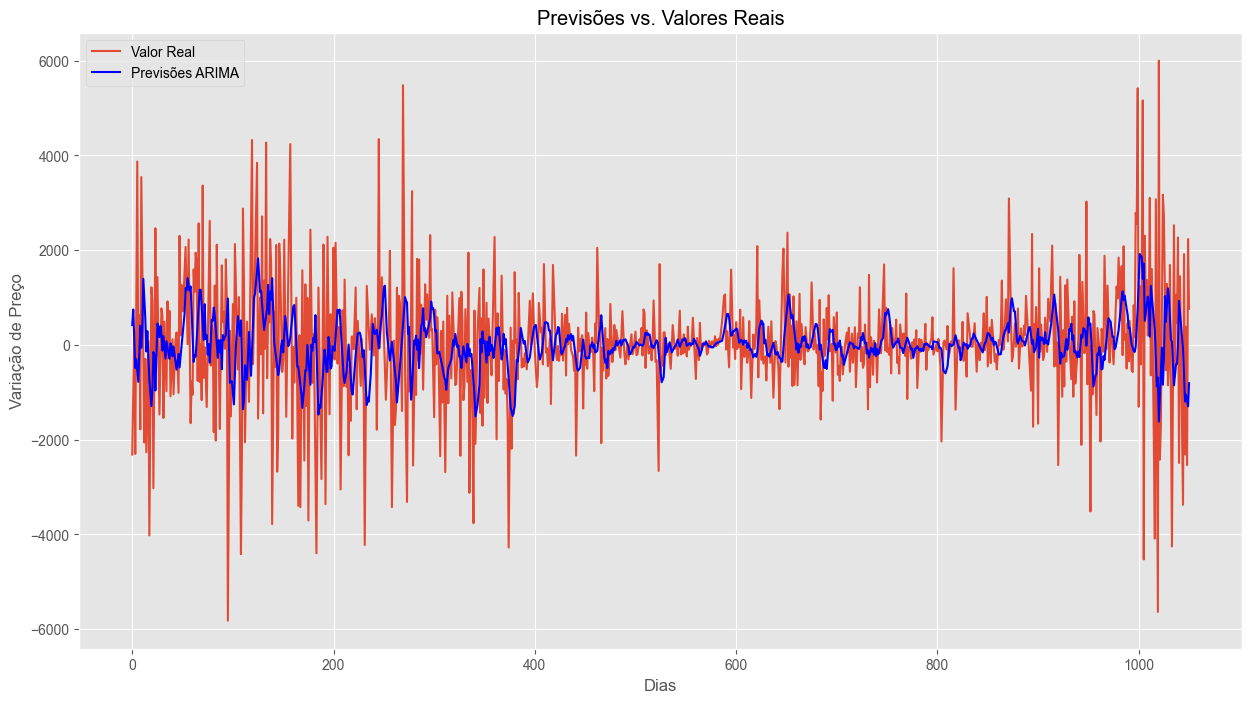

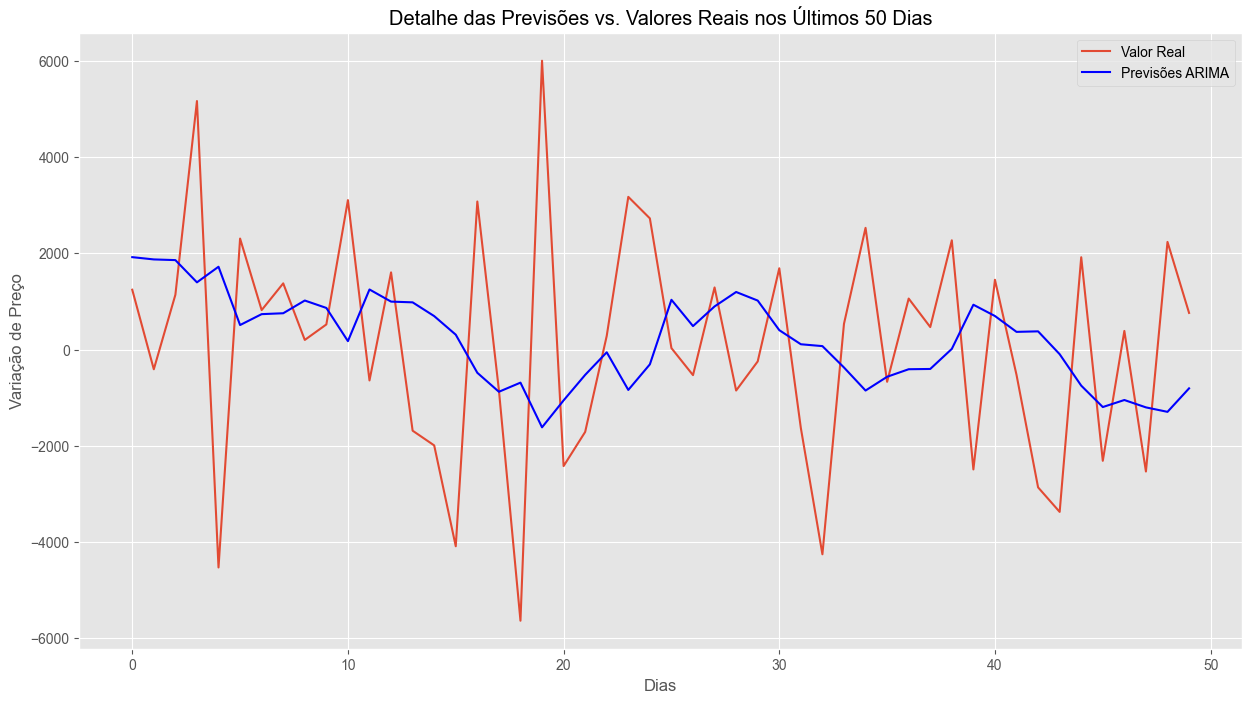

Mean of residuals: -1.9901141403382347
Variance of residuals: 1712826.7505133948


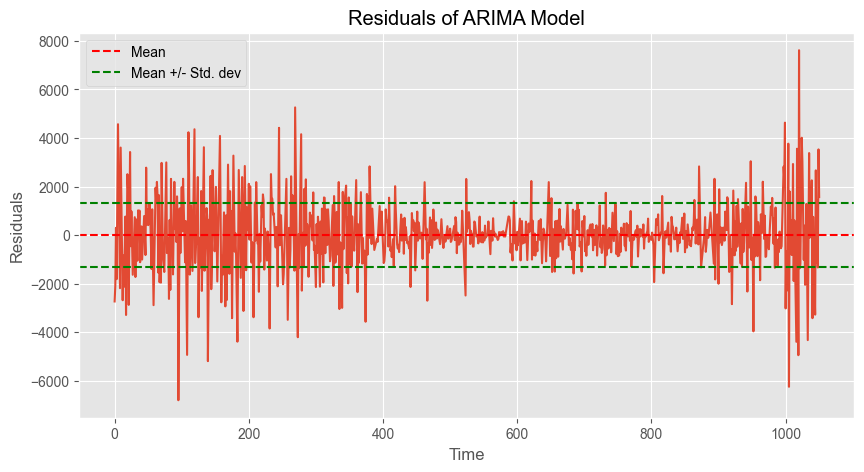

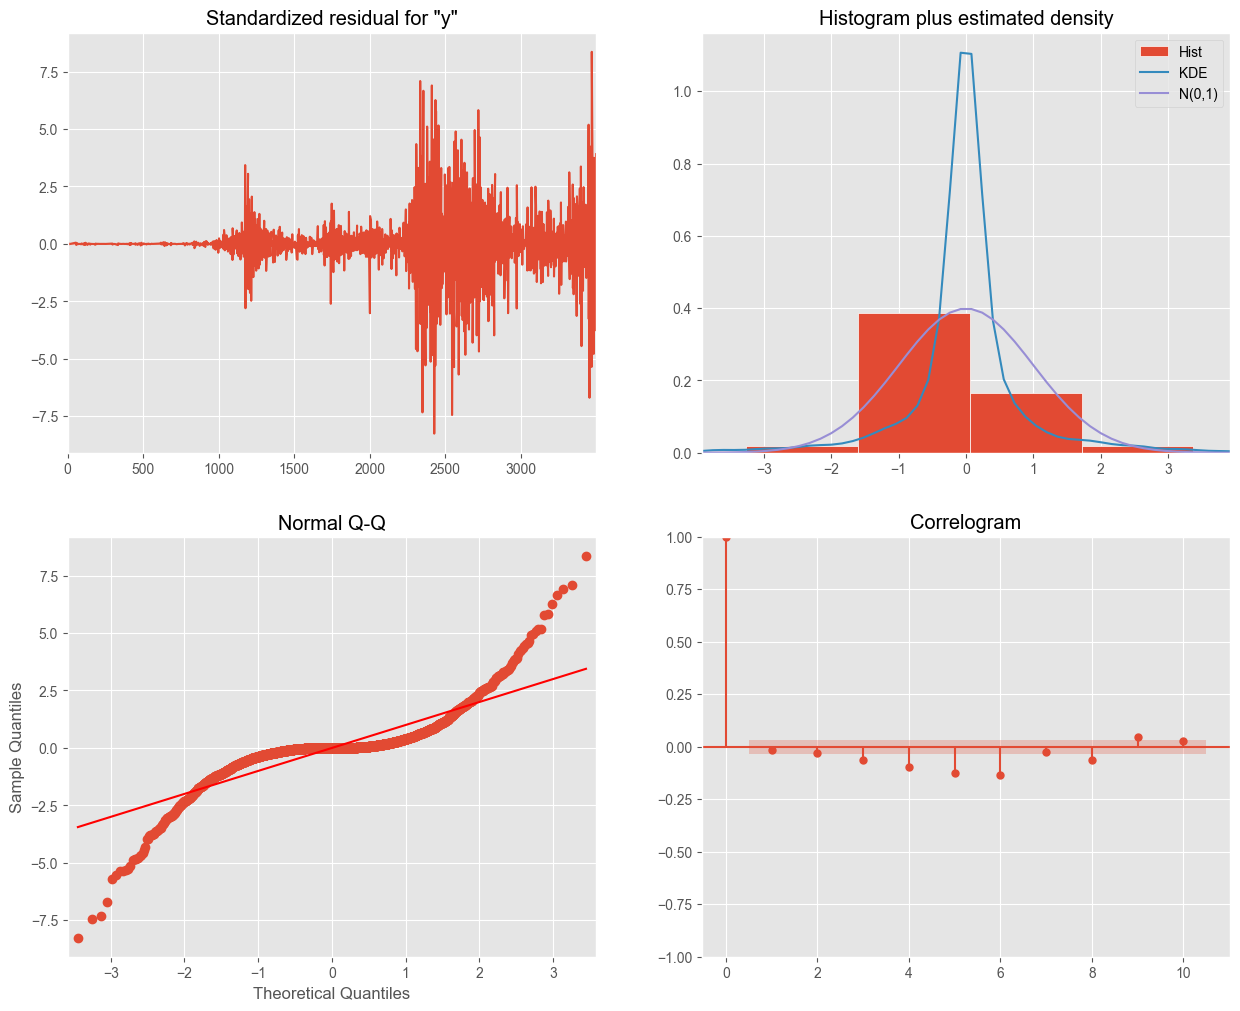

In [49]:
# Supondo que 'bitcoin_trat_df' já está carregado e contém a coluna 'Close_diff'
bitcoin_trat_df.sort_values('Date', inplace=True)
bitcoin_trat_df_clean = bitcoin_trat_df.dropna(subset=['Close_diff'])

# Seleção da variável de interesse e divisão dos dados
price = bitcoin_trat_df_clean['Close_diff'].values
size = int(len(price) * 0.7)
train, test = price[:size], price[size:]
history = list(train)  

# Teste Dickey-Fuller Aumentado (ADF) para teste de random walk
result = adfuller(train)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))


# Validação passo a passo com o modelo ARIMA
predictions = []
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)

# Resíduos
residuals = test - predictions

residuals_const = add_constant(residuals)

# Teste de Breusch-Pagan para heteroscedasticidade
bp_test = het_breuschpagan(residuals, residuals_const)
print(f"Breusch-Pagan test statistic: {bp_test[0]}, p-value: {bp_test[1]}")


# Avaliação das previsões
mse = mean_squared_error(test, predictions)
mae = mean_absolute_error(test, predictions)
rmse = sqrt(mse)

shapiro_test = shapiro(residuals)
jb_test = jarque_bera(residuals)
durbin_watson_stat = sm.stats.durbin_watson(residuals)

# Durbin-Watson statistic para autocorrelação
print(f"Shapiro-Wilk Test: {shapiro_test}")
print(f"Jarque-Bera Test: {jb_test}")
print(f"Durbin-Watson statistic: {durbin_watson_stat}")

print(f'Test RMSE: {rmse}')
print(f'Test MSE: {mse}')
print(f'Test MAE: {mae}')
print(f'AIC:{model_fit.aic}')
print(model_fit.summary())

# Plotando os resultados 
plt.figure(figsize=(15, 8))
plt.plot(test, label='Valor Real')
plt.plot(predictions, color='blue', label='Previsões ARIMA')

plt.xlabel('Dias')
plt.ylabel('Variação de Preço')
plt.title('Previsões vs. Valores Reais')
plt.legend()
plt.show()

# Plotar os últimos 50 dias para uma análise mais detalhada
plt.figure(figsize=(15, 8))
plt.plot(test[-50:], label='Valor Real')
plt.plot(predictions[-50:], color='blue', label='Previsões ARIMA')
plt.xlabel('Dias')
plt.ylabel('Variação de Preço')
plt.title('Detalhe das Previsões vs. Valores Reais nos Últimos 50 Dias')
plt.legend()
plt.show()

# Análise simplificada de ergodicidade verificando se a média e a variância dos resíduos são estáveis
mean_res = np.mean(residuals)
var_res = np.var(residuals)
print(f"Mean of residuals: {mean_res}")
print(f"Variance of residuals: {var_res}")

# Plot dos resíduos para visualização de estabilidade
plt.figure(figsize=(10, 5))
plt.plot(residuals)
plt.title('Residuals of ARIMA Model')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.axhline(mean_res, color='red', linestyle='--', label='Mean')
plt.axhline(mean_res + np.sqrt(var_res), color='green', linestyle='--', label='Mean +/- Std. dev')
plt.axhline(mean_res - np.sqrt(var_res), color='green', linestyle='--')
plt.legend()
plt.show()

model_fit.plot_diagnostics(figsize=(15, 12))
plt.show()

Análise do resultado da quarta versão do modelo ARIMA
- Teste de Breusch-Pagan  sugere que não há evidências de heteroscedasticidade nos resíduos, implicando que a variância dos erros é constante ao longo do tempo.
- Os coeficientes AR de L1 a L5 são todos significativos e negativos, o que indica que existe autocorrelação negativa, ou seja, o modelo captura a dinâmica dos retornos diferenciados.
- A variância do erro (sigma2) é significativa.
- O teste Ljung-Box tem um p-valor de 0.29 para o primeiro lag, sugerindo que não há autocorrelações significativas nos resíduos.
- Jarque-Bera e a Kurtosis elevados confirmam que os resíduos não seguem uma distribuição normal. A distribuição dos resíduos tem caudas mais pesadas do que o esperado para uma distribuição normal, o que é comum em dados financeiros.

### Auto ARIMAX

In [50]:
df = bitcoin_trat_df[['Lag_1_Open', 'Lag_1_High', 'Lag_1_Low', 'Lag_1_Volume', 'RSI', 'EMA_15', 'EMA_30', 'EMA_200', 'OBV', 
         'MA50', 'MA200', 'Lag_1_Volume', 'Lag_1_Volatility', 'Volatility_30', 'Volatility_90', 'Close_diff',
        'CCI', 'Lag_1', 'Lag_7', 'Lag_30', 'Lag_60', 'Lag_365','MonthName', 'WeekdayName', 'Quarter', 'halving_btc']]


list_dummies = ['MonthName', 'WeekdayName', 'Quarter', 'halving_btc']

diretorio = 'modelo/encoders'
# Salvando Encondings para predição do modelo
for column in list_dummies:
    enc = preprocessing.OneHotEncoder(handle_unknown='ignore')
    enc.fit(df[[column]])
    columns = df[column].unique()
    print(column.lower())

    # Salvando o encoder
    with open(os.path.join(diretorio, 'encoder_' + column.lower() + '.pkl'), 'wb') as file:
        pickle.dump(enc, file)

    # Salvando a lista de categorias
    with open(os.path.join(diretorio, 'list_' + column.lower() + '.pkl'), 'wb') as file:
        pickle.dump(columns, file)

# Transformando em dummies as variaveis categoricas
final_data = pd.DataFrame()

for column in list_dummies:
    enc_path = os.path.join(diretorio, 'encoder_' + column.lower() + '.pkl')
    encoder = load_pickle(enc_path)
    enc_df = get_one_hot_enc(feature_col=df[column], enc=encoder, column_name=column)
    final_data = pd.concat([final_data, enc_df], axis=1)

df_list = list(['Lag_1_Open', 'Lag_1_High', 'Lag_1_Low', 'Lag_1_Volume', 'RSI', 'EMA_15', 'EMA_30', 'EMA_200', 
               'OBV', 'MA50', 'MA200', 'Lag_1_Volume', 'Lag_1_Volatility', 'Volatility_30', 
               'Volatility_90','CCI', 'Lag_1', 'Lag_7', 'Lag_30', 'Lag_60', 'Lag_365', 'Close_diff'])

for i in df_list:
    final_data[f'{i}'] = bitcoin_trat_df[f'{i}'].values

# Selecionar colunas para o modelo ARIMAX
exogenous_columns = list(final_data.drop(columns = ["Close_diff"]).columns)

# Remover qualquer linha com NaN e selecionar colunas para o modelo
final_data.dropna(inplace=True)
exogenous_columns = final_data.columns.difference(['Close_diff'])

X = final_data[exogenous_columns]
y = final_data['Close_diff']

# Dividir os dados em conjuntos de treinamento e teste
train_size = int(len(y) * 0.8)
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

# Treinar o modelo ARIMA com variáveis exógenas (sem componentes sazonais)
arimax_model = auto_arima(y_train, exogenous=X_train, start_p=1, start_q=1,
                           max_p=3, max_q=3, seasonal=False, d=1, trace=True,
                           error_action='ignore', suppress_warnings=True, stepwise=True)

# Imprimir o sumário do modelo
print(arimax_model.summary())

# Realizar previsões
predictions_arimax = arimax_model.predict(n_periods=len(y_test), exogenous=X_test)
mse_arimax = mean_squared_error(y_test, predictions_arimax)
print(f'MSE do modelo ARIMAX: {mse_arimax}')

monthname
weekdayname
quarter
halving_btc
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=42846.101, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=42077.265, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=42844.101, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=41752.045, Time=0.08 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=41560.970, Time=0.10 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.85 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.70 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=41558.970, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=41750.045, Time=0.04 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=inf, Time=0.62 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=inf, Time=0.40 sec

Best model:  ARIMA(3,1,0)(0,0,0)[0]          
Total fit time: 3.566 seconds
   

A utilização do auto_arima para rodar o ARIMAX tem maix como objetivo verificar a escolha dos parametros p,q,d 

## Modelo de espaço de estados (SARIMA)

### Auto Sarima

A utilização do auto_arima para rodar o SARIMA tem mais como objetivo verificar a escolha dos parametros p,q,d e P,Q,D

In [51]:
# Ordenar os dados pela data
bitcoin_trat_df.sort_values('Date', inplace=True)
bitcoin_trat_df_clean = bitcoin_trat_df.dropna()

# Selecionar a variável de interesse
y = bitcoin_trat_df_clean['Close_diff']

# Dividir os dados em conjuntos de treinamento e teste
train_size = int(len(y) * 0.8)
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

# Utilizar auto_arima para encontrar os melhores parâmetros p, d, q e P, D, Q
model = auto_arima(y_train, start_p=0, start_q=0, max_p=3, max_q=3,
                   start_P=0, start_Q=0, max_P=1, max_Q=1,
                   seasonal=True, m=12, d=1, D=1, trace=True,
                   error_action='ignore',  
                   suppress_warnings=True, 
                   stepwise=True)

# Imprimir o sumário do melhor modelo SARIMA encontrado
print(model.summary())

# Realizar previsões
predictions_sarima = model.predict(n_periods=len(y_test))
predictions_sarima = pd.Series(predictions_sarima, index=y_test.index)

# Calcular métricas de erro
mse_sarima = mean_squared_error(y_test, predictions_sarima)
print(f'MSE do modelo SARIMA: {mse_sarima}')

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=44579.321, Time=0.09 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=42837.716, Time=1.67 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=1.22 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=43804.481, Time=0.11 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=2.08 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=inf, Time=1.44 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=43535.587, Time=0.30 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=42529.474, Time=2.32 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=43509.899, Time=0.16 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=3.49 sec
 ARIMA(2,1,0)(0,1,1)[12]             : AIC=inf, Time=2.35 sec
 ARIMA(3,1,0)(1,1,0)[12]             : AIC=42360.435, Time=2.89 sec
 ARIMA(3,1,0)(0,1,0)[12]             : AIC=43260.307, Time=0.18 sec
 ARIMA(3,1,0)(1,1,1)[12]             : AIC=inf, Time=4.59 sec
 ARIMA(3,1,0)(0,1,1)[12]             : AI

### Primeira Versão do SARIMA (Sem refit) (3, 1, 0)(1, 1, 0, 12)

In [52]:
# Ordenar os dados pela data
bitcoin_trat_df.sort_values('Date', inplace=True)
bitcoin_trat_df_clean = bitcoin_trat_df.dropna()

# Selecionar a variável de interesse
y = bitcoin_trat_df_clean['Close_diff']

# Dividir os dados em conjuntos de treinamento e teste
train_size = int(len(y) * 0.8)
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]


# Parâmetros fixos para o modelo SARIMA
order = (3, 1, 0)
seasonal_order = (1, 1, 0, 12)

# Treinar o modelo uma única vez com todo o conjunto de treinamento
model = SARIMAX(y_train,
                order=order,
                seasonal_order=seasonal_order,
                enforce_stationarity=False,
                enforce_invertibility=False)
model_fit = model.fit(disp=0)

warnings.filterwarnings("ignore")
# Realizar previsões passo a passo
predictions = []
history = list(y_train)  # Histórico inicial com o conjunto de treinamento
for t in range(len(y_test)):
    output = model_fit.forecast(steps=1)  # Previsão de 1 passo à frente
    yhat = output[0]
    predictions.append(yhat)
    obs = y_test.iloc[t]
    history.append(obs)  # Atualizar histórico com a observação real
    model_fit = model_fit.append([obs], refit=False)  # Atualizar modelo com novos dados sem retreinar, passando uma lista


residuals = y_test - predictions

# Adicionar constante aos resíduos para o teste Breusch-Pagan
residuals_const = add_constant(residuals)

# Teste de Breusch-Pagan para heteroscedasticidade
bp_test = het_breuschpagan(residuals, residuals_const)
print(f"Breusch-Pagan test statistic: {bp_test[0]}, p-value: {bp_test[1]}")

shapiro_test = shapiro(residuals)
jb_test = jarque_bera(residuals)
durbin_watson_stat = sm.stats.durbin_watson(residuals)

# Avaliação das previsões
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
rmse = sqrt(mse)

# Durbin-Watson statistic para autocorrelação
print(f"Shapiro-Wilk Test: {shapiro_test}")
print(f"Jarque-Bera Test: {jb_test}")
print(f"Durbin-Watson statistic: {durbin_watson_stat}")
print(f'Test RMSE: {rmse}')
print(f'Test MSE: {mse}')
print(f'Test MAE: {mae}')
print(f'AIC:{model_fit.aic}')
print(model_fit.summary())

Breusch-Pagan test statistic: 10.729284118283838, p-value: 0.0010545323583209013
Shapiro-Wilk Test: ShapiroResult(statistic=0.8768846988677979, pvalue=7.014490079836737e-22)
Jarque-Bera Test: (1716.8526982396518, 0.0, 0.41342360898248703, 11.05782406772514)
Durbin-Watson statistic: 2.446035235427484
Test RMSE: 1289.7615530709272
Test MSE: 1663484.8637799304
Test MAE: 830.4940809107529
AIC:52909.823320316296
                                     SARIMAX Results                                      
Dep. Variable:                         Close_diff   No. Observations:                 3138
Model:             SARIMAX(3, 1, 0)x(1, 1, 0, 12)   Log Likelihood              -26449.912
Date:                            Fri, 19 Apr 2024   AIC                          52909.823
Time:                                    19:57:43   BIC                          52940.035
Sample:                                09-17-2015   HQIC                         52920.671
                                     - 04-1

In [53]:
# Breusch-Pagan test statistic: 10.685405800798835, p-value: 0.0010798404432671666
# Test RMSE: 1289.449186814612
# Test MSE: 1662679.205376864
# Test MAE: 830.2937114342402
# AIC:52909.45309615403
#                                      SARIMAX Results                                      
# ==========================================================================================
# Dep. Variable:                         Close_diff   No. Observations:                 3138
# Model:             SARIMAX(3, 1, 0)x(1, 1, 0, 12)   Log Likelihood              -26449.727
# Date:                            Fri, 19 Apr 2024   AIC                          52909.453
# Time:                                    16:05:49   BIC                          52939.665
# Sample:                                09-17-2015   HQIC                         52920.300
#                                     - 04-19-2024                                         
# Covariance Type:                              opg                                         
# ==============================================================================
#                  coef    std err          z      P>|z|      [0.025      0.975]
# ------------------------------------------------------------------------------
# ar.L1         -0.7531      0.010    -75.104      0.000      -0.773      -0.733
# ar.L2         -0.5136      0.011    -45.346      0.000      -0.536      -0.491
# ar.L3         -0.2583      0.010    -26.380      0.000      -0.278      -0.239
# ar.S.L12      -0.5545      0.008    -73.741      0.000      -0.569      -0.540
# sigma2      1.367e+06   1.57e+04     86.912      0.000    1.34e+06     1.4e+06
# ===================================================================================
# Ljung-Box (L1) (Q):                  32.34   Jarque-Bera (JB):             12643.70
# Prob(Q):                              0.00   Prob(JB):                         0.00
# Heteroskedasticity (H):              11.60   Skew:                             0.40
# Prob(H) (two-sided):                  0.00   Kurtosis:                        12.84
# ===================================================================================

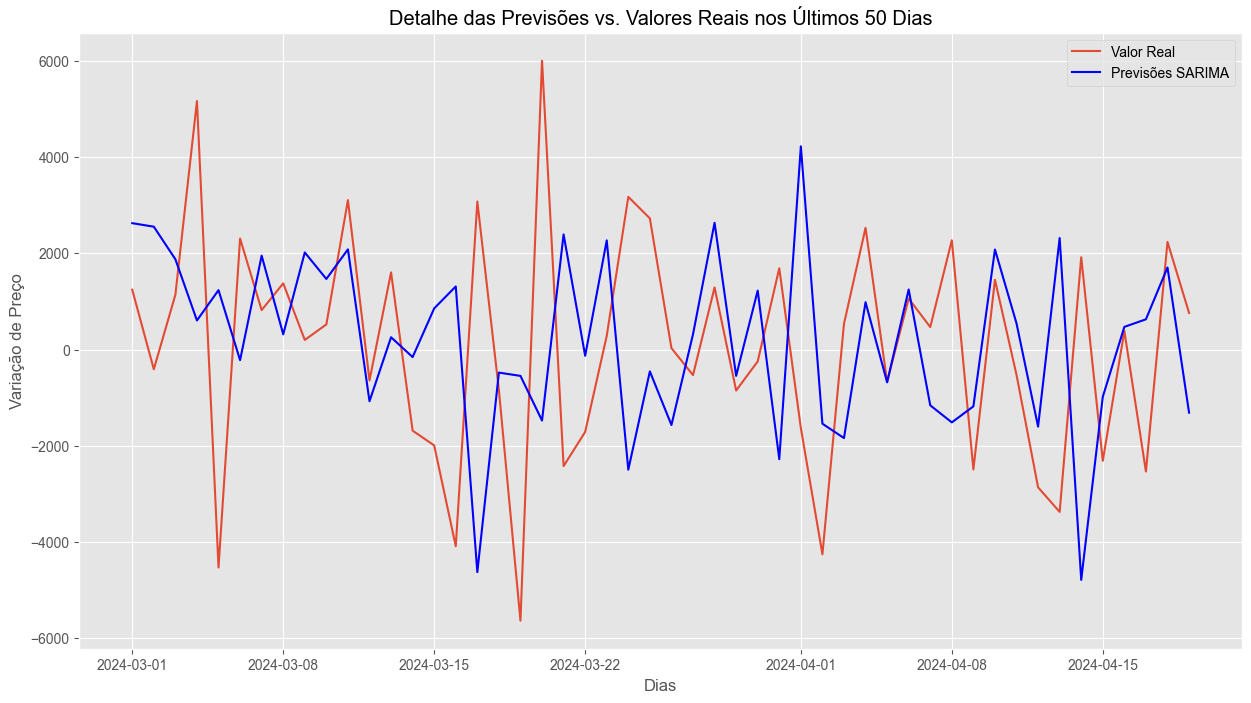

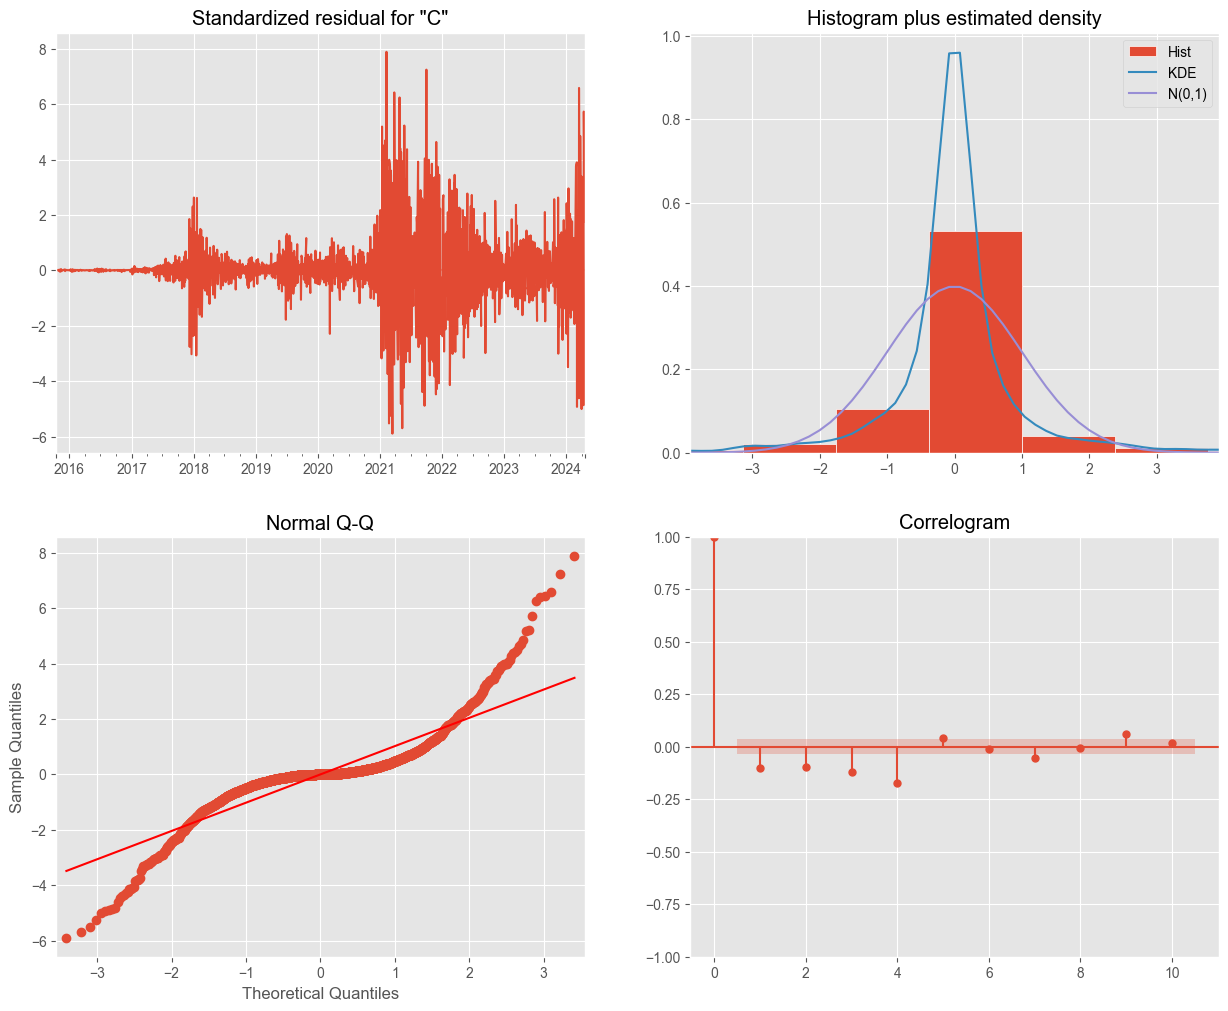

In [54]:
# Plotar os últimos 50 dias para uma análise mais detalhada
plt.figure(figsize=(15, 8))
plt.plot(y_test.index[-50:], y_test[-50:], label='Valor Real')
plt.plot(y_test.index[-50:], predictions[-50:], color='blue', label='Previsões SARIMA')
plt.xlabel('Dias')
plt.ylabel('Variação de Preço')
plt.title('Detalhe das Previsões vs. Valores Reais nos Últimos 50 Dias')
plt.legend()
plt.show()

# Diagnóstico do modelo
model_fit.plot_diagnostics(figsize=(15, 12))
plt.show()

Análise da primeira versão do modelo SARIMA
- Teste de Heteroscedasticidade (Breusch-Pagan) teve como resposta 10.6854, o que indica a presença de heteroscedasticidade nos resíduos do modelo, pois o p-valor é menor do que 0.05, sugerindo que a variância dos erros muda ao longo do tempo.
- Os coeficientes AR para L1, L2 e L3 são significativos e negativos, indicando que há uma forte correlação negativa entre os valores passados e os atuais da série.
- O coeficiente sazonal AR.S.L12 também é significativo e negativo, capturando a sazonalidade na série de tempo.
- A variância do erro (sigma2) é significativa e grande, refletindo a variabilidade dos erros do modelo.
- O teste Ljung-Box tem um p-valor de quase zero, sugerindo que há autocorrelações significativas nos resíduos do modelo(o que não é ideal).
- Jarque-Bera (JB) e Kurtosis elevados confirmam que os resíduos não seguem uma distribuição normal e que há uma concentração alta de valores extremos (caudas pesadas).

### Segunda versão do SARIMA (Com refit)

Breusch-Pagan test statistic: 10.729284118283838, p-value: 0.0010545323583209013
Shapiro-Wilk Test: ShapiroResult(statistic=0.8768846988677979, pvalue=7.014490079836737e-22)
Jarque-Bera Test: (1716.8526982396518, 0.0, 0.41342360898248703, 11.05782406772514)
Durbin-Watson statistic: 2.446035235427484
Test RMSE: 1288.5886391764911
Test MSE: 1660460.681014721
Test MAE: 830.1916200261691
AIC:52901.99643674581
                                     SARIMAX Results                                      
Dep. Variable:                         Close_diff   No. Observations:                 3138
Model:             SARIMAX(3, 1, 0)x(1, 1, 0, 12)   Log Likelihood              -26445.998
Date:                            Fri, 19 Apr 2024   AIC                          52901.996
Time:                                    20:05:33   BIC                          52932.208
Sample:                                09-17-2015   HQIC                         52912.844
                                     - 04-19-

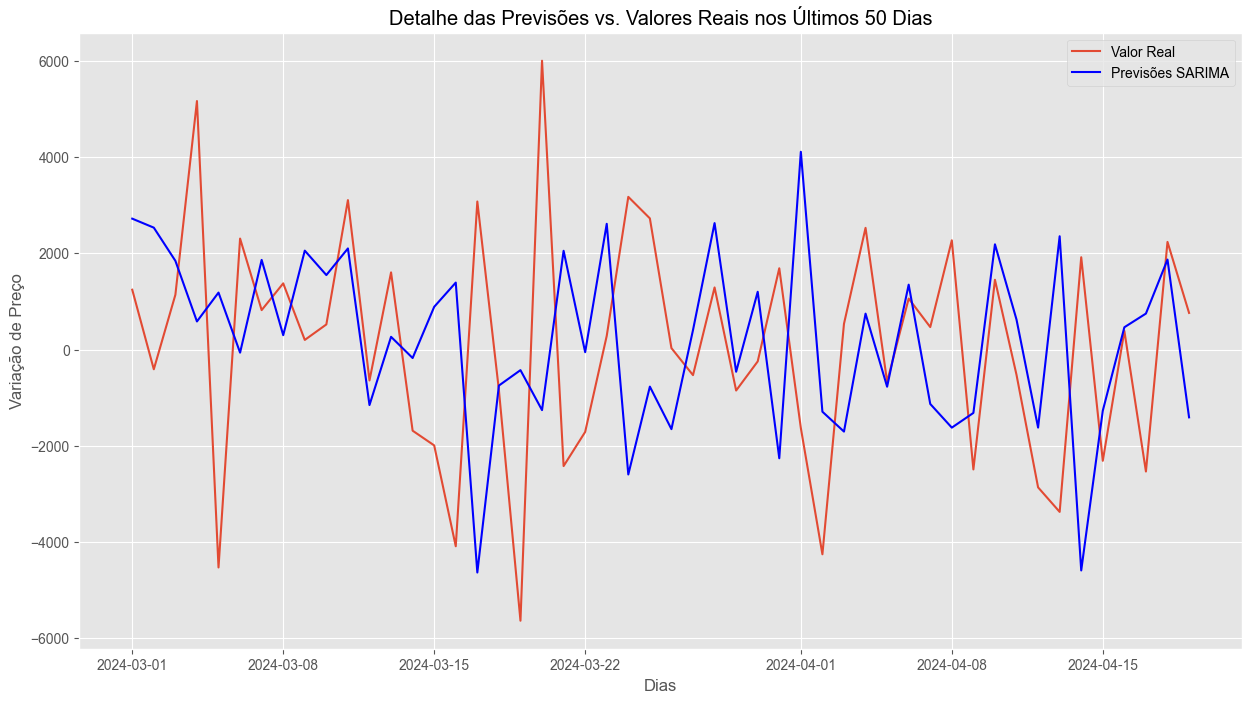

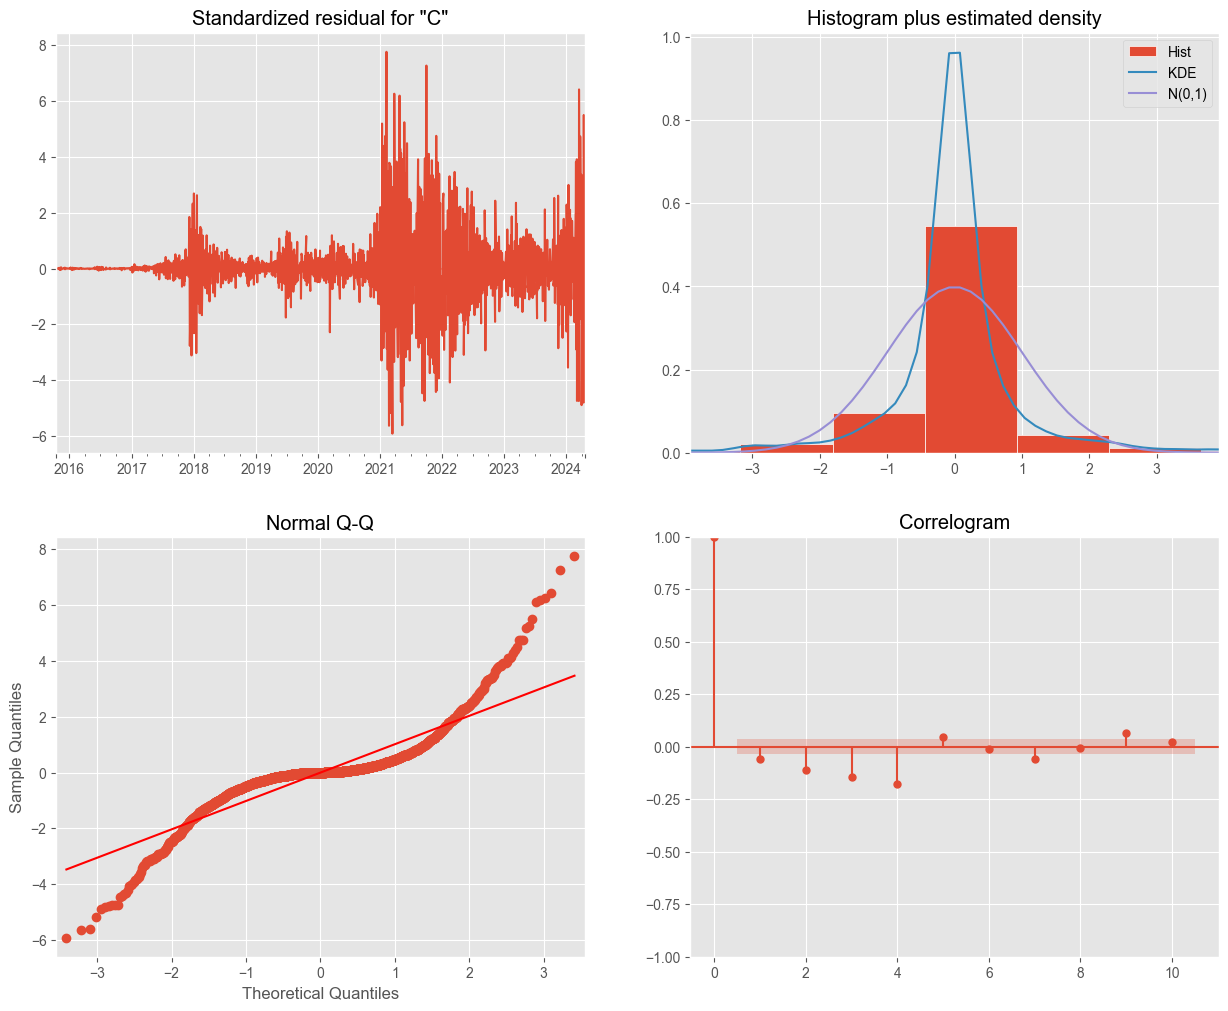

In [55]:
# Ordenar os dados pela data
bitcoin_trat_df.sort_values('Date', inplace=True)
bitcoin_trat_df_clean = bitcoin_trat_df.dropna()

# Selecionar a variável de interesse
y = bitcoin_trat_df_clean['Close_diff']

# Dividir os dados em conjuntos de treinamento e teste
train_size = int(len(y) * 0.8)
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]


# Parâmetros fixos para o modelo SARIMA
order = (3, 1, 0)
seasonal_order = (1, 1, 0, 12)

# Treinar o modelo uma única vez com todo o conjunto de treinamento
model = SARIMAX(y_train,
                order=order,
                seasonal_order=seasonal_order,
                enforce_stationarity=False,
                enforce_invertibility=False)
model_fit = model.fit(disp=0)

warnings.filterwarnings("ignore")
# Realizar previsões passo a passo
predictions = []
history = list(y_train)  # Histórico inicial com o conjunto de treinamento
for t in range(len(y_test)):
    output = model_fit.forecast(steps=1)  # Previsão de 1 passo à frente
    yhat = output[0]
    predictions.append(yhat)
    obs = y_test.iloc[t]
    history.append(obs)  # Atualizar histórico com a observação real
    model_fit = model_fit.append([obs], refit=True)  # Atualizar modelo com novos dados sem retreinar, passando uma lista

# Adicionar constante aos resíduos para o teste Breusch-Pagan
residuals_const = add_constant(residuals)

# Teste de Breusch-Pagan para heteroscedasticidade
bp_test = het_breuschpagan(residuals, residuals_const)
print(f"Breusch-Pagan test statistic: {bp_test[0]}, p-value: {bp_test[1]}")

# Avaliação das previsões
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
rmse = sqrt(mse)

shapiro_test = shapiro(residuals)
jb_test = jarque_bera(residuals)
durbin_watson_stat = sm.stats.durbin_watson(residuals)

# Durbin-Watson statistic para autocorrelação
print(f"Shapiro-Wilk Test: {shapiro_test}")
print(f"Jarque-Bera Test: {jb_test}")
print(f"Durbin-Watson statistic: {durbin_watson_stat}")

print(f'Test RMSE: {rmse}')
print(f'Test MSE: {mse}')
print(f'Test MAE: {mae}')
print(f'AIC:{model_fit.aic}')
print(model_fit.summary())

# Plotar os últimos 50 dias para uma análise mais detalhada
plt.figure(figsize=(15, 8))
plt.plot(y_test.index[-50:], y_test[-50:], label='Valor Real')
plt.plot(y_test.index[-50:], predictions[-50:], color='blue', label='Previsões SARIMA')
plt.xlabel('Dias')
plt.ylabel('Variação de Preço')
plt.title('Detalhe das Previsões vs. Valores Reais nos Últimos 50 Dias')
plt.legend()
plt.show()

# Diagnóstico do modelo
model_fit.plot_diagnostics(figsize=(15, 12))
plt.show()

Análise da segunda versão do modelo SARIMA
- Teste de Heteroscedasticidade (Breusch-Pagan) teve como resposta 10.6854, o que indica a presença de heteroscedasticidade nos resíduos do modelo, pois o p-valor é menor do que 0.05, sugerindo que a variância dos erros muda ao longo do tempo.
- Os coeficientes AR para L1, L2 e L3 são significativos e negativos, indicando que há uma forte correlação negativa entre os valores passados e os atuais da série.
- O coeficiente sazonal AR.S.L12 também é significativo e negativo, capturando a sazonalidade na série de tempo.
- A variância do erro (sigma2) é significativa e grande, refletindo a variabilidade dos erros do modelo.
- O teste Ljung-Box tem um p-valor de quase zero, sugerindo que há autocorrelações significativas nos resíduos do modelo(o que não é ideal).
- Jarque-Bera (JB) e Kurtosis elevados confirmam que os resíduos não seguem uma distribuição normal e que há uma concentração alta de valores extremos (caudas pesadas).

### Auto SARIMAX

In [56]:
df = bitcoin_trat_df[['Lag_1_Open', 'Lag_1_High', 'Lag_1_Low', 'Lag_1_Volume', 'RSI', 'EMA_15', 'EMA_30', 'EMA_200', 'OBV', 
         'MA50', 'MA200', 'Lag_1_Volume', 'Lag_1_Volatility', 'Volatility_30', 'Volatility_90', 'Close_diff',
        'CCI', 'Lag_1', 'Lag_7', 'Lag_30', 'Lag_60', 'Lag_365','MonthName', 'WeekdayName', 'Quarter', 'halving_btc']]


list_dummies = ['MonthName', 'WeekdayName', 'Quarter', 'halving_btc']

diretorio = 'modelo/encoders'
# Salvando Encondings para predição do modelo
for column in list_dummies:
    enc = preprocessing.OneHotEncoder(handle_unknown='ignore')
    enc.fit(df[[column]])
    columns = df[column].unique()
    print(column.lower())

    # Salvando o encoder
    with open(os.path.join(diretorio, 'encoder_' + column.lower() + '.pkl'), 'wb') as file:
        pickle.dump(enc, file)

    # Salvando a lista de categorias
    with open(os.path.join(diretorio, 'list_' + column.lower() + '.pkl'), 'wb') as file:
        pickle.dump(columns, file)

# Transformando em dummies as variaveis categoricas
final_data = pd.DataFrame()

for column in list_dummies:
    enc_path = os.path.join(diretorio, 'encoder_' + column.lower() + '.pkl')
    encoder = load_pickle(enc_path)
    enc_df = get_one_hot_enc(feature_col=df[column], enc=encoder, column_name=column)
    final_data = pd.concat([final_data, enc_df], axis=1)

df_list = list(['Lag_1_Open', 'Lag_1_High', 'Lag_1_Low', 'Lag_1_Volume', 'RSI', 'EMA_15', 'EMA_30', 'EMA_200', 
               'OBV', 'MA50', 'MA200', 'Lag_1_Volume', 'Lag_1_Volatility', 'Volatility_30', 
               'Volatility_90','CCI', 'Lag_1', 'Lag_7', 'Lag_30', 'Lag_60', 'Lag_365', 'Close_diff'])

for i in df_list:
    final_data[f'{i}'] = bitcoin_trat_df[f'{i}'].values

# Selecionar colunas para o modelo ARIMAX
exogenous_columns = list(final_data.drop(columns = ["Close_diff"]).columns)

# Remover qualquer linha com NaN e selecionar colunas para o modelo
final_data.dropna(inplace=True)
exogenous_columns = final_data.columns.difference(['Close_diff'])

X = final_data[exogenous_columns]
y = final_data['Close_diff']

# Dividir os dados em conjuntos de treinamento e teste
train_size = int(len(y) * 0.8)
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

# Treinar o modelo SARIMA com variáveis exógenas
sarimax_model = auto_arima(y_train, exogenous=X_train, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12, seasonal=True, d=1, D=1, trace=True,
                           error_action='ignore', suppress_warnings=True, stepwise=True)

# Imprimir o sumário do modelo
print(sarimax_model.summary())

# Realizar previsões
predictions_sarimax = sarimax_model.predict(n_periods=len(y_test), exogenous=X_test)
mse_sarimax = mean_squared_error(y_test, predictions_sarimax)
print(f'MSE do modelo SARIMAX: {mse_sarimax}')

monthname
weekdayname
quarter
halving_btc
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=inf, Time=5.13 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=44579.321, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=42837.716, Time=1.65 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=1.21 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=43804.481, Time=0.11 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=42620.009, Time=5.64 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=8.88 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=2.13 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=43361.035, Time=2.04 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=42324.209, Time=7.84 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=42529.474, Time=2.40 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=12.14 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=3.83 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=42139.862, Time=8.55 se

## Modelo XGboost

As primeiras versões do modelo incluindo variavais de Lag 1 estava dando overffiting. Ainda é necessário testar outras composições de variáveis para evitar vies do modelo. 

In [57]:
df = bitcoin_trat_df[['Lag_1_Open', 'Lag_1_High', 'Lag_1_Low', 'Lag_1_Volume', 'RSI', 'EMA_15', 'EMA_30', 'EMA_200', 'OBV', 
         'MA50', 'MA200', 'Lag_1_Volume', 'Lag_1_Volatility', 'Volatility_30', 'Volatility_90', 'Close',
        'CCI',  'Lag_7', 'Lag_30', 'Lag_60', 'Lag_365','MonthName', 'WeekdayName', 'Quarter', 'halving_btc']]


list_dummies = ['MonthName', 'WeekdayName', 'Quarter', 'halving_btc']

if not os.path.exists('modelo/encoders'):
    os.makedirs('modelo/encoders')

diretorio = 'modelo/encoders'
# Salvando Encondings para predição do modelo
for column in list_dummies:
    enc = preprocessing.OneHotEncoder(handle_unknown='ignore')
    enc.fit(df[[column]])
    columns = df[column].unique()
    print(column.lower())

    # Salvando o encoder
    with open(os.path.join(diretorio, 'encoder_' + column.lower() + '.pkl'), 'wb') as file:
        pickle.dump(enc, file)

    # Salvando a lista de categorias
    with open(os.path.join(diretorio, 'list_' + column.lower() + '.pkl'), 'wb') as file:
        pickle.dump(columns, file)

# Transformando em dummies as variaveis categoricas
final_data = pd.DataFrame()

for column in list_dummies:
    enc_path = os.path.join(diretorio, 'encoder_' + column.lower() + '.pkl')
    encoder = load_pickle(enc_path)
    enc_df = get_one_hot_enc(feature_col=df[column], enc=encoder, column_name=column)
    final_data = pd.concat([final_data, enc_df], axis=1)

df_list = list(['RSI', 
               'Volatility_30', 
               'Volatility_90','CCI', 'Close'])

for i in df_list:
    final_data[f'{i}'] = bitcoin_trat_df[f'{i}'].values

# Selecionar colunas para o modelo ARIMAX
exogenous_columns = list(final_data.drop(columns = ["Close"]).columns)

# Remover qualquer linha com NaN
final_data = final_data.dropna()

# Seleção das features(variaveis) preditoras
dt_ax = final_data.drop(columns = ["Close"])

# Seleção da variavel a ser predita a probabilidade
dt_ay = final_data[['Close']].copy()

#normalização dos dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(dt_ax)
X_scaled_df = pd.DataFrame(X_scaled, columns=dt_ax.columns)

# Segmentação em Treino (75%) e Teste (25%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, dt_ay, random_state=13, test_size=0.25)

# Executando a otimização
trials = Trials()
best_hyperparams = fmin(fn=hipertuning, 
                        space=space, 
                        algo=tpe.suggest, 
                        max_evals=5, 
                        trials=trials)

# Obtendo os melhores hiperparâmetros
best_hyperparams = space_eval(space, best_hyperparams)
print("Melhores hiperparâmetros:", best_hyperparams)

# Melhores Parametros
print("Melhor min_child_weight:", best_hyperparams['min_child_weight'])
print("Melhor Max_Depth:", best_hyperparams['max_depth'])
print("Melhor gamma:", best_hyperparams['gamma'])
print("Melhor reg_lambda:", best_hyperparams['reg_lambda'])
print("Melhor reg_alpha:", best_hyperparams['reg_alpha'])
print("Melhor colsample_bytree:", best_hyperparams['colsample_bytree'])

monthname
weekdayname
quarter
halving_btc
Média MSE:                                                                                                             
82266388.02507463                                                                                                      
Média MSE:                                                                                                             
61814495.4441426                                                                                                       
Média MSE:                                                                                                             
57346360.227368094                                                                                                     
Média MSE:                                                                                                             
71316342.78026275                                                                                                     

R-squared:  0.8408626961317505
Shapiro-Wilk Test Statistic (residuals) 0.709613561630249, p-value: 5.752760226526106e-36
Valores do Teste de Breusch-Pagan: {'LM Statistic': 90.4937636583011, 'LM-Test p-value': 5.526526755724981e-08, 'F-Statistic': 4.277168095276888, 'F-Test p-value': 1.4259671328005716e-10}
Skewness of residuals:  1.3511662464352094
Kurtosis of residuals:  21.47234643525365
Durbin-Watson:  2.0130483106115356
Shapiro-Wilk Test: ShapiroResult(statistic=0.709613561630249, pvalue=5.752760226526106e-36)
Jarque-Bera Test: (16665.961668178657, 0.0, 1.3511662464352094, 24.47234643525365)
AIC: 9534.124736157395
MSE: 47670324.940829724
MAE: 3432.416467247858
RMSE: 6904.369988697717


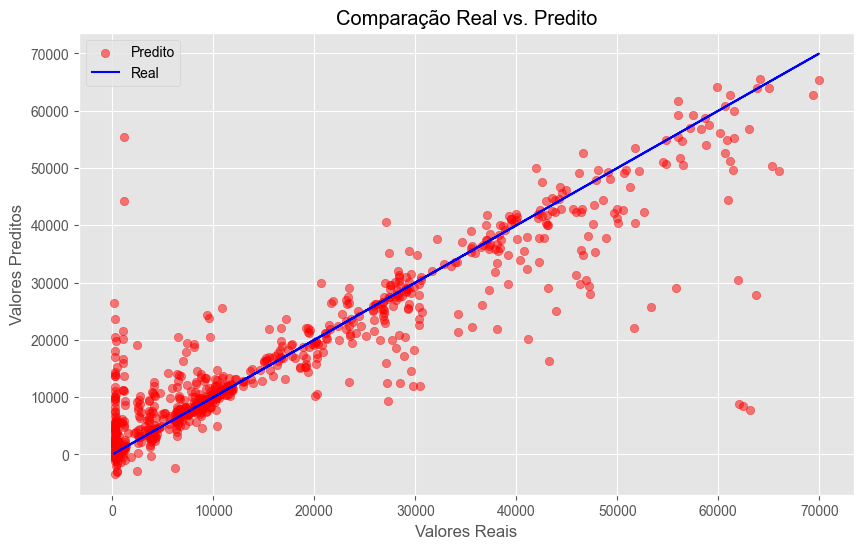

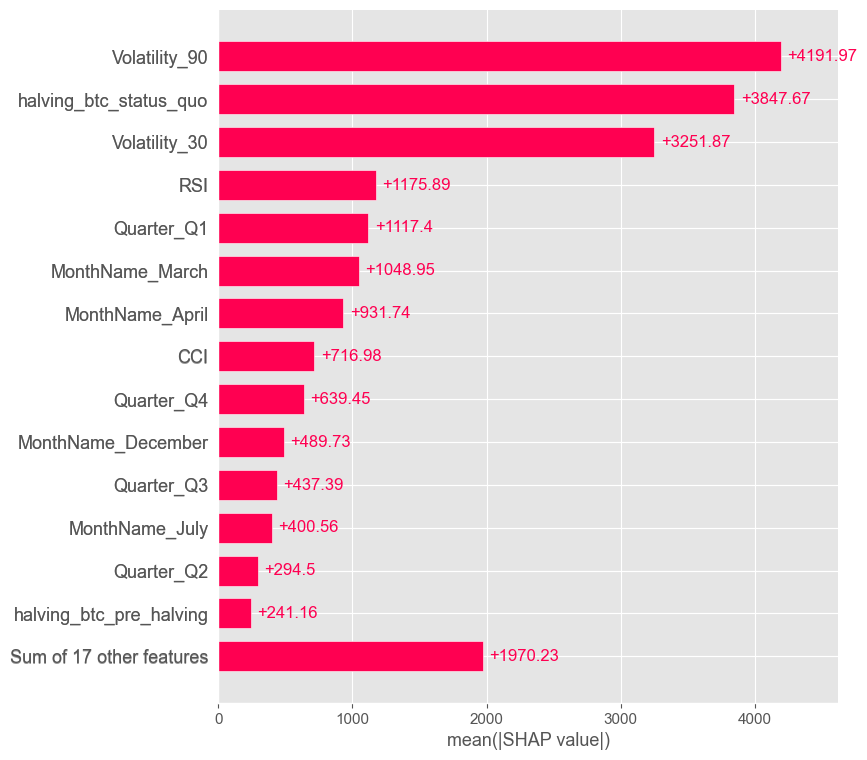

In [58]:
# Modelo com os melhores hiperparâmetros
model_temporal = xgb.XGBRegressor(
    max_depth=int(best_hyperparams['max_depth']), 
    reg_lambda=best_hyperparams['reg_lambda'], 
    reg_alpha=best_hyperparams['reg_alpha'], 
    gamma=best_hyperparams['gamma'], 
    min_child_weight=int(best_hyperparams['min_child_weight']),
    colsample_bytree=best_hyperparams['colsample_bytree'], 
    random_state=0,  
    seed=0)

# Treino do modelo utilizando dados do SMOTE 
modelo = model_temporal.fit(X_train, y_train)

# Previsões
y_pred = modelo.predict(X_test)

# Calculando MSE, MAE e RMSE
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Raiz quadrada do MSE para obter o RMSE

n = len(y_test)  # Número de observações
k = modelo.get_booster().num_boosted_rounds()  # Número de árvores usadas no modelo

# Preparando os resíduos
y_pred_series = pd.Series(y_pred, index=y_test.index)
residuals = y_test['Close'] - y_pred_series

r_squared = r2_score(y_test, y_pred)
print("R-squared: ", r_squared)

# Realizando o teste de Shapiro-Wilk
shapiro_test = shapiro(residuals)
print(f"Shapiro-Wilk Test Statistic (residuals) {shapiro_test.statistic}, p-value: {shapiro_test.pvalue}")

# Certifique-se de que y_pred é uma série Pandas com o mesmo índice que y_test
y_pred_series = pd.Series(y_pred, index=y_test.index)

# Calculando os resíduos
residuals = y_test['Close'] - y_pred_series

# Primeiro, adicione uma constante aos preditores se ainda não tiver feito isso
X_test_const = add_constant(X_test)

#Teste de Variância Reescalonada
# Realizando o teste de Breusch-Pagan nos resíduos e X_test com constante
bp_test = het_breuschpagan(residuals, X_test_const)
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print('Valores do Teste de Breusch-Pagan:',dict(zip(labels, bp_test)))

# Calculando skewness e kurtosis
skewness = stats.skew(residuals.dropna())
kurtosis = stats.kurtosis(residuals.dropna())

print("Skewness of residuals: ", skewness)
print("Kurtosis of residuals: ", kurtosis)

# Cálculo do teste Durbin-Watson
dw = durbin_watson(residuals)
print("Durbin-Watson: ", dw)

shapiro_test = shapiro(residuals)
jb_test = jarque_bera(residuals)


# Durbin-Watson statistic para autocorrelação
print(f"Shapiro-Wilk Test: {shapiro_test}")
print(f"Jarque-Bera Test: {jb_test}")

aic = n * np.log(mse / n) + 2 * k
print(f"AIC: {aic}")

print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")

# Plotar valores reais vs preditos
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='red', label='Predito')
plt.plot(y_test, y_test, color='blue', label='Real')  # Linha perfeita
plt.title('Comparação Real vs. Predito')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.legend()
plt.grid(True)
plt.show()

#Shap
explainer = shap.Explainer(modelo)
shap_values = explainer(X_test)
shap_importance = shap_values.abs.mean(0).values
sorted_idx = shap_importance.argsort()
shap.plots.bar(shap_values, max_display=15)

## Prophet

In [59]:
bitcoin_trat_df_proft = bitcoin_trat_df.reset_index()
bitcoin_trat_df_proft = bitcoin_trat_df_proft[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})

# Initialize and fit the Prophet model
model = Prophet(daily_seasonality=True)
model.fit(bitcoin_trat_df_proft)

# Criar um DataFrame futuro para previsões
future = model.make_future_dataframe(periods=30)  # Adicionar 365 dias para previsão

# Usar o modelo para fazer previsões
forecast = model.predict(future)

20:07:36 - cmdstanpy - INFO - Chain [1] start processing
20:07:38 - cmdstanpy - INFO - Chain [1] done processing


R-squared: 0.9000296435883306
Valores do Teste de Breusch-Pagan: {'LM Statistic': 928.5191713099813, 'LM-Test p-value': 6.197291549879851e-204, 'F-Statistic': 1262.6800644735551, 'F-Test p-value': 1.939044300981376e-236}
Jarque-Bera Test: (1038.0716580732428, 3.851266210346421e-226, -0.8251719283498922, 5.094868663210858)
Durbin-Watson: 0.02238237592903183
Shapiro-Wilk Test: ShapiroResult(statistic=0.9471399188041687, pvalue=9.559113632402111e-34)
Skewness: -0.8251719283498922
Kurtosis: 2.0948686632108577
MSE: 31100421.228328522
MAE: 3977.5012025281508
RMSE: 5576.775163867423
AIC: 9169.391821360507


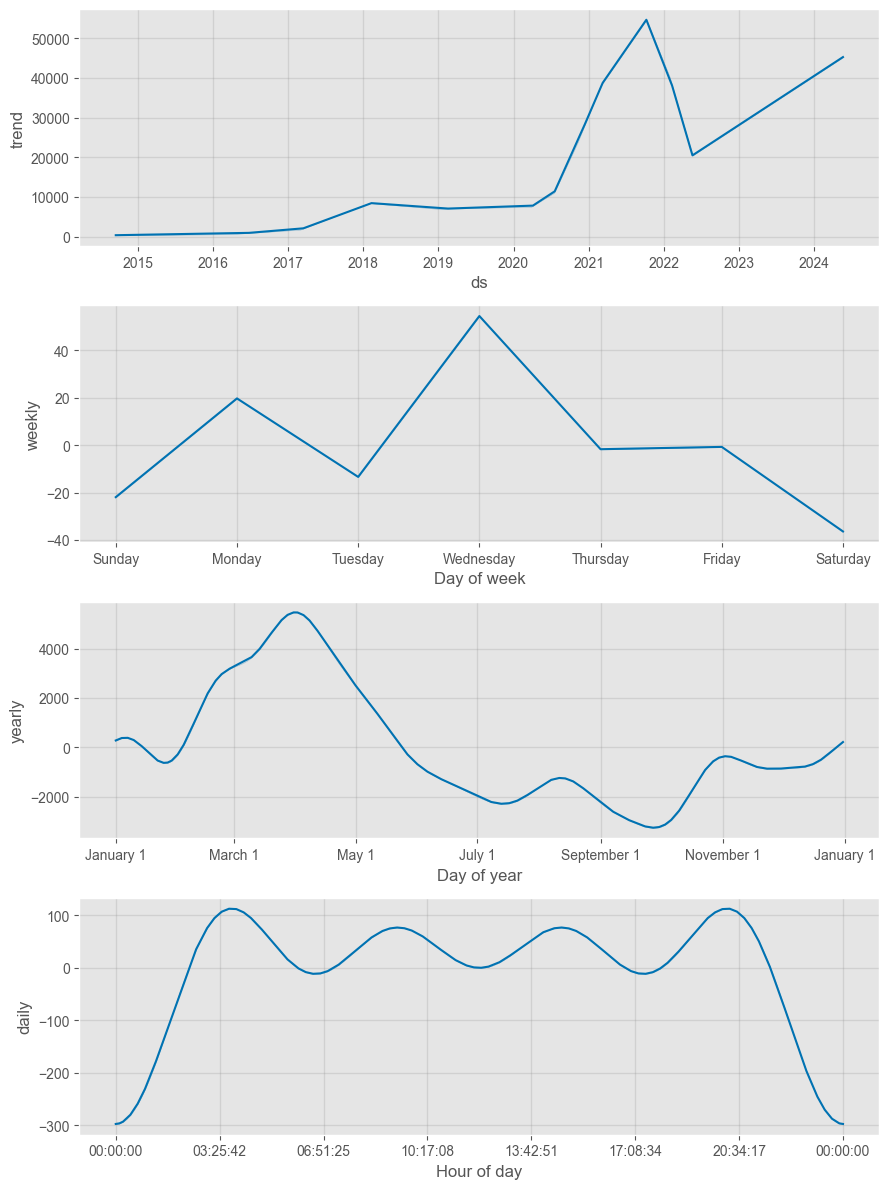

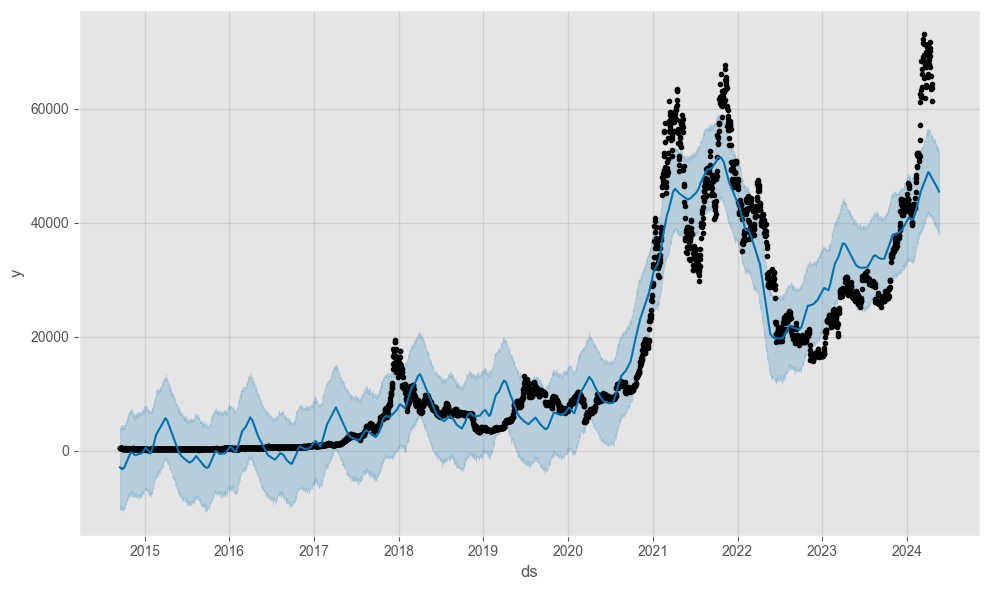

In [60]:
# Criar um DataFrame futuro para previsões e fazer previsões
future = model.make_future_dataframe(periods=30)  # Adicionar 30 dias para previsão
forecast = model.predict(future)

# Juntar os dados originais com as previsões para os mesmos períodos
forecast_filtered = forecast[['ds', 'yhat']][:len(bitcoin_trat_df_proft)]
residuals = forecast_filtered['yhat'] - bitcoin_trat_df_proft['y']

# R-squared
r_squared = np.corrcoef(bitcoin_trat_df_proft['y'], forecast_filtered['yhat'])[0, 1]**2

# Shapiro-Wilk Test
shapiro_test = stats.shapiro(residuals.dropna())

# Skewness and Kurtosis
skewness = stats.skew(residuals.dropna())
kurtosis = stats.kurtosis(residuals.dropna())

# MSE, MAE, RMSE
mse = mean_squared_error(bitcoin_trat_df_proft['y'], forecast_filtered['yhat'])
mae = mean_absolute_error(bitcoin_trat_df_proft['y'], forecast_filtered['yhat'])
rmse = np.sqrt(mse)

print(f"R-squared: {r_squared}")

# Adicionar uma constante ao DataFrame para o teste Breusch-Pagan
exog = sm.add_constant(forecast_filtered['yhat'])

bp_test = het_breuschpagan(residuals, exog)
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print('Valores do Teste de Breusch-Pagan:',dict(zip(labels, bp_test)))

# Skewness and Kurtosis
skewness = stats.skew(residuals)
kurtosis = stats.kurtosis(residuals)

jb_test = jarque_bera(residuals)

print(f"Jarque-Bera Test: {jb_test}")

# Durbin-Watson Test
dw_test = sm.stats.stattools.durbin_watson(residuals)
print(f"Durbin-Watson: {dw_test}")

# Print results
print(f"Shapiro-Wilk Test: {shapiro_test}")
print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")

aic = n * np.log(mse / n) + 2 * k
print(f"AIC: {aic}")

# Visualizar os componentes do modelo
model.plot_components(forecast)
plt.show()
model.plot(forecast)
plt.show()

## GARCH (Underfitting)

In [61]:
# https://www.kaggle.com/code/hassanoukhouya/bitcoin-modeling-and-forecasting-with-the-garch#Make-forecast-with-GARCH-models
# https://github.com/liberadori/Time-Series-Analysis-Homework/blob/master/time_series_analysis.ipynb

MSE: 3.1784450164773886e+30
MAE: 488860254871282.75
RMSE: 1782819400970661.5
Jarque-Bera Test: (17041.03600118541, 0.0, -4.5881676896955605, 25.361998132415376)
Durbin-Watson: 0.0013906125615269496
Shapiro-Wilk Test: ShapiroResult(statistic=0.3195306658744812, pvalue=8.407790785948902e-45)
Skewness: -4.5881676896955605
Kurtosis: 22.361998132415376
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                5334.29
Distribution:                  Normal   AIC:                          -10660.6
Method:            Maximum Likelihood   BIC:                          -10636.8
                                        No. Observations:                 2800
Date:                Fri, Apr 19 2024   Df Residuals:                     2799
Time:             

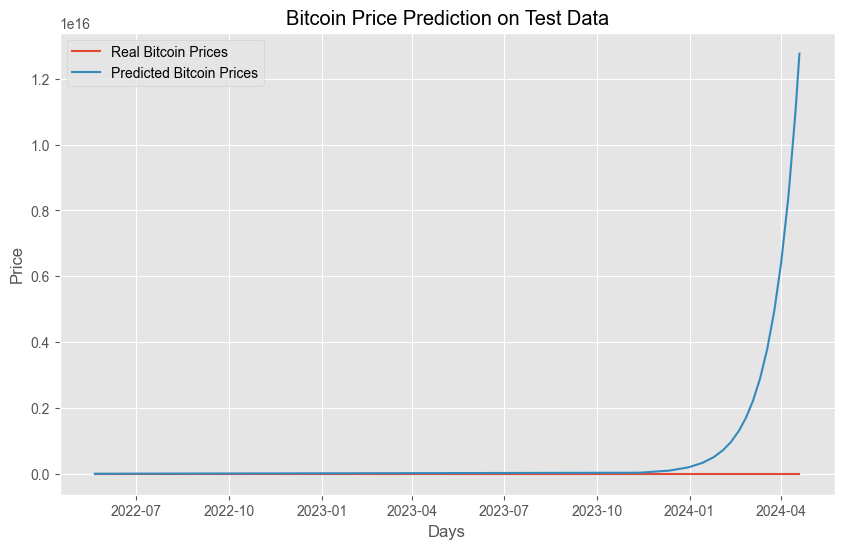

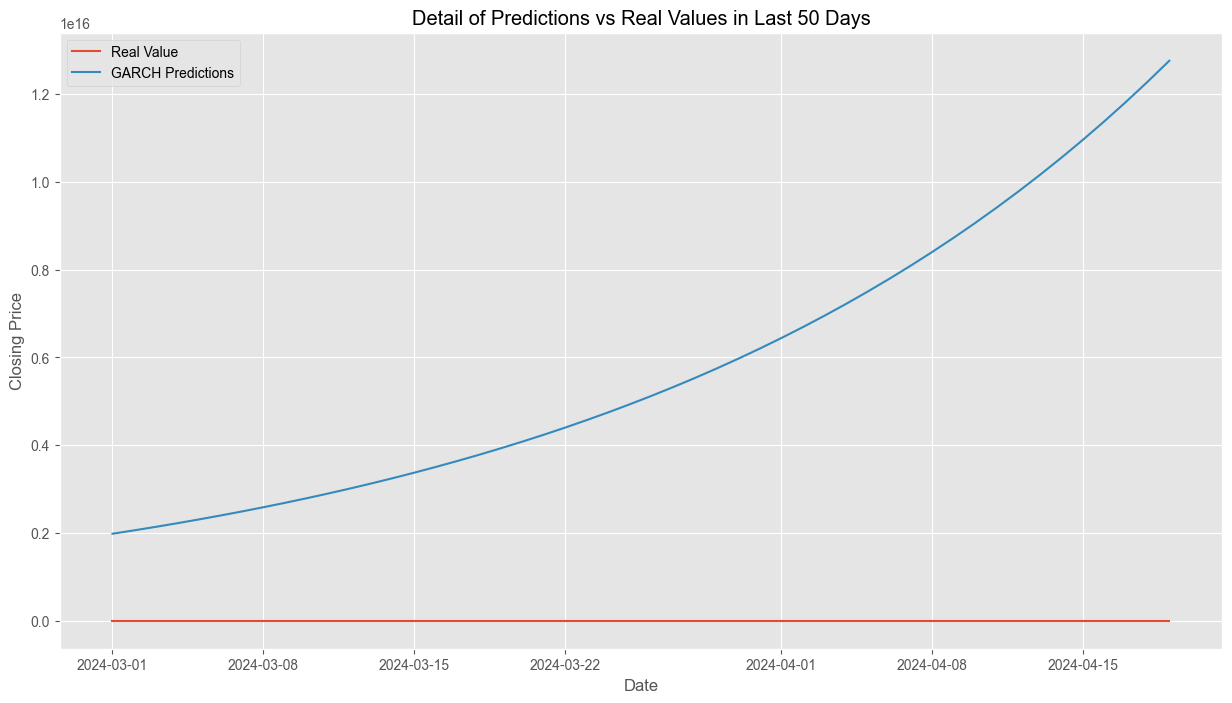

In [64]:
# Suponha que 'bitcoin_trat_df' já foi carregado e 'Close_diff' calculado corretamente
data = bitcoin_trat_df

# Cálculo dos retornos diários usando Close_diff
data['Close_diff'] = data['Close']
data.dropna(subset=['Close_diff'], inplace=True)  # Remover NaN após diferenciação
data['returns'] = data['Close_diff'].pct_change()
data.dropna(subset=['returns'], inplace=True)  # Remover NaN após cálculo dos retornos

# Assegurar que não há valores infinitos substituindo-os por NaN e removendo
data['returns'].replace([np.inf, -np.inf], np.nan, inplace=True)
data.dropna(subset=['returns'], inplace=True)

# Dividir os dados em conjunto de treino e teste
split_ratio = 0.8
split_index = int(split_ratio * len(data))
train_data = data.iloc[:split_index]
test_data = data.iloc[split_index:]

# Treinar o modelo GARCH(1,1) no conjunto de treino
garch_model = arch_model(train_data['returns'], vol='Garch', p=1, q=1)
garch_fitted = garch_model.fit(disp='off')

# Usar o modelo para fazer previsões no conjunto de teste
test_predictions = garch_fitted.forecast(horizon=len(test_data))

# Acessar as previsões de variância
predicted_variances = test_predictions.variance.dropna().values[-1]

# Previsões de volatilidade
predicted_volatility = np.sqrt(predicted_variances)

# Calcular preços previstos (simplificação usando apenas a volatilidade)
predicted_prices = np.full(len(predicted_volatility), test_data['Close_diff'].iloc[0])
for i in range(1, len(predicted_prices)):
    predicted_prices[i] = predicted_prices[i-1] * (1 + predicted_volatility[i])

# Limpeza de valores infinitos antes do cálculo das métricas
predicted_prices = np.where(np.isfinite(predicted_prices), predicted_prices, np.nan)

# Remover valores NaN que foram introduzidos
valid_indices = ~np.isnan(predicted_prices)
predicted_prices = predicted_prices[valid_indices]
real_prices = test_data['Close_diff'].values[valid_indices]

# Realizar cálculos subsequentes, apenas se houver dados válidos
if len(real_prices) > 0 and len(predicted_prices) > 0:
    residuals = real_prices - predicted_prices
    mse = mean_squared_error(real_prices, predicted_prices)
    mae = mean_absolute_error(real_prices, predicted_prices)
    rmse = np.sqrt(mse)
    jb_test = jarque_bera(residuals)
    dw_stat = durbin_watson(residuals)
    shapiro_test = shapiro(residuals)
    # Skewness and Kurtosis
    skewness = stats.skew(residuals)
    kurtosis = stats.kurtosis(residuals)

    # Imprimir as métricas
    print(f"MSE: {mse}")
    print(f"MAE: {mae}")
    print(f"RMSE: {rmse}")
    print(f"Jarque-Bera Test: {jb_test}")
    print(f"Durbin-Watson: {dw_stat}")
    print(f"Shapiro-Wilk Test: {shapiro_test}")
    print(f"Skewness: {skewness}")
    print(f"Kurtosis: {kurtosis}")
else:
    print("Não há dados suficientes para calcular métricas após limpeza.")

# Exibindo o resumo do modelo ajustado
print(garch_fitted.summary())

# Preparar para plotagem verificando o índice
if 'Date' not in data.columns:
    data = data.reset_index()

# Plotar resultados completos para teste
plt.figure(figsize=(10, 6))
plt.plot(data['Date'].iloc[-len(real_prices):], real_prices, label='Real Bitcoin Prices')
plt.plot(data['Date'].iloc[-len(predicted_prices):], predicted_prices, label='Predicted Bitcoin Prices')
plt.title('Bitcoin Price Prediction on Test Data')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()

# Detalhe dos últimos 50 dias para o conjunto de teste
plt.figure(figsize=(15, 8))
plt.plot(data['Date'].iloc[-50:], real_prices[-50:], label='Real Value')
plt.plot(data['Date'].iloc[-50:], predicted_prices[-50:], label='GARCH Predictions')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Detail of Predictions vs Real Values in Last 50 Days')
plt.legend()
plt.show()

## Modelo Estrutural (OVERFITTING)

ADF Statistic: -0.7630746608809905
p-value: 0.8297287667745714
R-squared: 0.9977226692722699
Breusch-Pagan Test: {'LM Statistic': 162.1512055089469, 'LM-Test p-value': 3.834024086728978e-37, 'F-Statistic': 169.93127963328922, 'F-Test p-value': 5.790719533214432e-38}
Jarque-Bera Test: (31855.241275205262, 0.0, -0.16898488289319324, 17.7757137428366)
Durbin-Watson: 1.993373710619731
Shapiro-Wilk Test: ShapiroResult(statistic=0.7069201469421387, pvalue=0.0)
Skewness: -0.16898488289319324
Kurtosis: 0.4111271936846719
MSE: 705401.0863893843
MAE: 396.88761328482303
RMSE: 839.8815906956078
AIC: 56920.1090812171


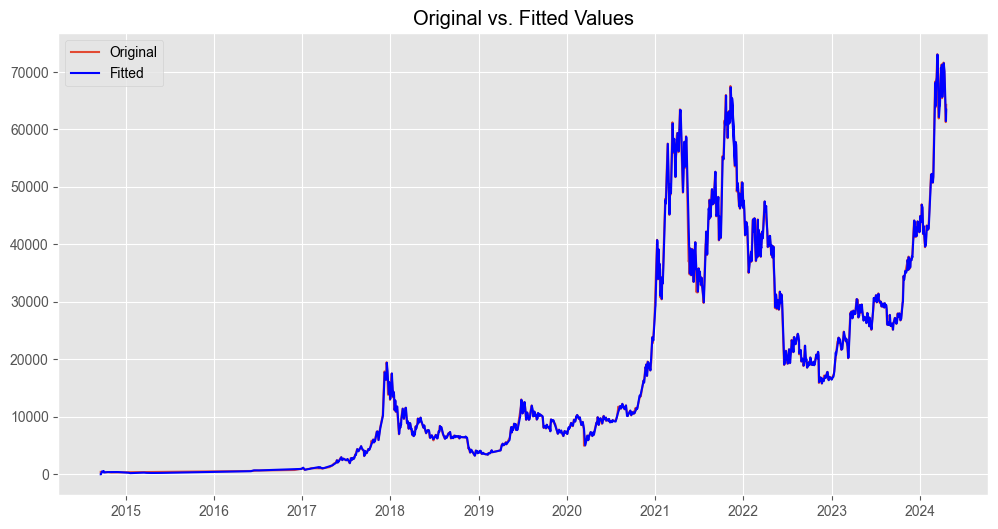

                            Unobserved Components Results                            
Dep. Variable:                         Close   No. Observations:                 3500
Model:                    local linear trend   Log Likelihood              -28456.055
                   + stochastic seasonal(12)   AIC                          56920.109
Date:                       Fri, 19 Apr 2024   BIC                          56944.736
Time:                               20:10:39   HQIC                         56928.900
Sample:                           09-20-2014                                         
                                - 04-19-2024                                         
Covariance Type:                         opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular  3.628e+04   5804.241      6.250      0

In [65]:
# Ordenar os dados pela data, para garantir a ordem temporal
bitcoin_trat_df.sort_values('Date', inplace=True)

# Definindo a série temporal de interesse
close_prices = bitcoin_trat_df['Close']

# Verificando estacionariedade
adf_result = adfuller(close_prices)
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")

# Modelo Estrutural
model_dlm = UnobservedComponents(
    close_prices,
    level='local linear trend',
    seasonal=12,
    freq='D'
)

results = model_dlm.fit()
residuals = results.resid

# Adicionar uma constante aos resíduos
exog = add_constant(np.arange(len(residuals)))  # Usando um range como variável explicativa simplificada

bp_test = het_breuschpagan(residuals, exog)
jb_test = jarque_bera(residuals)
dw_test = durbin_watson(residuals)
shapiro_test = shapiro(residuals)
skewness = stats.skew(residuals)
kurtosis = stats.kurtosis(residuals)
y_true = close_prices[~residuals.isna()]
y_pred = results.fittedvalues[~residuals.isna()]
mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mse)
aic = results.aic

ss_res = np.sum(residuals**2)
ss_tot = np.sum((y_true - np.mean(y_true))**2)
r_squared = 1 - (ss_res / ss_tot)

print(f"R-squared: {r_squared}")
print(f"Breusch-Pagan Test: {dict(zip(['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value'], bp_test))}")
print(f"Jarque-Bera Test: {jb_test}")
print(f"Durbin-Watson: {dw_test}")
print(f"Shapiro-Wilk Test: {shapiro_test}")
print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis_val}")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"AIC: {aic}")

# Plotando os resultados
plt.figure(figsize=(12, 6))
plt.plot(close_prices, label='Original')
plt.plot(results.fittedvalues, label='Fitted', color='blue')
plt.legend()
plt.title('Original vs. Fitted Values')
plt.show()

# Sumário dos resultados
print(results.summary())

## LSTM

Epoch 1/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0174 - val_loss: 7.2817e-04
Epoch 2/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.6645e-04 - val_loss: 8.8708e-04
Epoch 3/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.6498e-04 - val_loss: 0.0011
Epoch 4/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.0029e-04 - val_loss: 6.7810e-04
Epoch 5/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.4866e-04 - val_loss: 0.0011
Epoch 6/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.2717e-04 - val_loss: 6.8300e-04
Epoch 7/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.5757e-04 - val_loss: 6.8496e-04
Epoch 8/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.0143e-04 - val_loss: 6.1697e-04
Epoch 9/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.9344e-04 - val_loss: 0.0013
Epoch 10/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.5150e-04 - val_loss: 5.0625e-04
Epoch 11/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.2384e-04 - val_loss: 5.4315e-04
Ep

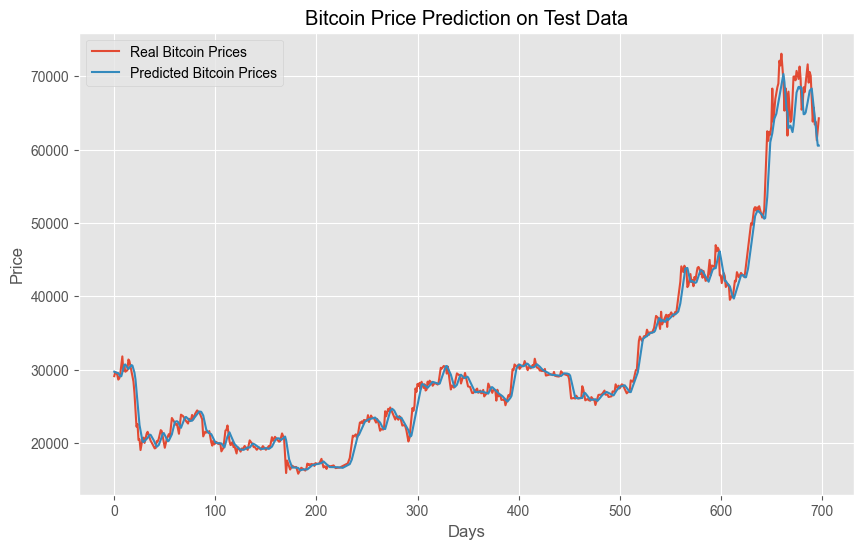

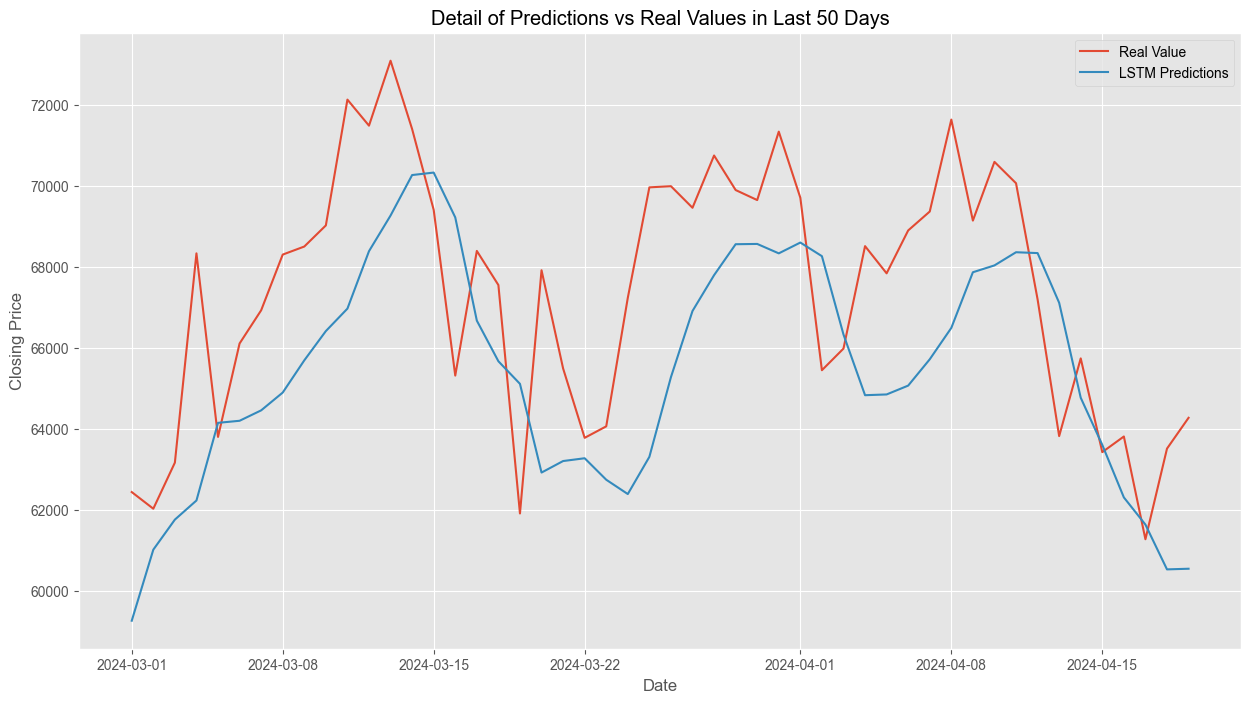

In [72]:
data = bitcoin_trat_df
look_back=30

# Normalização dos dados
scaler = MinMaxScaler(feature_range=(0, 1))
close_prices = data['Close'].values.reshape(-1, 1)
close_prices_normalized = scaler.fit_transform(close_prices)

# Criação do dataset para LSTM
def create_dataset(dataset, look_back=10):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

X, y = create_dataset(close_prices_normalized, look_back=10)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Definição do ponto de corte para treino e teste
split_percent = 0.80
split = int(split_percent * len(X))

X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Construção e compilação do modelo LSTM
model = Sequential([
    LSTM(60, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(50),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')

# Treinamento do modelo
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Previsões
predicted = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

# Cálculo das métricas
residuals = real_prices - predicted_prices
mse = mean_squared_error(real_prices, predicted_prices)
mae = mean_absolute_error(real_prices, predicted_prices)
rmse = np.sqrt(mse)
jb_test = jarque_bera(residuals.flatten())
dw_stat = durbin_watson(residuals.flatten())
shapiro_test = shapiro(residuals.flatten())
skewness = stats.skew(residuals)
kurtosis = stats.kurtosis(residuals)

# Imprimir as métricas
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"Jarque-Bera Test: {jb_test}")
print(f"Durbin-Watson: {dw_stat}")
print(f"Shapiro-Wilk Test: {shapiro_test}")
print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")

# Plotar resultados completos para teste
plt.figure(figsize=(10, 6))
plt.plot(real_prices, label='Real Bitcoin Prices')
plt.plot(predicted_prices, label='Predicted Bitcoin Prices')
plt.title('Bitcoin Price Prediction on Test Data')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()

data = data.reset_index()
# Detalhe dos últimos 50 dias para o conjunto de teste
days = data['Date'].values[-len(predicted_prices):]
plt.figure(figsize=(15, 8))
plt.plot(days[-50:], real_prices[-50:], label='Real Value')
plt.plot(days[-50:], predicted_prices[-50:], label='LSTM Predictions')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Detail of Predictions vs Real Values in Last 50 Days')
plt.legend()
plt.show()

## Resultado comparativo dos modelos

MSE-Mean Squared Error (Erro Quadrático Médio - EQM)
- Calcula a média dos quadrados dos erros, ou seja, a média das diferenças ao quadrado entre os valores previstos e os reais.
- Quanto maior o MSE, pior o modelo em termos de precisão de previsão.
- É sensível a outliers, pois os erros são elevados ao quadrado
  
MAE-Mean Absolute Error (Erro Absoluto Médio)
- Calcula a média das diferenças absolutas entre as previsões e os valores reais.
- Menos sensível a outliers em comparação com o MSE, pois não eleva os erros ao quadrado
  
RMSE-Root Mean Squared Error (Raiz do Erro Quadrático Médio)
- Penaliza mais erros grandes, mas está na mesma escala que a variável de resposta, tornando-se mais interpretável.
- É útil quando grandes erros são particularmente indesejáveis

| Metric/Model                        | Regressão Simples | Regressão Múltipla | Sklearn MultiLinear | Exp Smoothing Simple | Exp Smoothing Trend | ARIMA (1,1,0) | ARIMA (2,1,0) | ARIMA (3,1,0) | ARIMA (5,1,0) | SARIMA (Sem Refit) | SARIMA (Com Refit) | XGBoost       | Prophet         |
|-------------------------------------|-------------------|--------------------|---------------------|----------------------|---------------------|---------------|---------------|---------------|---------------|--------------------|--------------------|----------------|-----------------|
| R-squared                           | 0.000             | 0.364              | 0.3346              | -                    | -                   | -             | -             | -             | -             | -                  | -                  | 0.8681         | 0.9005          |
| Teste de Breusch-Pagan              | -                 | (488.66, <0.001)   | -                   | -                    | -                   | (0.92, 0.336) | (0.31, 0.573) | (0.64, 0.421) | (0.13, 0.714) | (10.68, <0.001)    | (10.68, <0.001)    | (80.68, <0.001) | (922.19, <0.001) |
| MSE (Mean Squared Error)            | -                 | 447789.09          | -                   | 970481.54            | 960754.67           | 2285065.57    | 1961931.09    | 1803275.09    | 1712470.34    | 1662679.20         | 1659616.23         | 39525916.03    | 30965251.12      |
| MAE(Mean Absolute Error)            | -                 | 417.20             | 433.39           | 582.08               | 576.97              | 1019.51       | 949.73        | 917.30        | 882.59        | 830.29             | 829.99             | 3273.99        | 3959.51          |
| RMSE (Root Mean Squared Error)                               | -                 | 669.17             | 719.96            | 985.13               | 980.18              | 1511.64       | 1400.69       | 1342.86       | 1308.61       | 1289.45            | 1288.26            | 6286.96        | 5564.64          |
| Durbin-Watson                       | 2.101             | 1.994              | 1.5813              | -                    | -                   | 2.3358        | 2.1504        | 2.0913        | 2.0239        | 2.4469             | 2.4469             | 2.0461         | 0.0225           |
| Shapiro-Wilk Test (residuals)       | (0.9456, <0.001)  | (0.8288, <0.001)   | (0.8304, 0.0)       | (0.8386, <0.001)     | (0.8385, <0.001)    | (0.9368, <0.001) | (0.9416, <0.001) | (0.9468, <0.001) | (0.9377, <0.001) | (0.8768, <0.001)   | (0.8768, <0.001)   | (0.7443, <0.001) | (0.9456, <0.001)  |
| Ljung-Box (L1) (Q)                  | -                 | -                  | -                   | -                    | -                   | 130.17        | 33.77         | 9.11          | 1.12          | 32.34              | 11.43             | -               | -                |
| Skew                                | -0.132            | -0.562             | -0.4365             | 0.2037               | 0.1706              | 0.31          | 0.20          | 0.10          | -0.07         | 0.40               | 0.39               | 1.0031          | -0.8437          |
| Kurtosis                            | 15.928            | 15.333             | 11.7013             | 8.8726               | 8.9037              | 15.42         | 14.54         | 15.40         | 16.69         | 12.84              | 12.60             | 15.3332         | 2.1454           |
| AIC                                 | 5.151e+04         | 4.021e+04          | -                   | -                    | -                   | 58506.767     | 58012.545     | 57749.683     | 57545.085     | 52909.453          | 52901.612          | 9374.1257      | 9165.6720                |
| BIC                                 | 5.152e+04         | 4.045e+04          | -                   | -                    | -                   | 58519.088     | 58031.027     | 57774.326     | 57582.048     | 52939.665          | 52931.824          | -               | -                |
| Jarque-Bera (JB)                    | 21861.03          | 16039.215          | 18002.12            | -             | -                   | 22555.43      | 19458.83      | 22442.43      | 27324.48     | 12643.70           | 12029.96           | 8509.06        | 1087.38          |


R-squared: Usualmente para séries temporais, o R² não é a métrica mais informativa, mas pode ser calculado para comparação.<br>
Teste de Breusch-Pagan: Para verificar a homoscedasticidade dos resíduos.<br>
Teste de Jarque-Bera: Para testar a normalidade dos resíduos.<br>
Durbin-Watson: Para testar a autocorrelação dos resíduos.<br>
Teste de Shapiro-Wilk: Outro teste para a normalidade dos resíduos.<br>
Skewness e Kurtosis: Medir a assimetria e curtose dos resíduos.<br>
MSE, MAE, RMSE: Métricas de erro.<br>
AIC: Critério de informação de Akaike para avaliar a qualidade do modelo.<br>